In [14]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Basic weak-form test results

1341 out of 3273 stock time series are weak-form efficient according to the autocorrelation test.
Average p-value: 0.2223609559999812


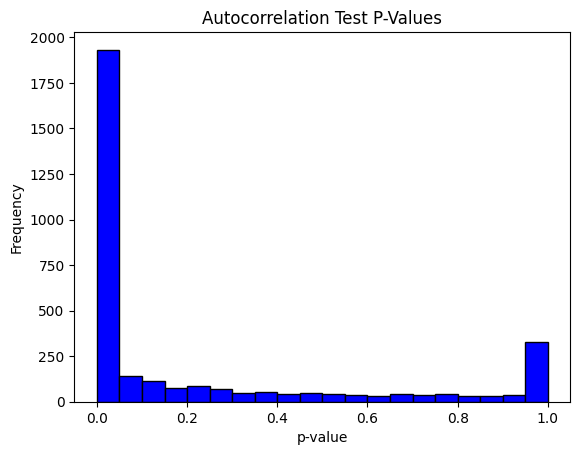

2172 out of 3273 stock time series are weak form efficient according to the runs test.
Average p-value: 0.30068219215202036


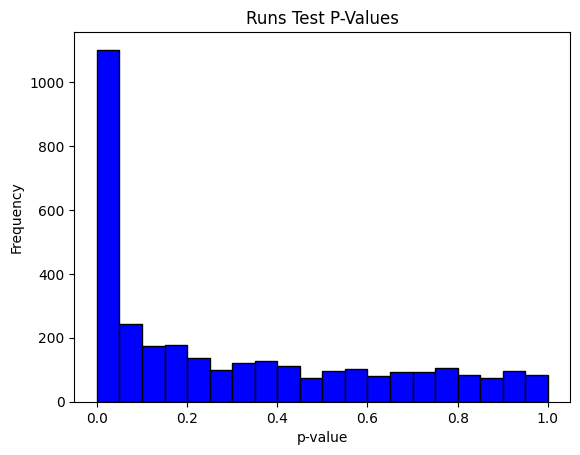

2555 out of 3273 stock time series are weak-form efficient according to the unit root test.
Average p-value: 0.38711481467364484


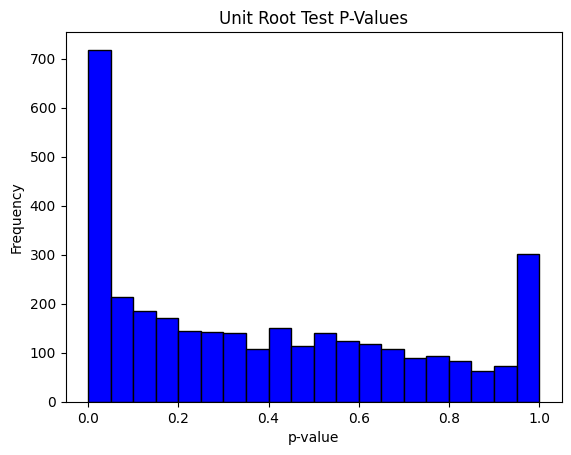

451 out of 3273 stock time series are weak-form efficient according to the variance ratio test.
Average p-value: 0.03248484181484809


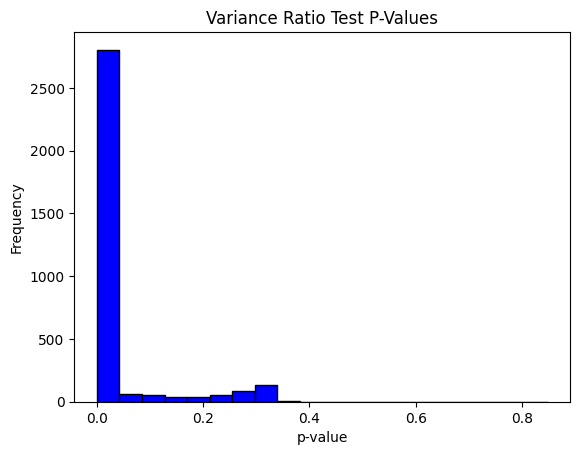

In [26]:
df_autocorr_test = pd.read_csv('data/results/autocorr_test.csv', sep='|')
print(f'{len(df_autocorr_test) - sum(df_autocorr_test["autocorrelation"])} out of {len(df_autocorr_test)} stock time series are weak-form efficient according to the autocorrelation test.')
print(f'Average p-value: {df_autocorr_test["p-value"].mean()}')
plt.hist(df_autocorr_test['p-value'], bins=20, color='blue', edgecolor='black')
plt.title('Autocorrelation Test P-Values')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.show()
df_runs_test = pd.read_csv('data/results/runs_test.csv', sep='|')
print(f'{sum(df_runs_test["random"])} out of {len(df_runs_test)} stock time series are weak form efficient according to the runs test.')
print(f'Average p-value: {df_runs_test["p_value"].mean()}')
plt.hist(df_runs_test['p_value'], bins=20, color='blue', edgecolor='black')
plt.title('Runs Test P-Values')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.show()
df_unit_root_test = pd.read_csv('data/results/unit_root_test.csv')
print(f'{len(df_unit_root_test.query('price_unit_root == True'))} out of {len(df_unit_root_test)} stock time series are weak-form efficient according to the unit root test.')
print(f'Average p-value: {df_unit_root_test["p_val_price"].mean()}')
plt.hist(df_unit_root_test['p_val_price'], bins=20, color='blue', edgecolor='black')
plt.title('Unit Root Test P-Values')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.show()
df_var_ratio_test = pd.read_csv('data/results/var_ratio_test.csv')
print(f'{df_var_ratio_test['data_from_random_walk'].sum()} out of {len(df_var_ratio_test)} stock time series are weak-form efficient according to the variance ratio test.')
print(f'Average p-value: {df_var_ratio_test["p_val"].mean()}')
plt.hist(df_var_ratio_test['p_val'], bins=20, color='blue', edgecolor='black')
plt.title('Variance Ratio Test P-Values')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.show()

### Predictions results

In [30]:
def calculate_sign_change_accuracy(actual, predicted):
    """
    Returns the % of correctly predicted sign changes in consecutive Time Series Values
    """
    #check to ensure lists are large enough and of equal length
    if len(actual) != len(predicted) or len(actual) < 2:
        raise ValueError("Both lists must have the same length and at least two elements.")

    # Calculate the differences between consecutive elements
    actual_diffs = [j - i for i, j in zip(actual[:-1], actual[1:])]
    predicted_diffs = [j - i for i, j in zip(predicted[:-1], predicted[1:])]

    #compute % of correctly predicted sign change
    match_sign_count = 0
    for pred_diff, actual_diff in zip(predicted_diffs,actual_diffs):
        if (pred_diff<0 and actual_diff<0) or (pred_diff>0 and actual_diff>0):
            match_sign_count+=1

    match_sign_ratio = match_sign_count/len(predicted_diffs)
    return match_sign_ratio*100
sign_accuracies = []
sign_accuracies_only_significant = []
r2s = []
r2s_only_significant = []
corrs = []
corrs_only_significant = []
absolute_errors = []
absolute_errors_only_significant = []
sign_accuracies_only_insignificant = []
abs_errors_only_insignificant = []
df_sample = pd.read_csv('data/results/sample_100_n.csv', sep='|')
for file in os.listdir('data/predictions/'):
    if file.endswith('.csv') and file.split('_')[1]+'.'+file.split('.')[1] in set(df_sample['file']):
        df = pd.read_csv(f'data/predictions/{file}', sep='|')
        filename = file.split('_')[1] + '.csv'
        df_temp = df_sample.query('file == @filename')
        accuracy = calculate_sign_change_accuracy(df["actual"], df["pred"])
        sign_accuracies.append(accuracy)
        # calculate r^2 of predicted vs actual
        r2 = np.corrcoef(df["actual"], df["pred"])[0, 1]**2
        r2s.append(r2)
        corr = np.corrcoef(df["actual"], df["pred"])[0, 1]
        corrs.append(corr)
        absolute_errors.append(np.mean([abs(i-j) for i,j in zip(df["actual"], df["pred"])]))
        if df_temp.iloc[0,4]:
            sign_accuracies_only_significant.append(accuracy)
            r2s_only_significant.append(r2)
            corrs_only_significant.append(corr)
            absolute_errors_only_significant.append(np.mean([abs(i-j) for i,j in zip(df["actual"], df["pred"])]))
        else:
            sign_accuracies_only_insignificant.append(accuracy)
            abs_errors_only_insignificant.append(np.mean([abs(i-j) for i,j in zip(df["actual"], df["pred"])]))
            
print(f'Number of Predictions: {len(sign_accuracies)}')
print(f'of which {len(sign_accuracies_only_significant)} are from significant models')

print(f'Average Sign Change Accuracy: {np.mean(sign_accuracies):.2f}%')
print(f'Average R^2: {np.mean(r2s):.2f}')
print(f'Average Correlation: {np.mean(corrs):.2f}')
print(f'Average Absolute Error: {np.mean(absolute_errors):.2f}')
print(f'Average Sign Change Accuracy (Only Significant): {np.mean(sign_accuracies_only_significant):.2f}%')
print(f'Average R^2 (Only Significant): {np.mean(r2s_only_significant):.2f}')
print(f'Average Correlation (Only Significant): {np.mean(corrs_only_significant):.2f}')
print(f'Average Absolute Error (Only Significant): {np.mean(absolute_errors_only_significant):.2f}')
print(f'Average Sign Change Accuracy (Only Insignificant): {np.mean(sign_accuracies_only_insignificant):.2f}%')
print(f'Average Absolute Error (Only Insignificant): {np.mean(abs_errors_only_insignificant):.2f}')

Number of Predictions: 99
of which 62 are from significant models
Average Sign Change Accuracy: 46.22%
Average R^2: 0.63
Average Correlation: 0.78
Average Absolute Error: 0.34
Average Sign Change Accuracy (Only Significant): 46.22%
Average R^2 (Only Significant): 0.61
Average Correlation (Only Significant): 0.77
Average Absolute Error (Only Significant): 0.32
Average Sign Change Accuracy (Only Insignificant): 46.23%
Average Absolute Error (Only Insignificant): 0.37


Best config for ONEW.csv: (0, 0, 4)


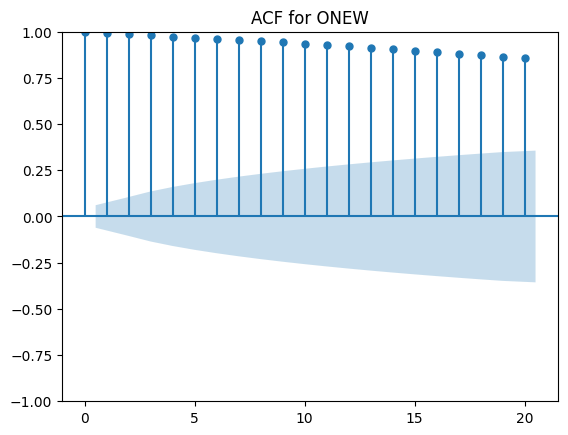

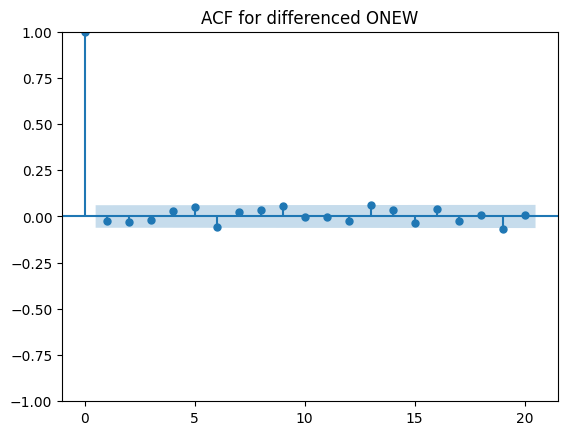

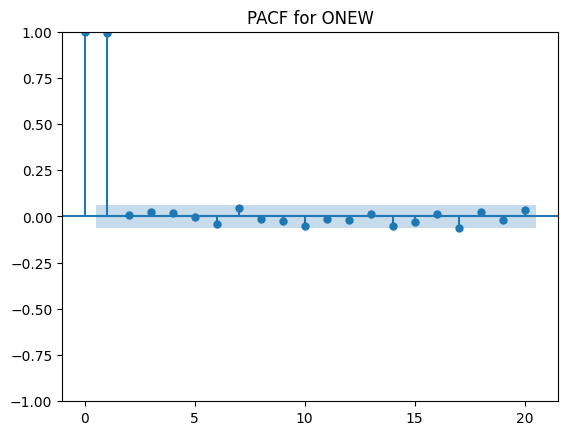

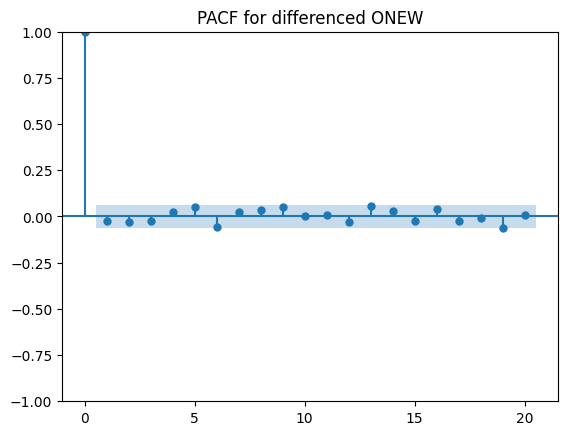

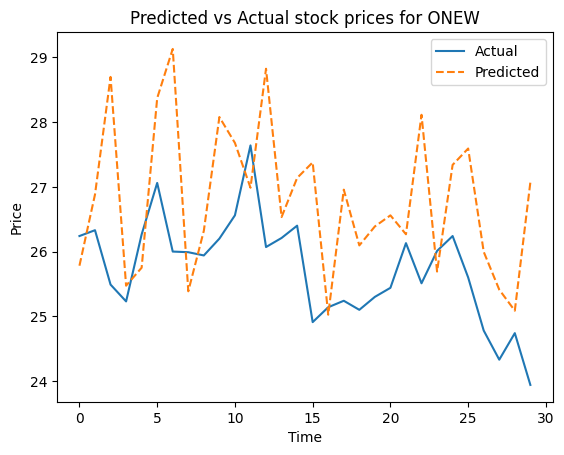

Best config for BROG.csv: (4, 2, 4)


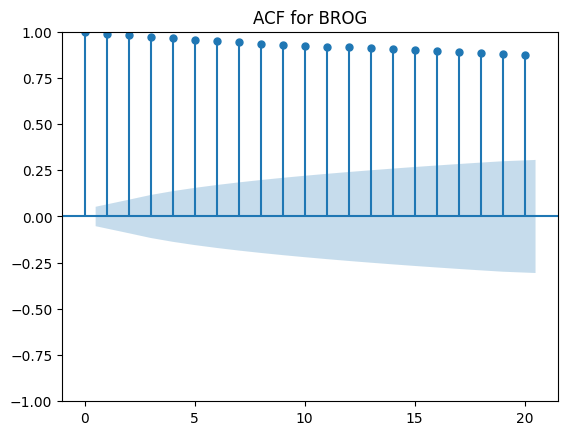

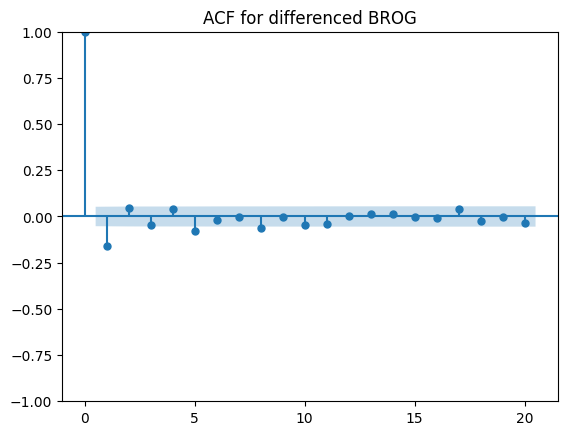

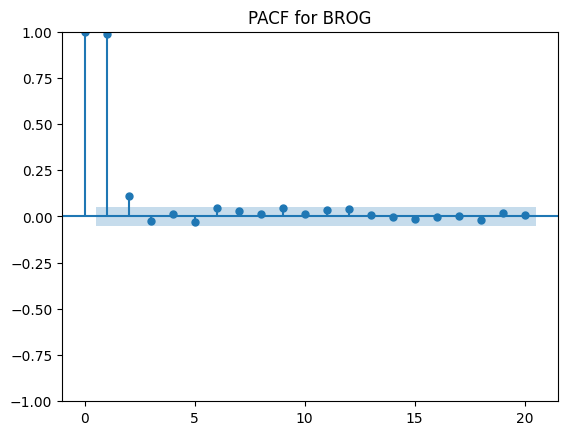

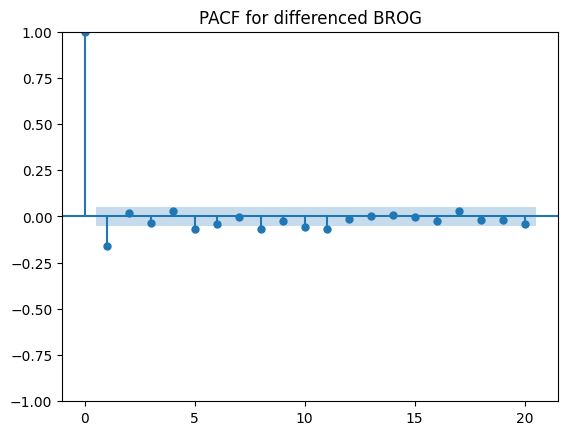

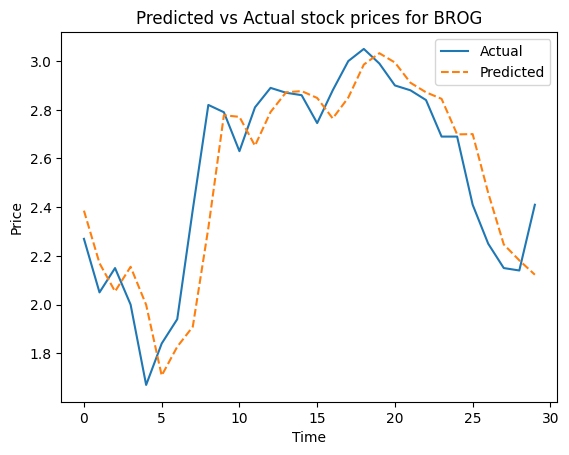

Best config for EVER.csv: (3, 1, 2)


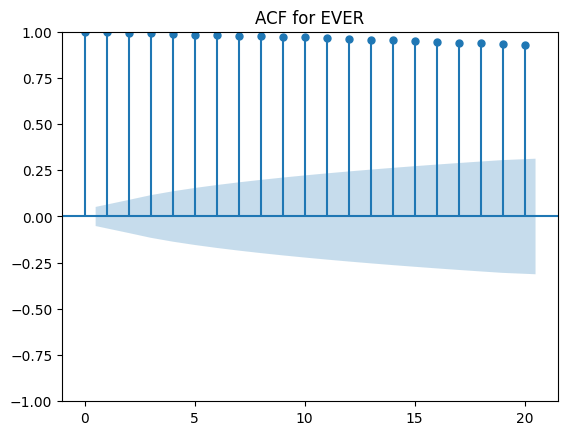

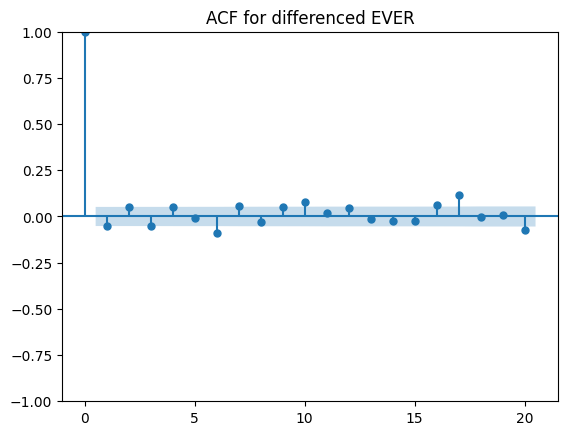

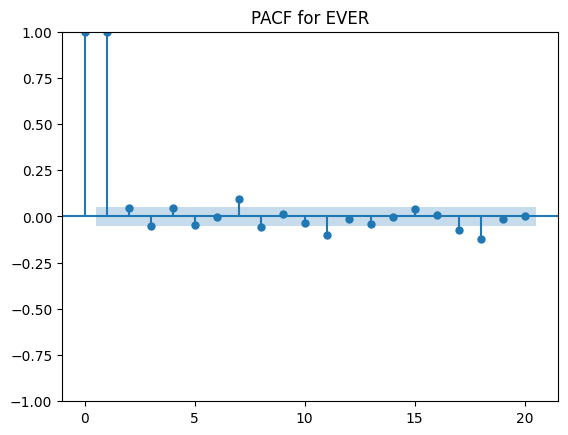

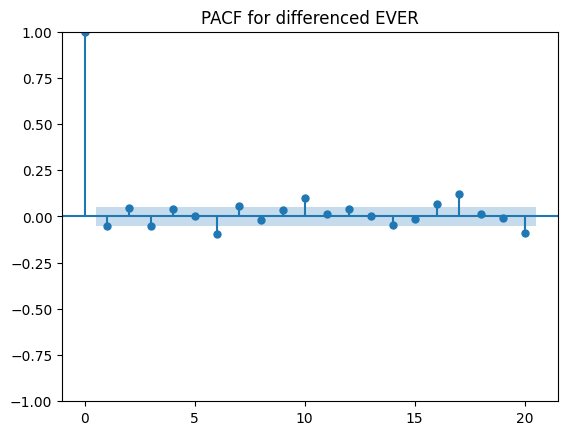

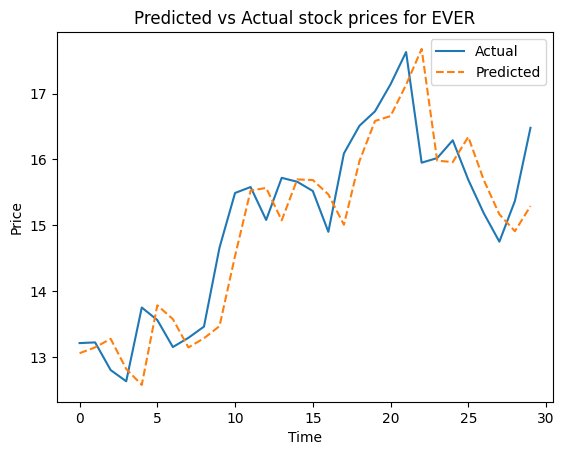

Best config for NFE.csv: (2, 0, 4)


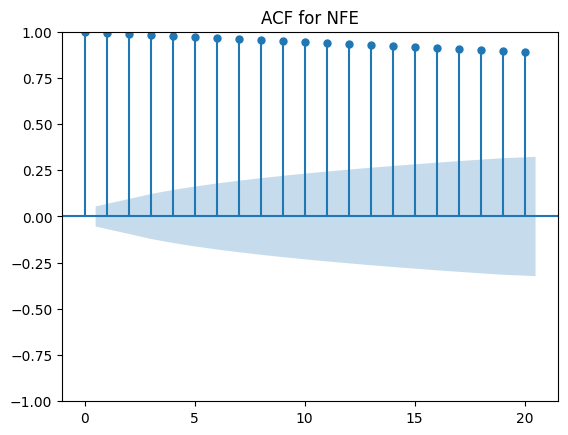

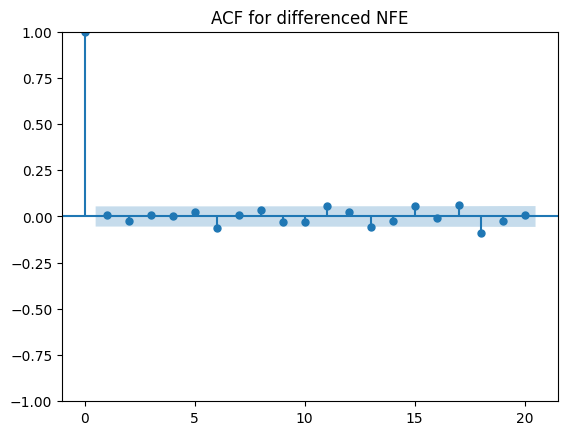

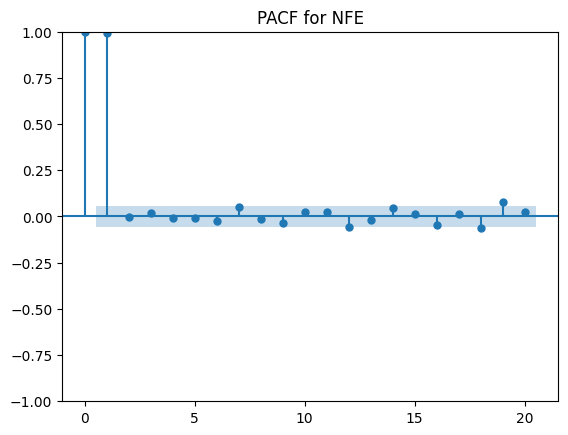

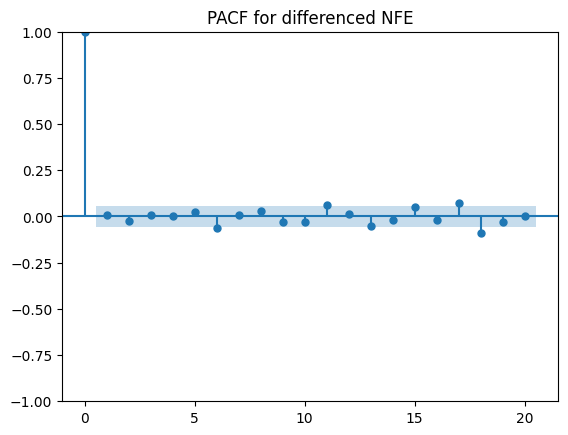

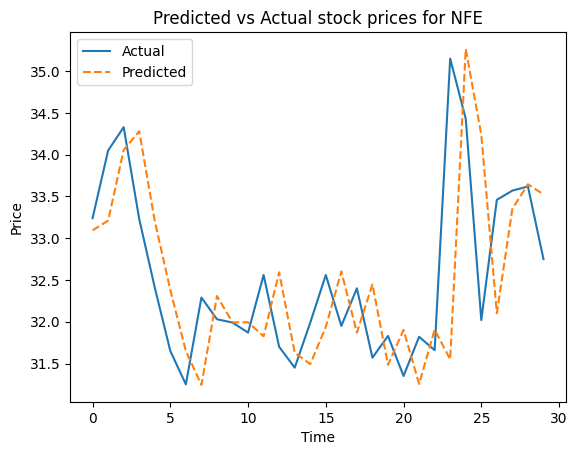

Best config for RRBI.csv: (1, 0, 3)


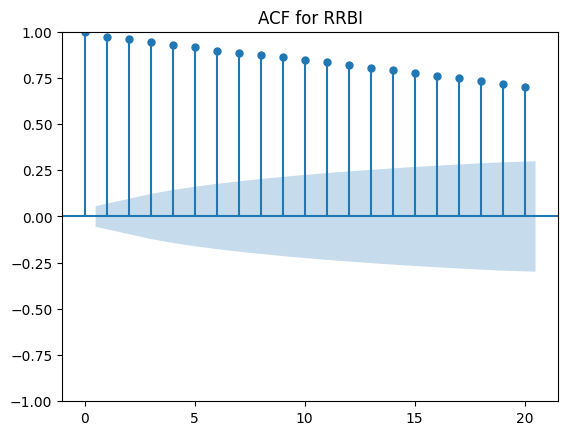

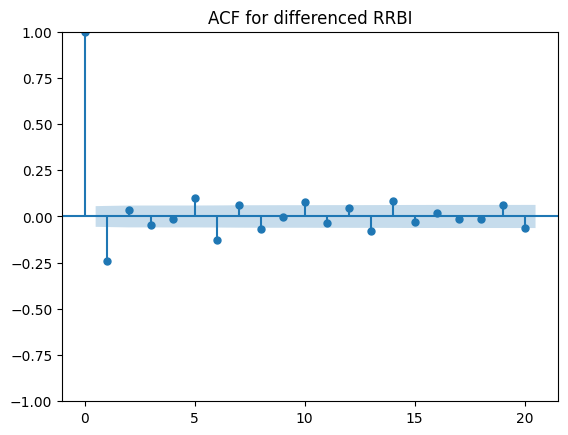

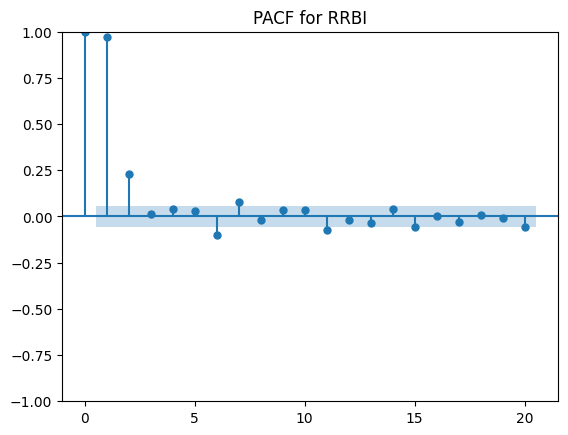

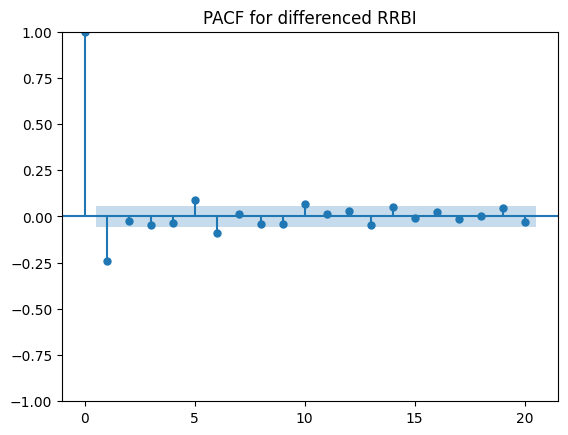

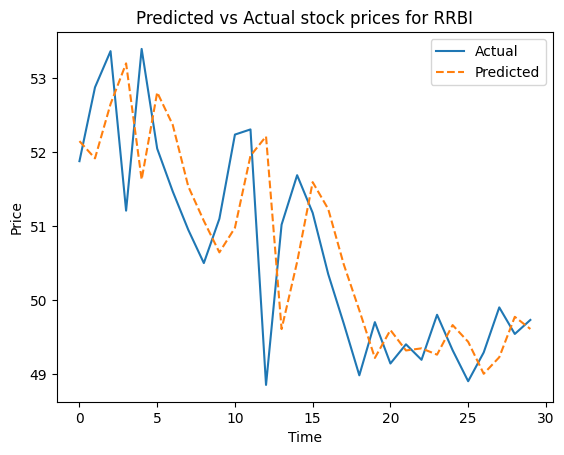

Best config for HFFG.csv: (3, 2, 2)


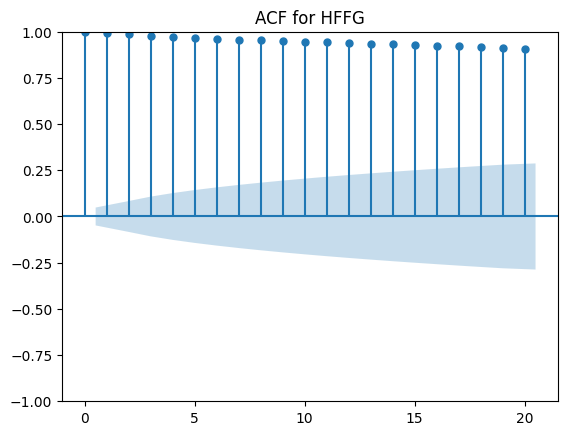

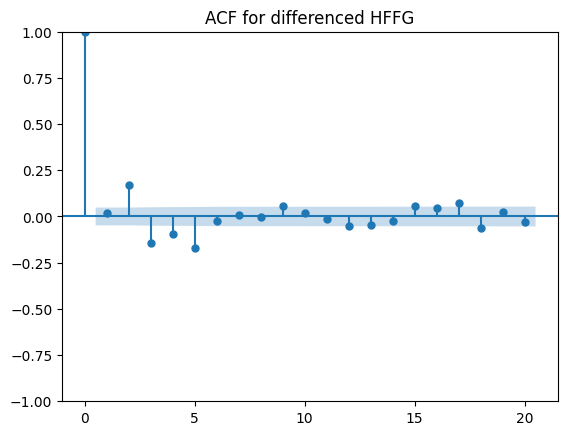

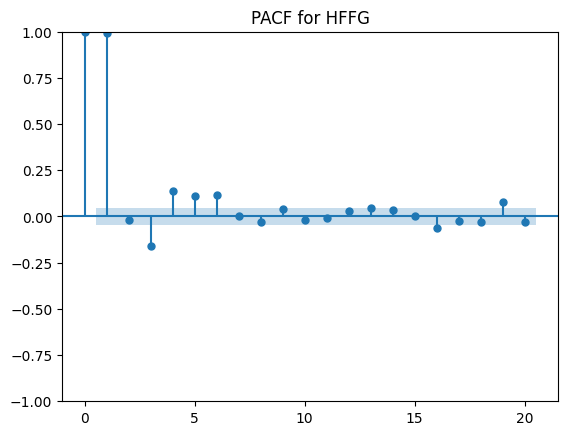

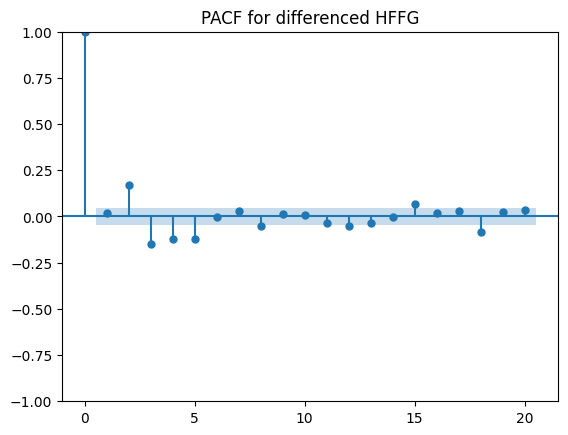

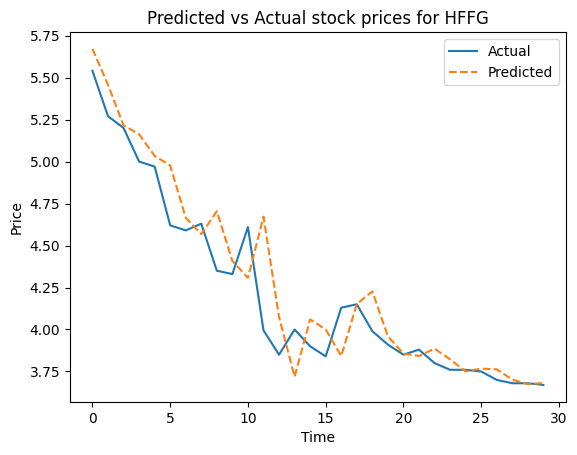

Best config for LEGH.csv: (0, 2, 3)


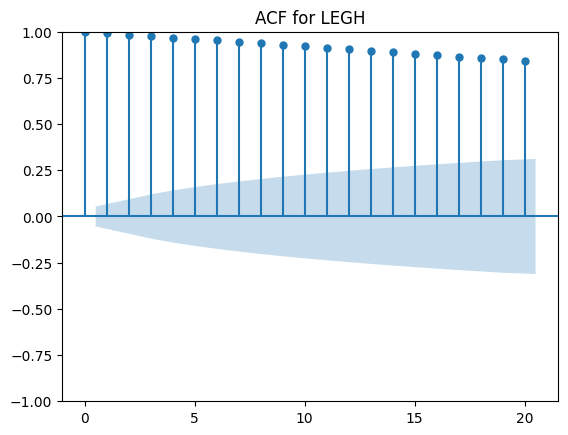

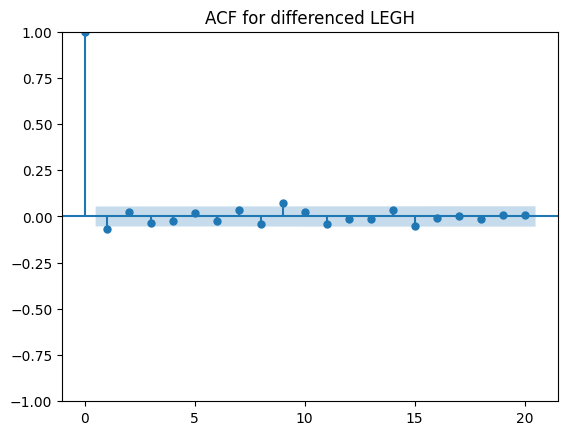

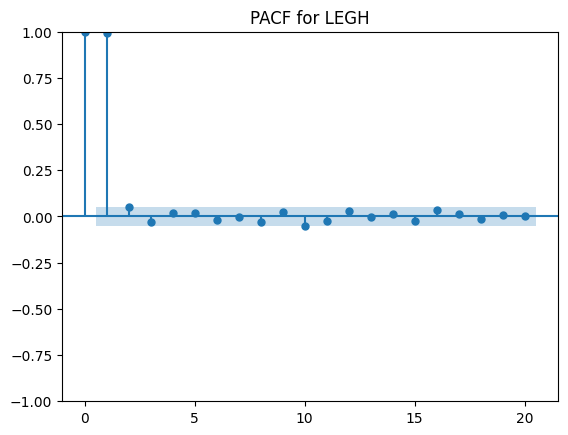

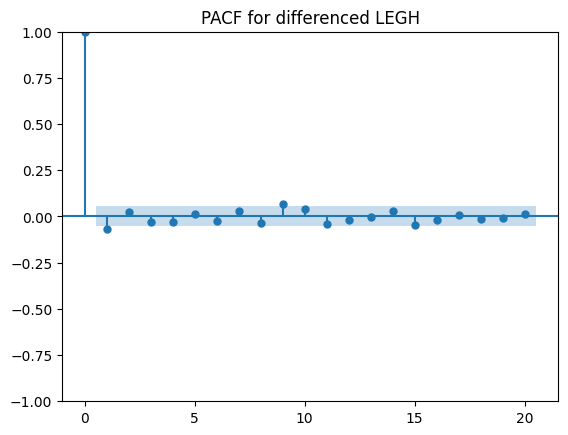

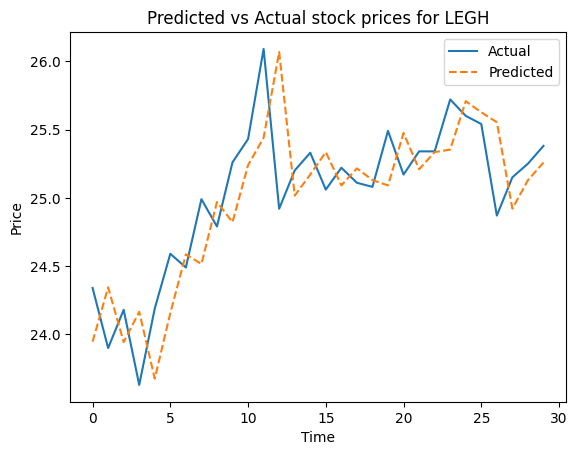

Best config for XCUR.csv: (3, 1, 2)


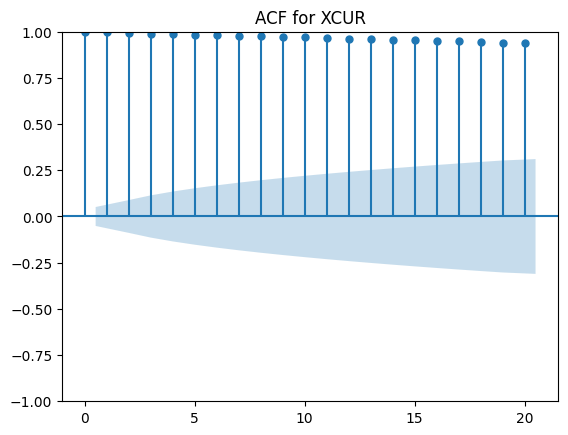

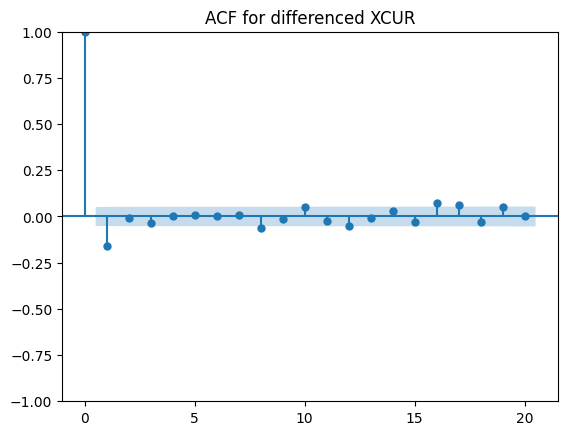

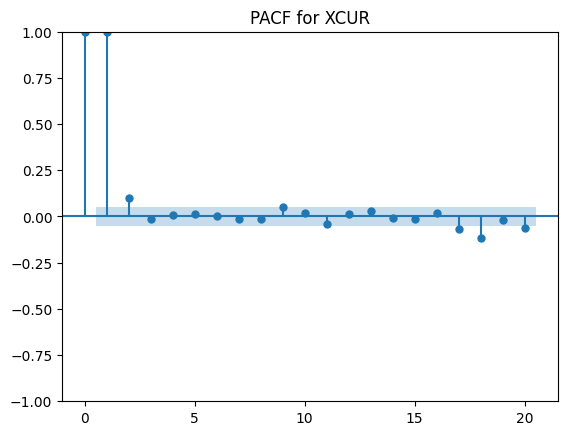

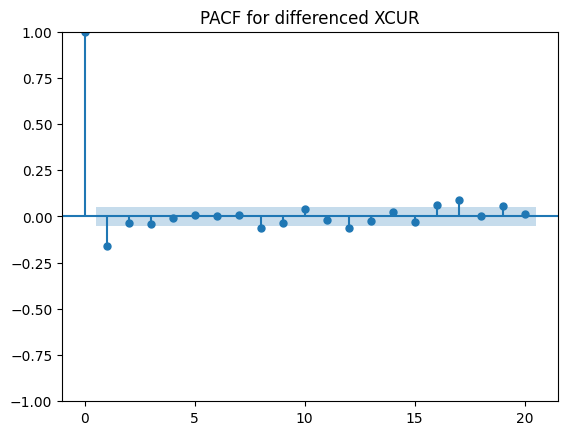

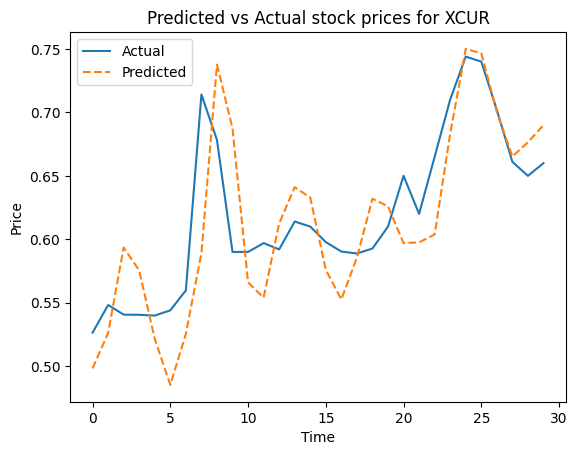

Best config for FBRX.csv: (4, 2, 0)


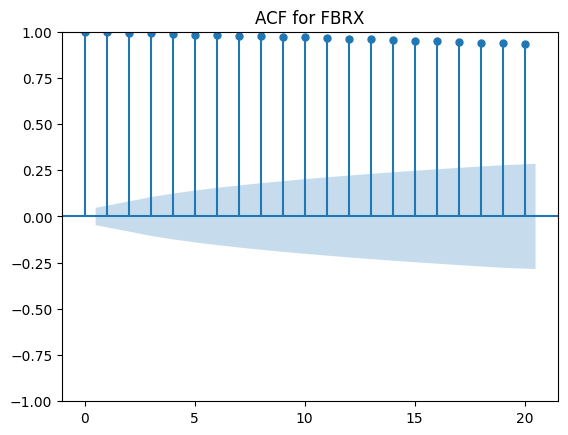

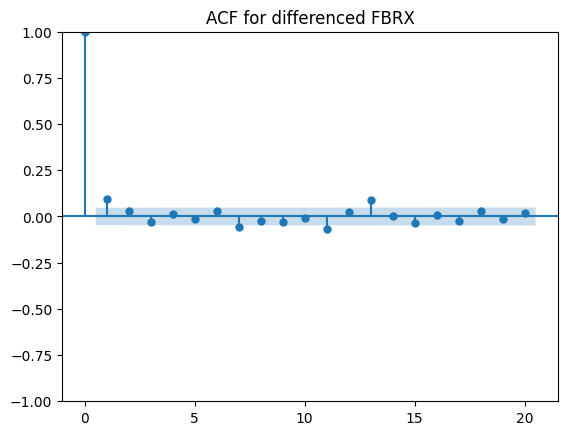

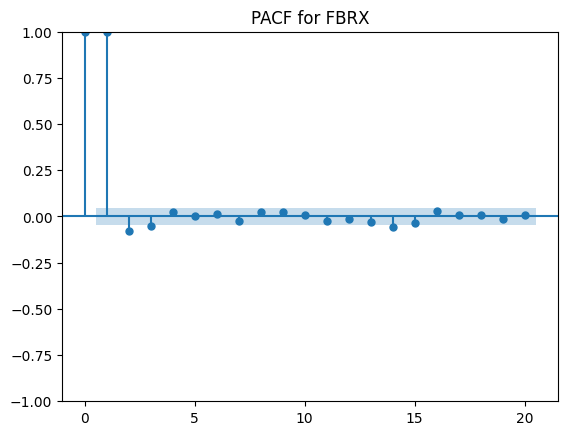

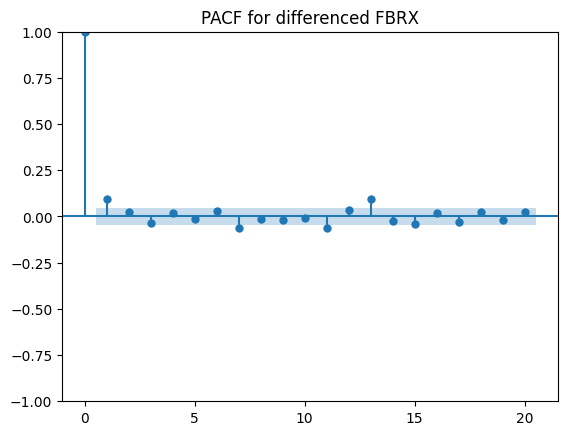

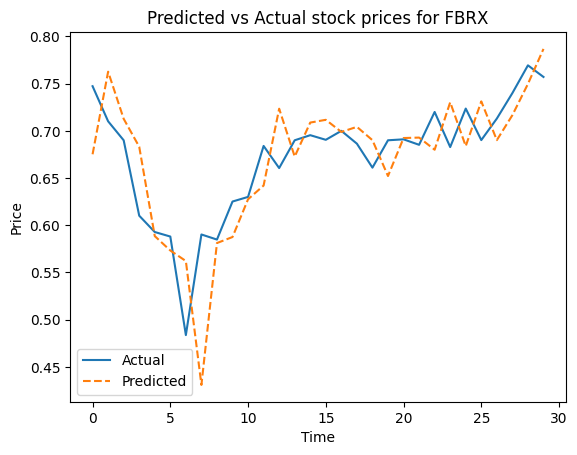

Best config for TRVI.csv: (3, 0, 4)


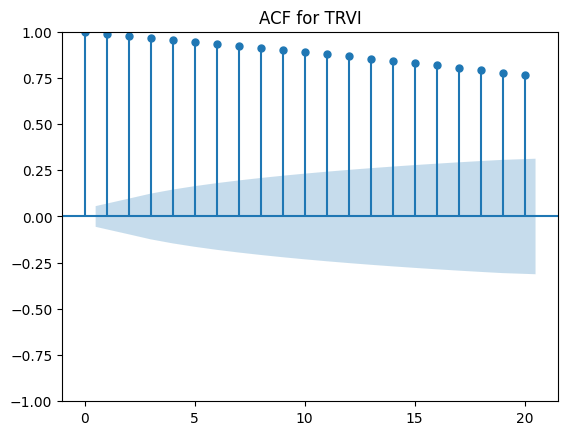

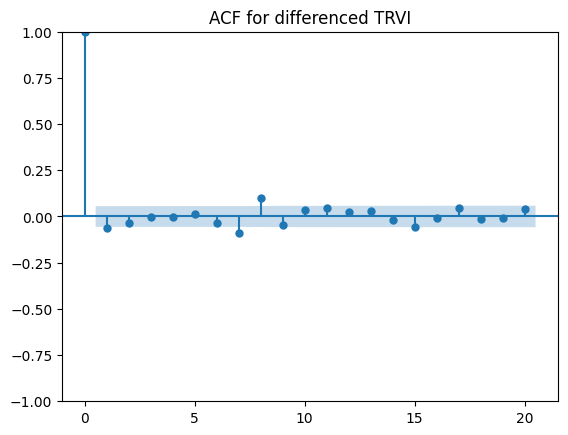

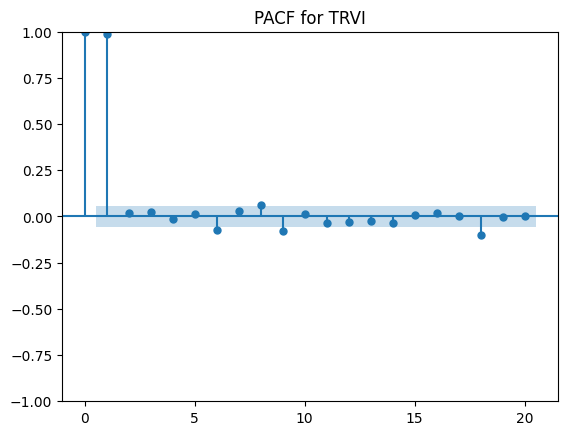

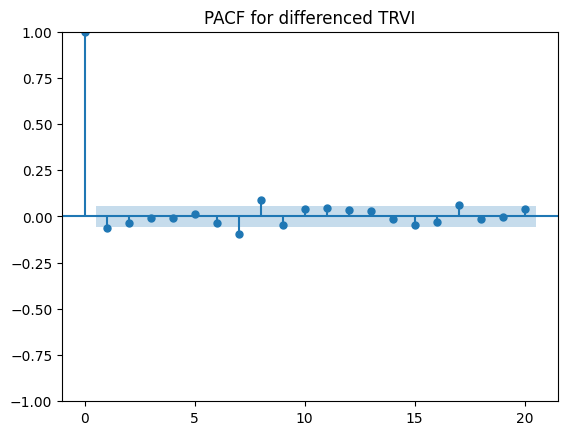

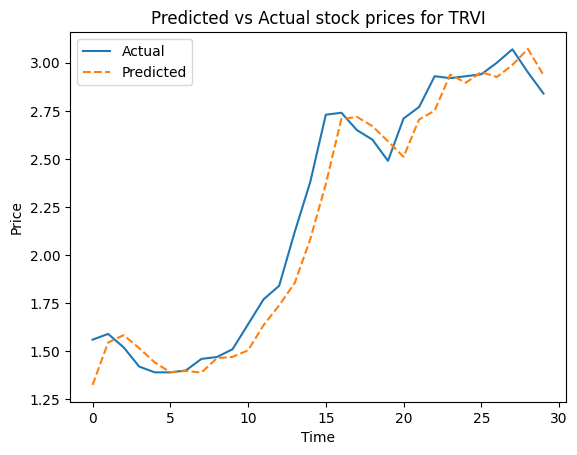

Best config for GRIN.csv: (4, 0, 3)


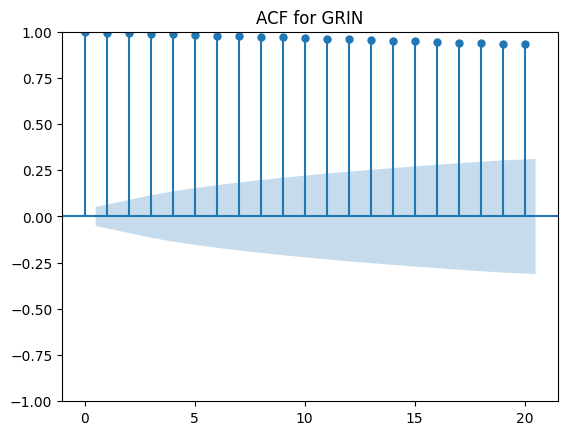

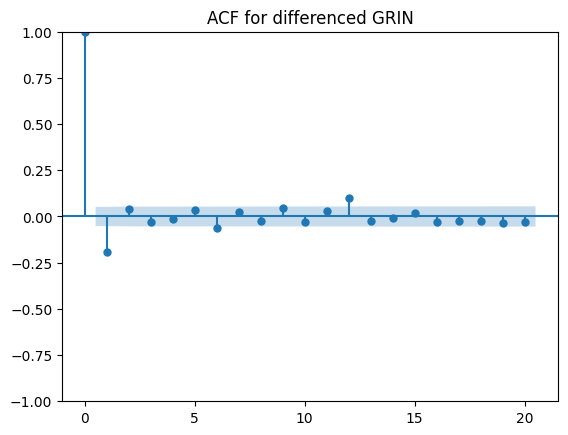

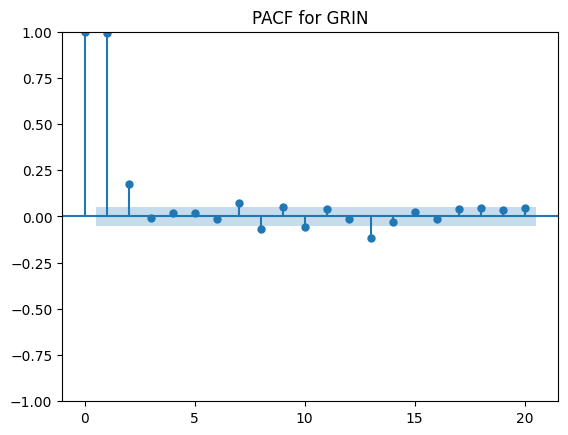

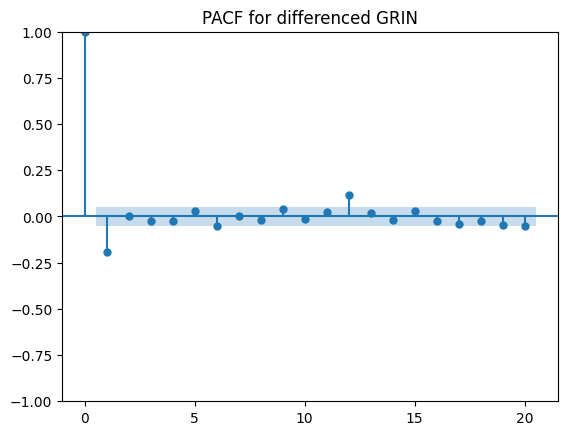

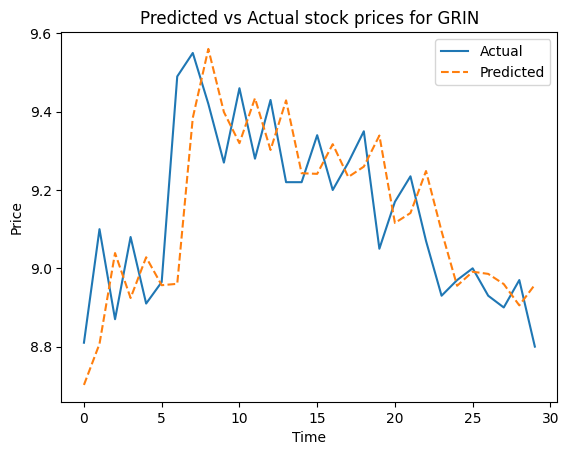

Best config for RELI.csv: (0, 2, 4)


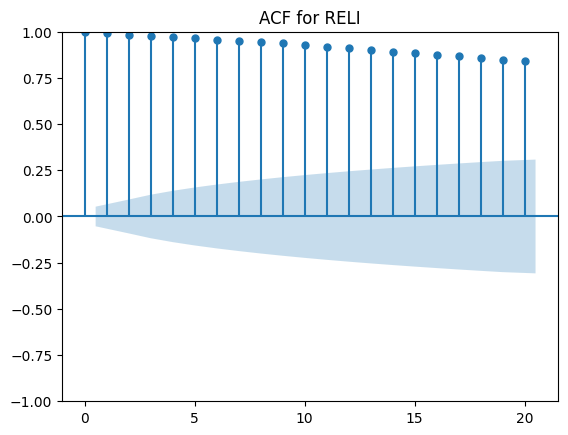

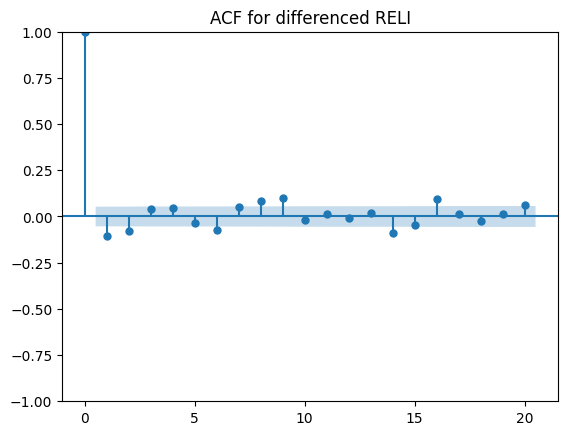

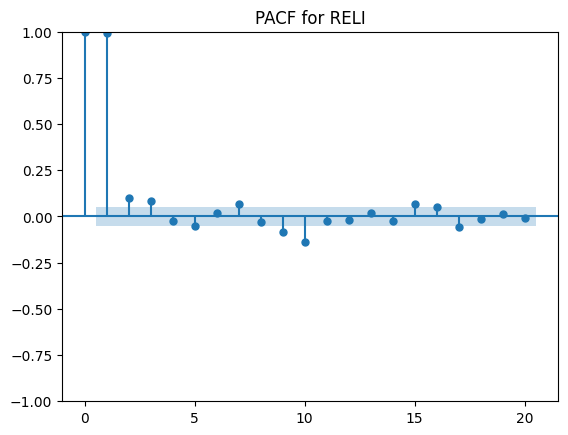

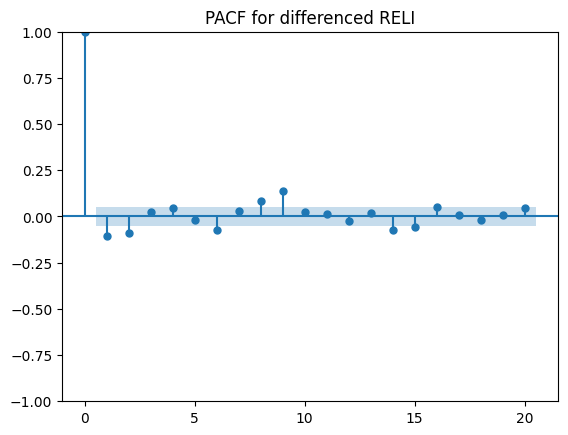

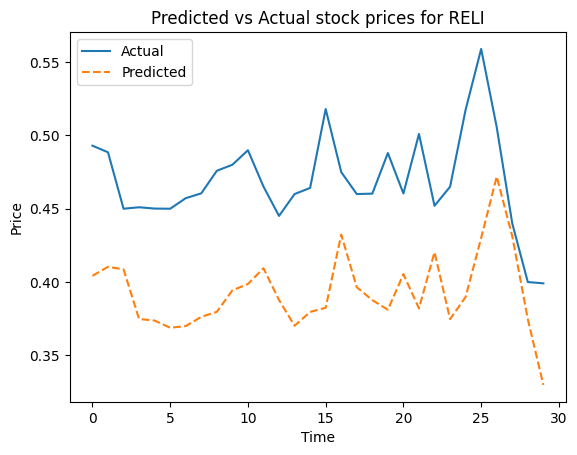

Best config for GTEC.csv: (0, 2, 1)


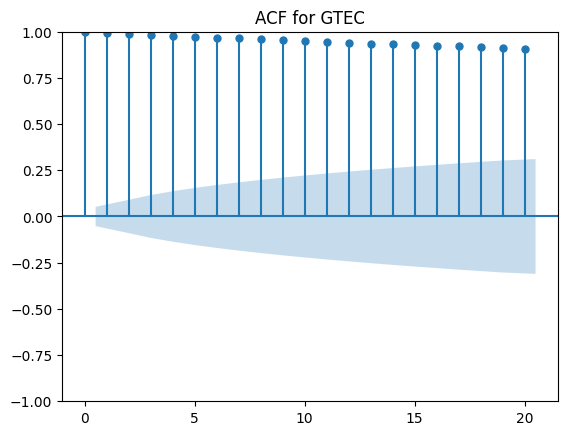

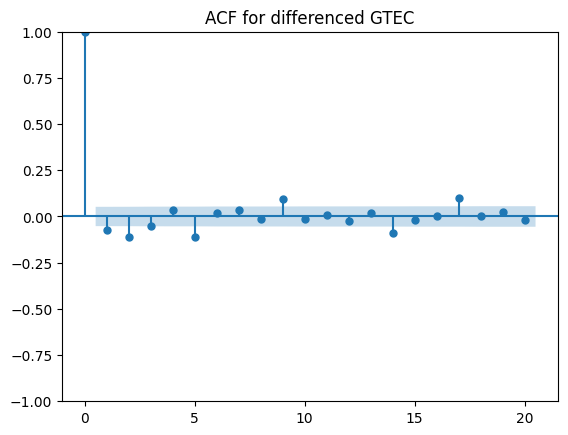

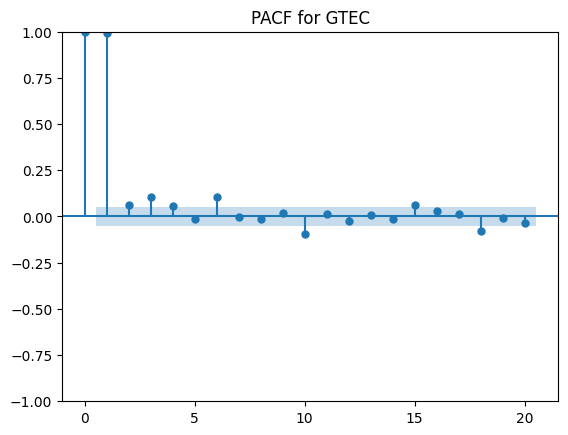

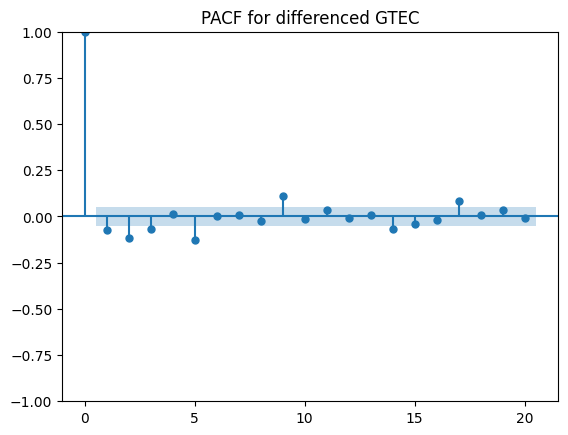

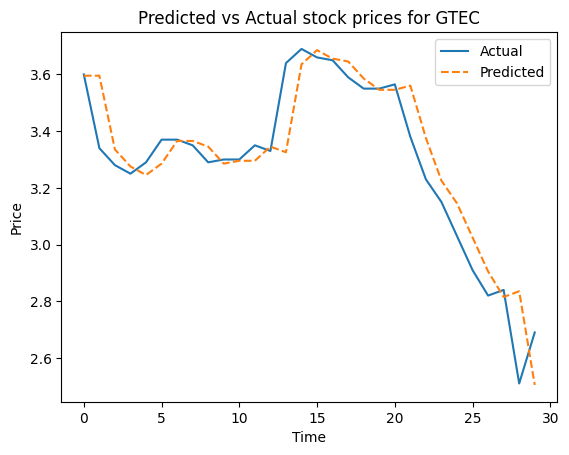

Best config for HOTH.csv: (0, 1, 0)


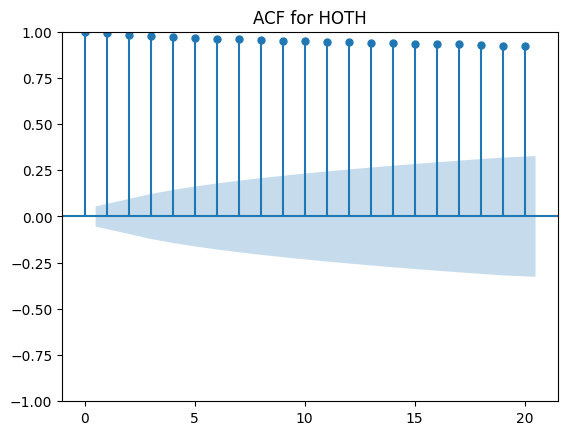

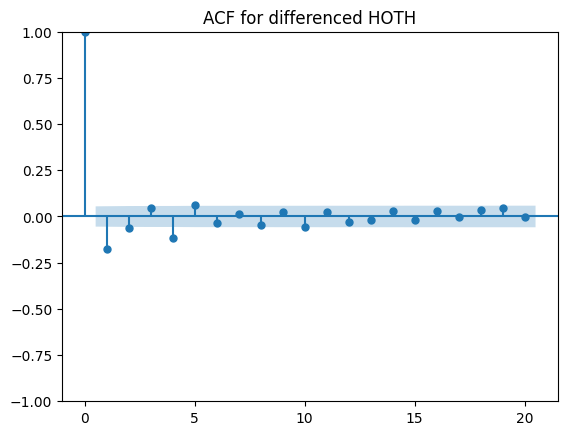

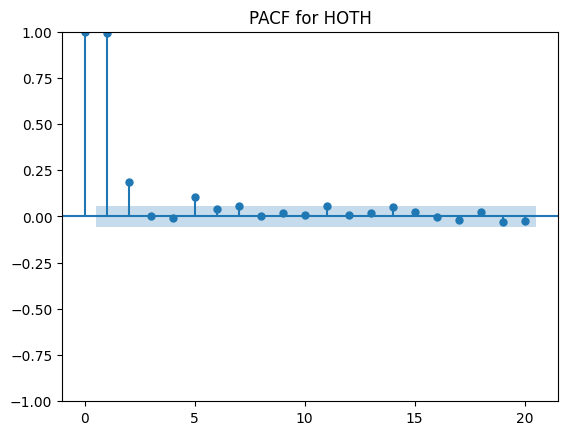

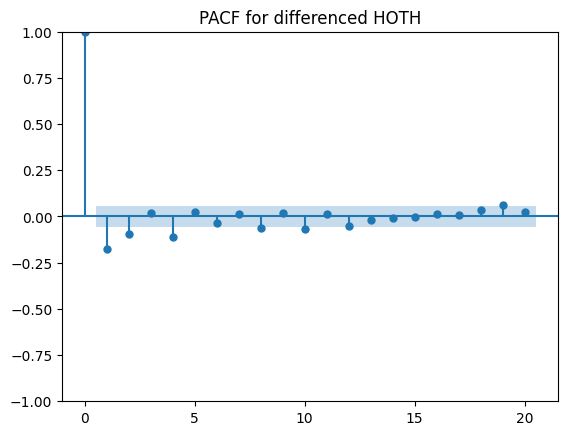

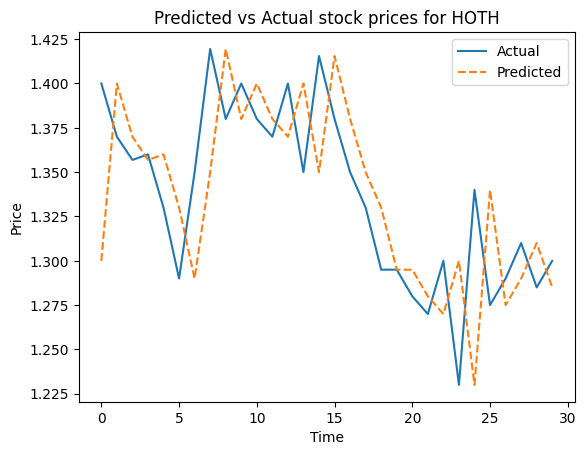

Best config for CLSK.csv: (0, 2, 1)


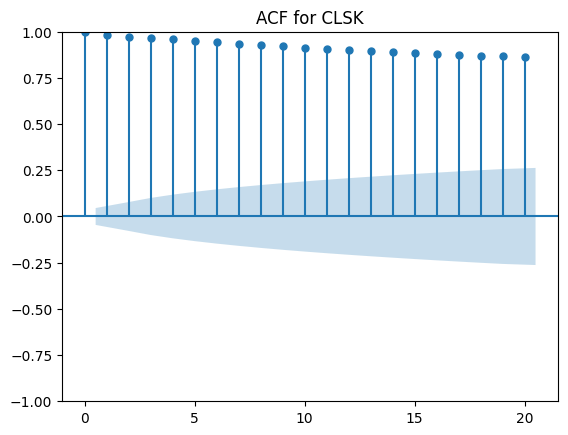

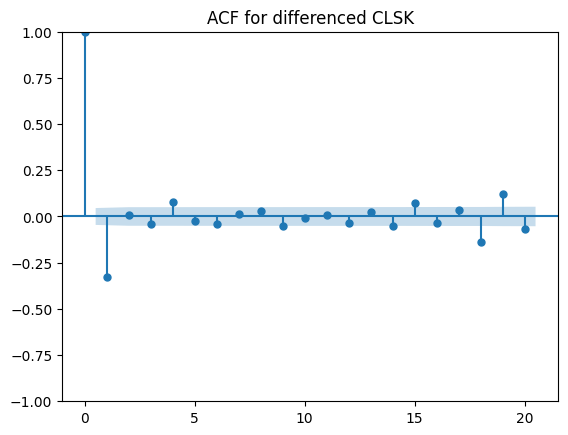

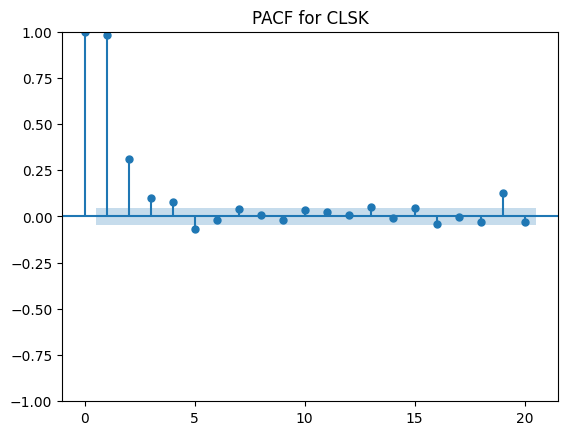

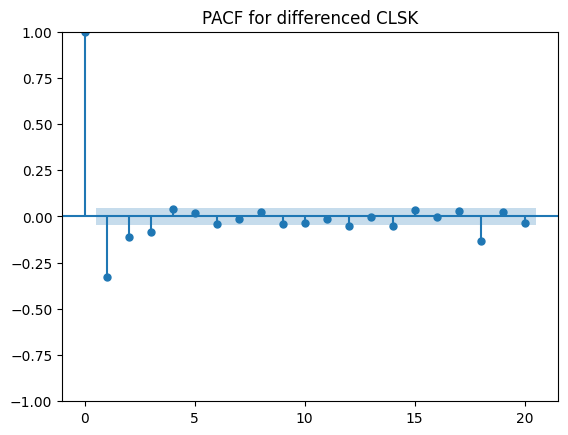

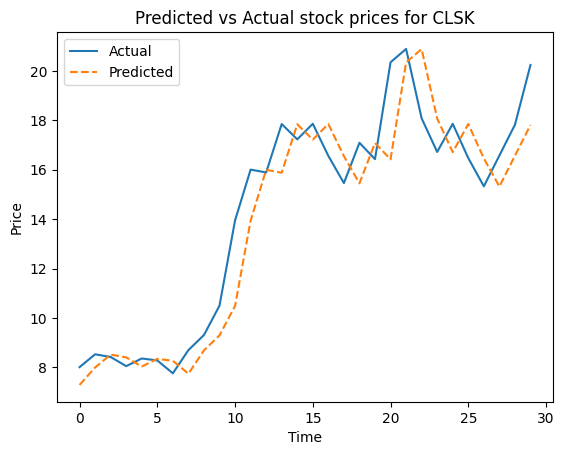

Best config for ROKU.csv: (3, 1, 3)


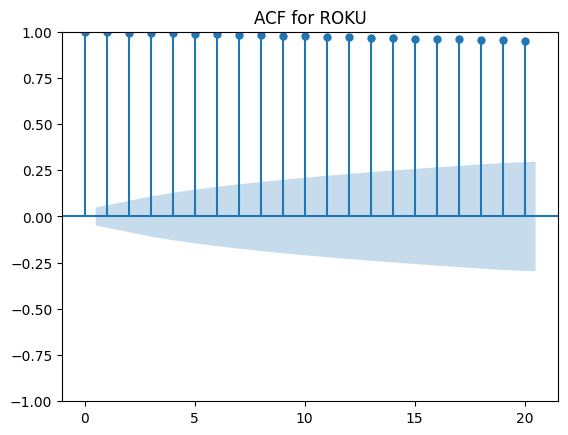

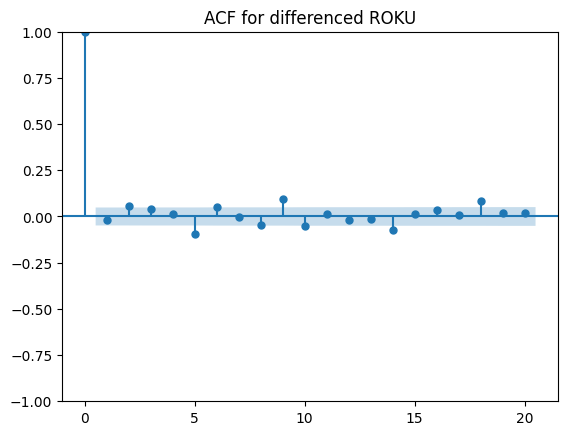

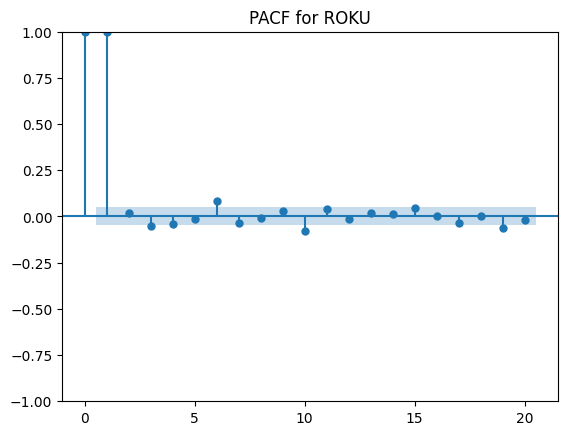

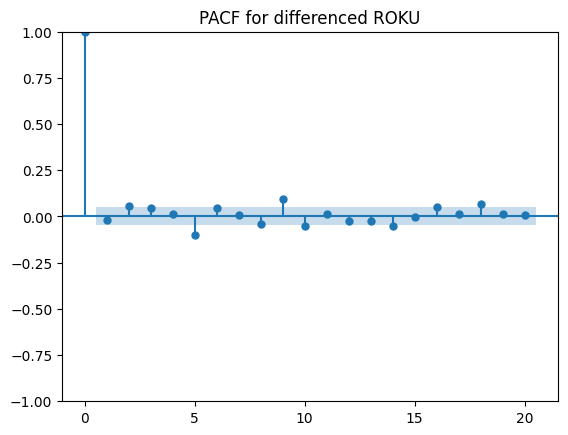

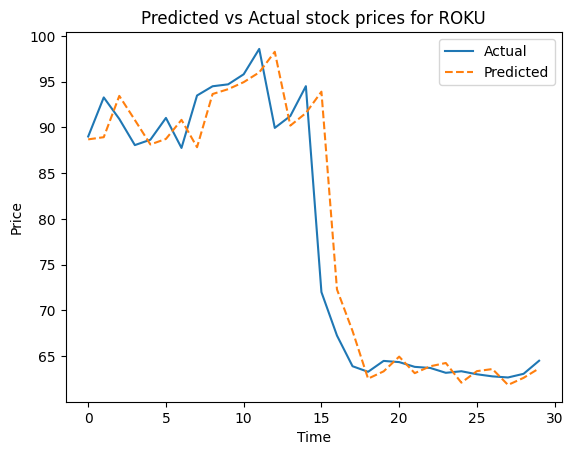

Best config for PLSE.csv: (3, 0, 2)


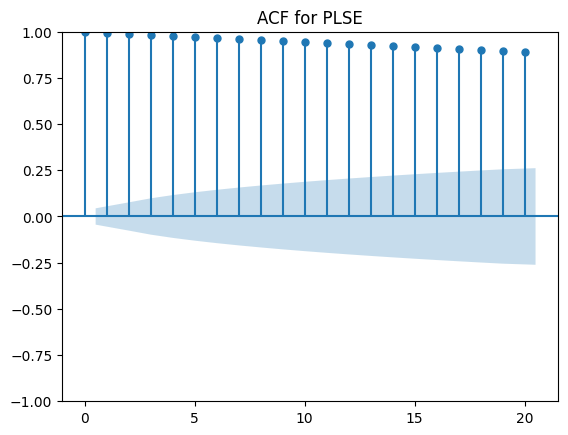

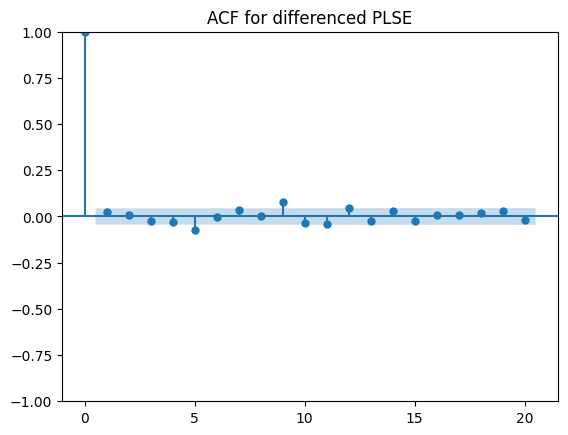

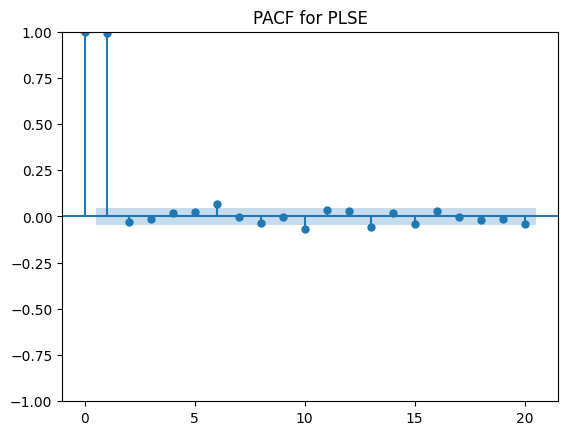

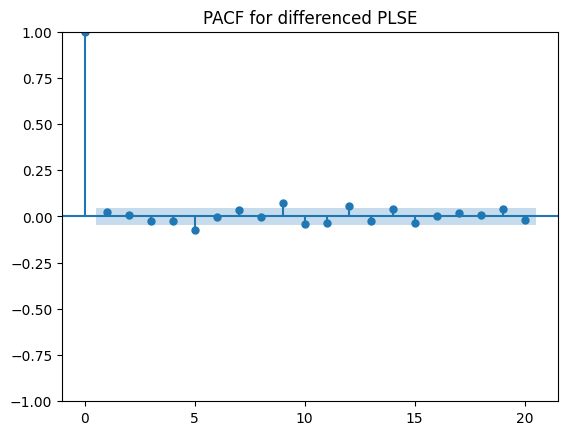

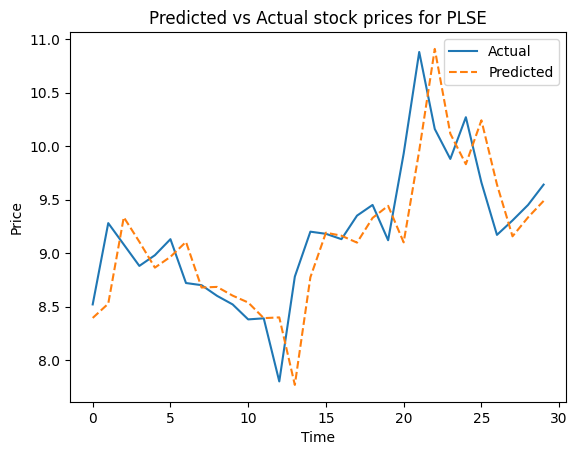

Best config for CMBM.csv: (3, 0, 4)


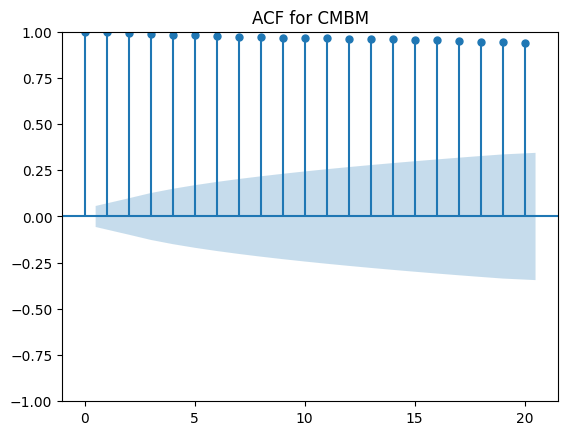

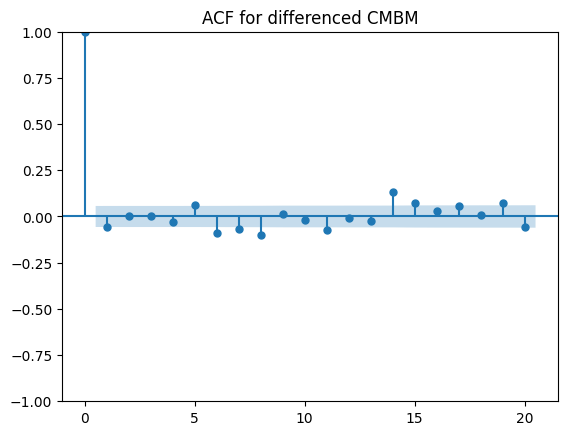

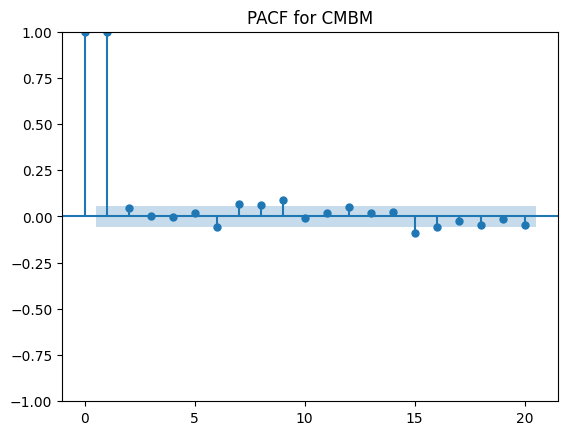

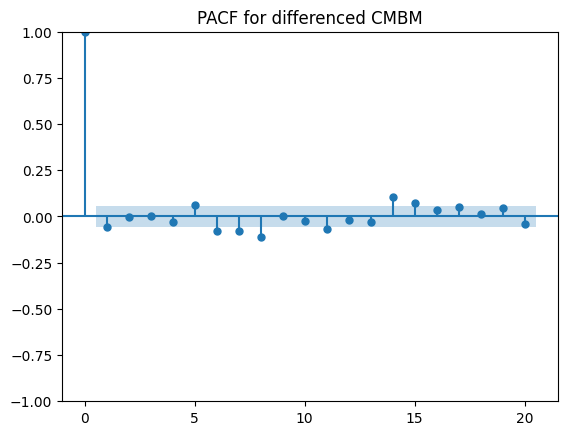

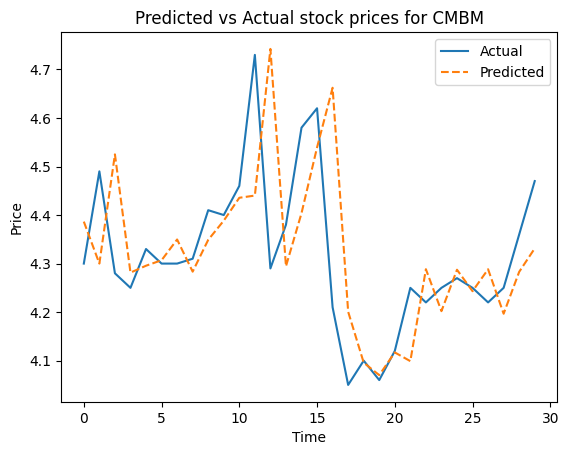

Best config for CTRM.csv: (2, 2, 3)


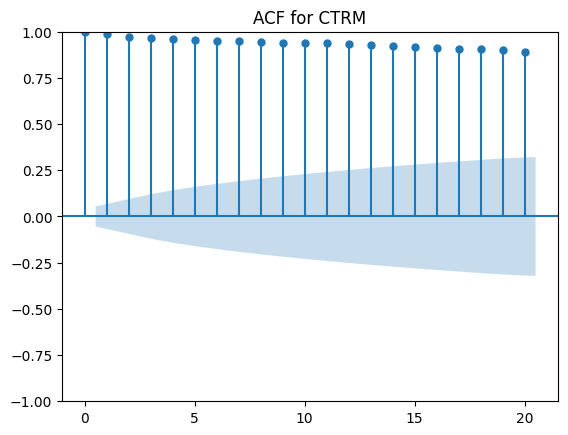

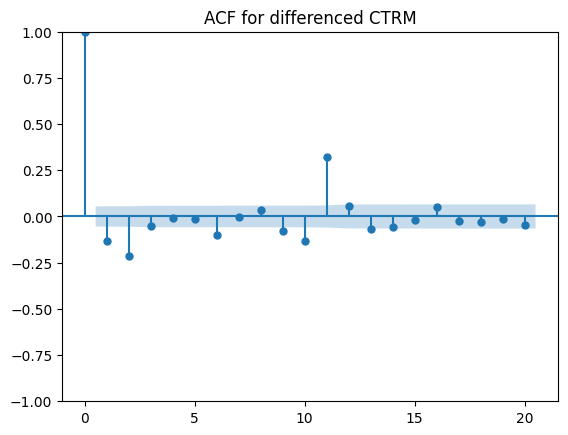

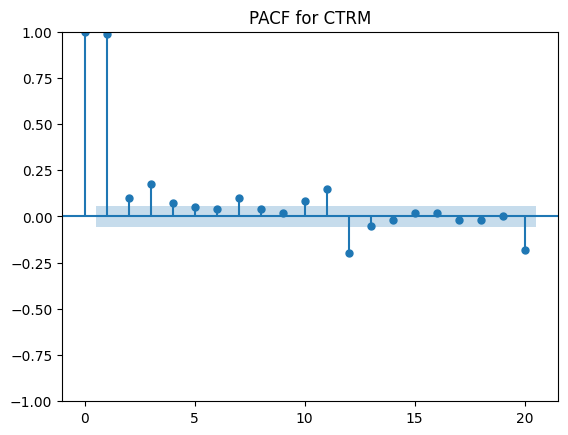

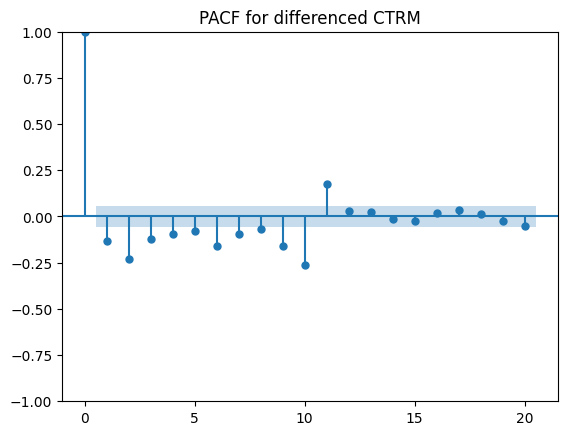

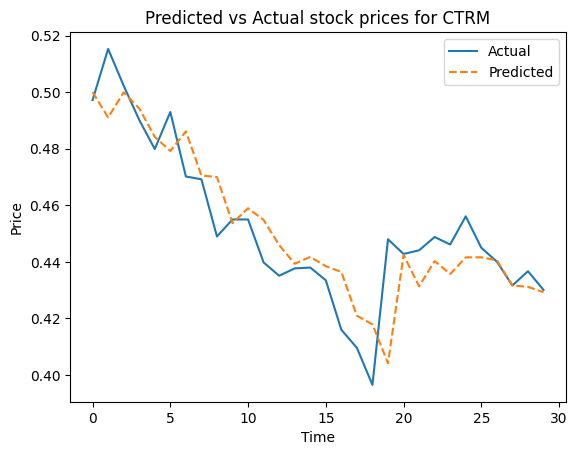

Best config for EDRY.csv: (2, 0, 1)


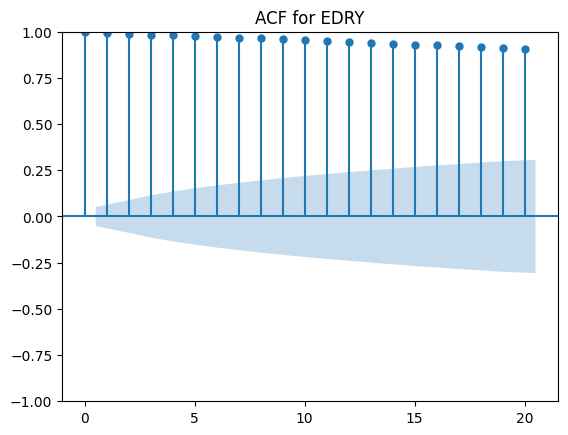

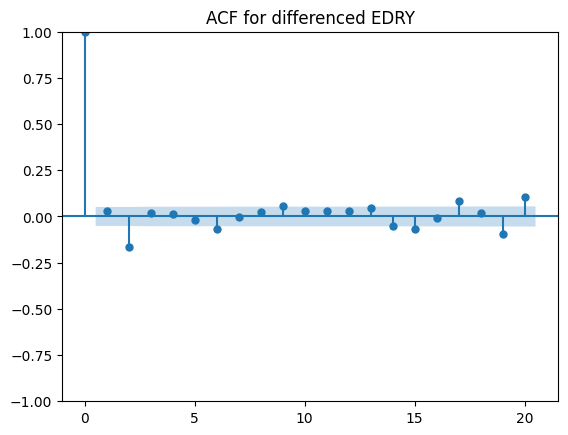

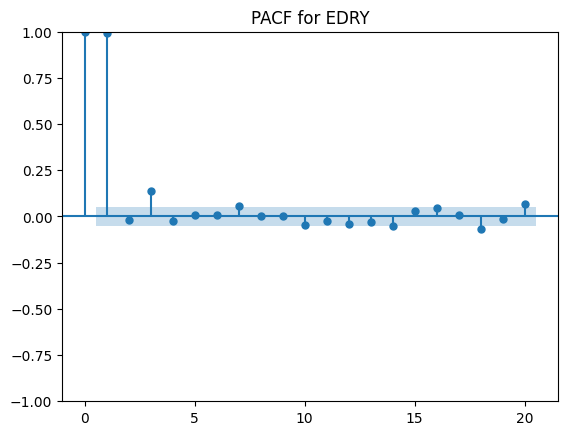

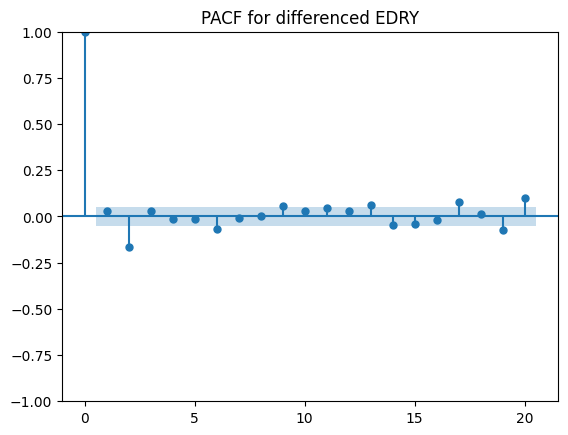

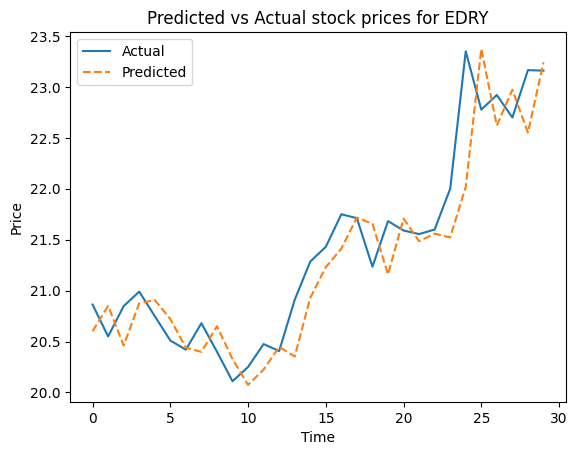

Best config for FAT.csv: (4, 2, 4)


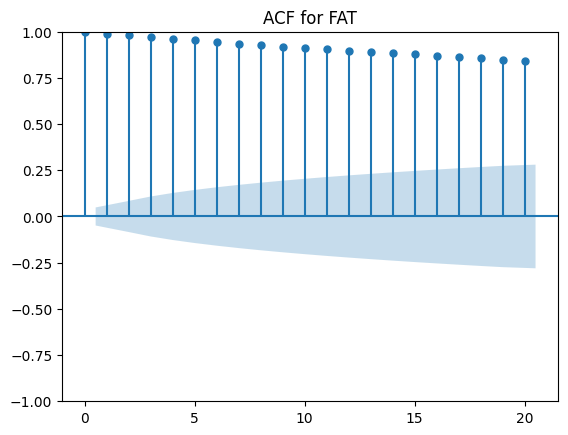

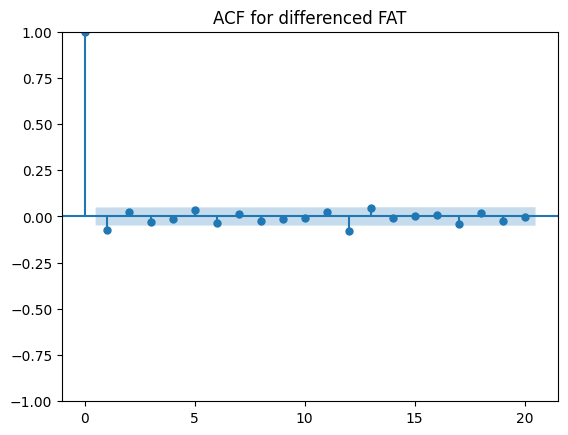

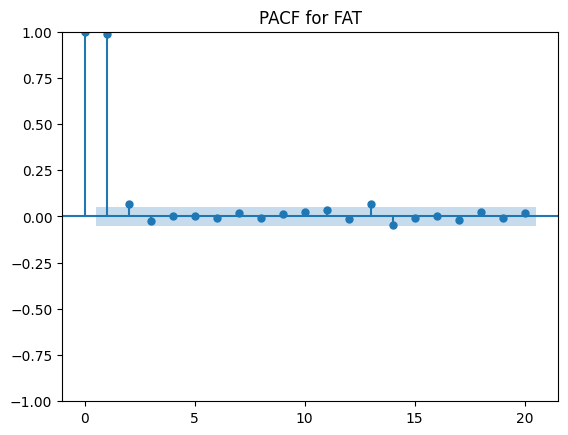

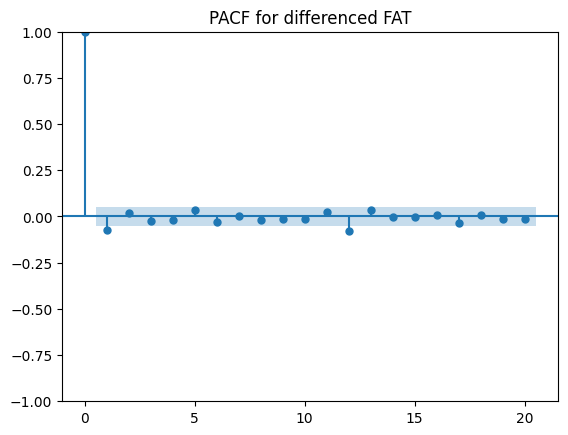

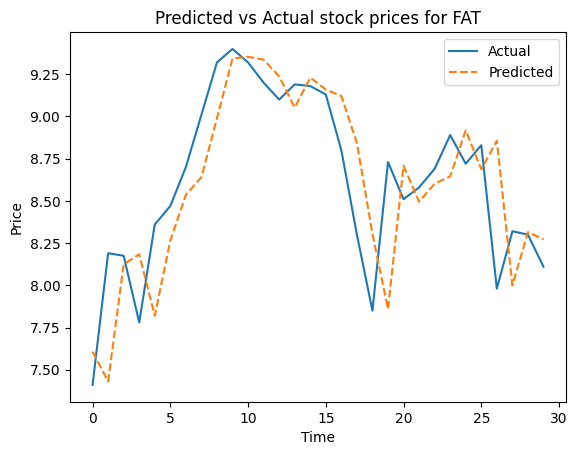

Best config for AVPT.csv: (3, 0, 1)


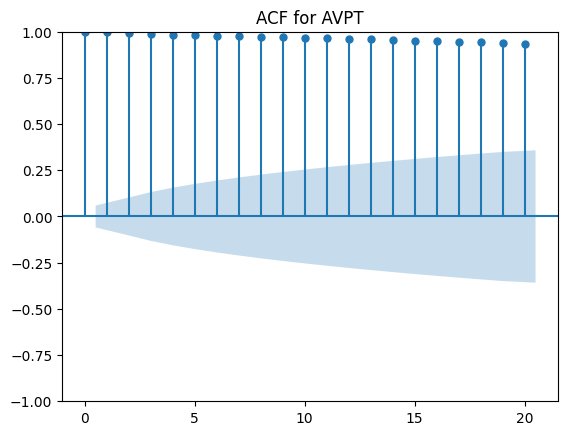

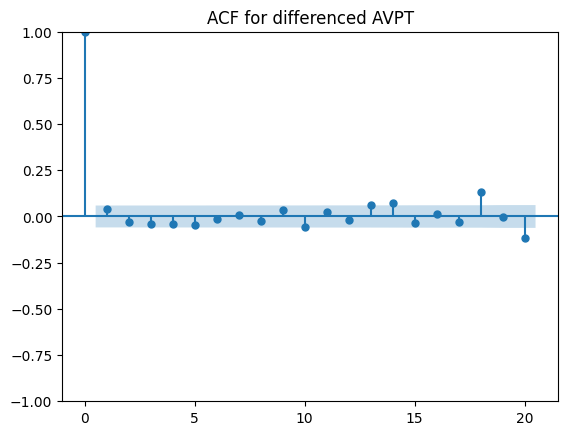

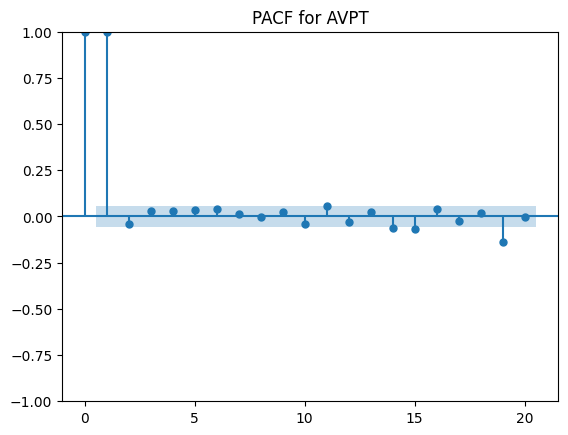

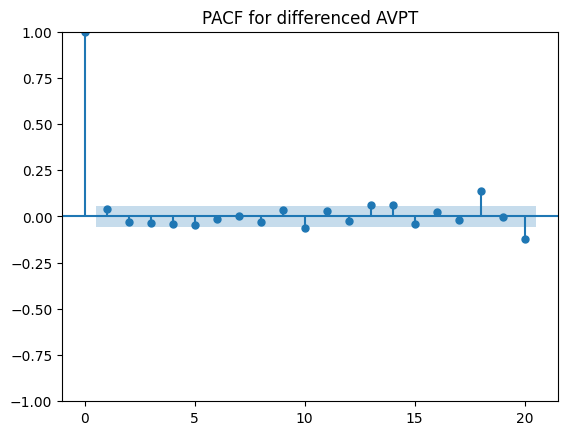

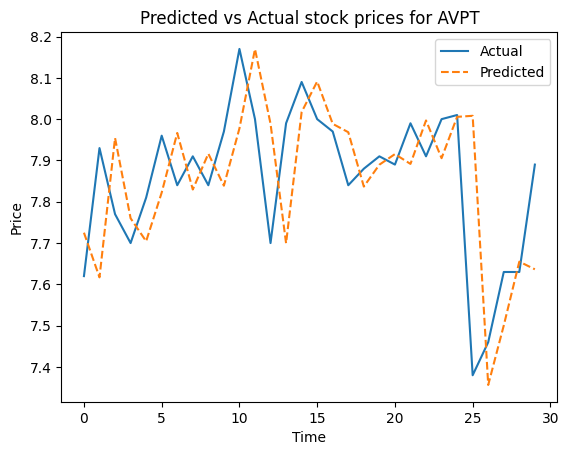

Best config for MRNA.csv: (2, 0, 3)


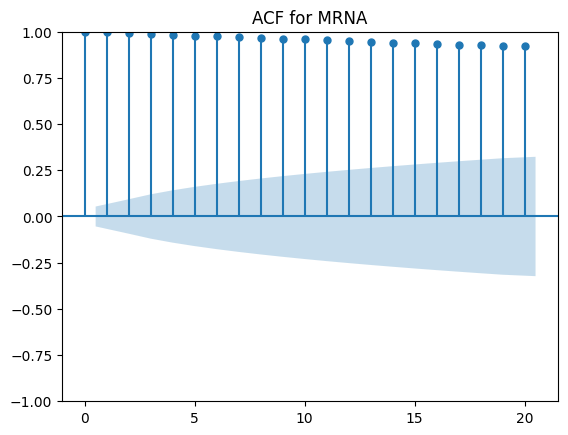

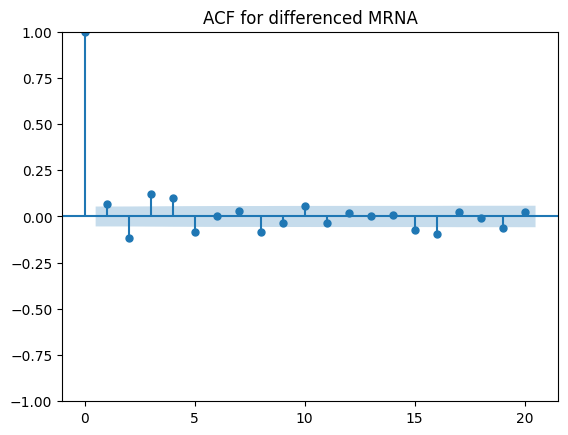

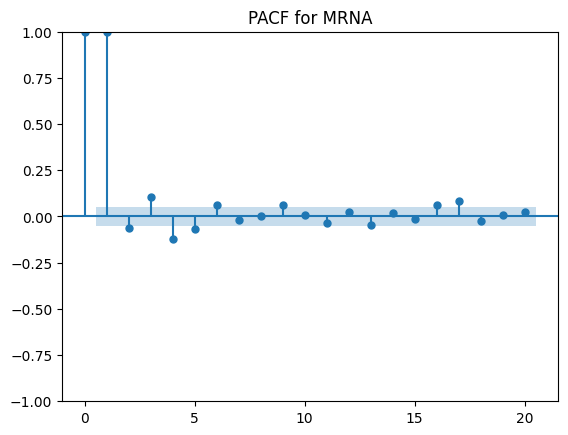

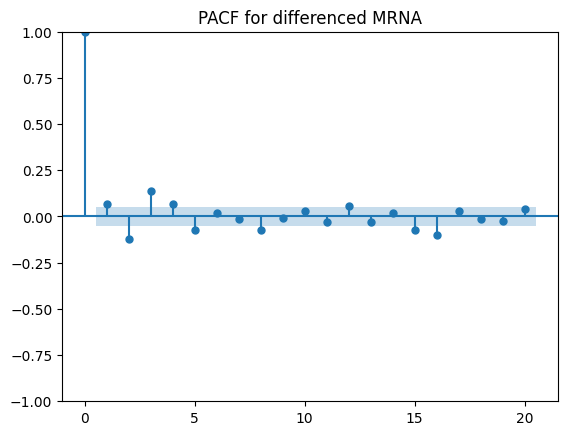

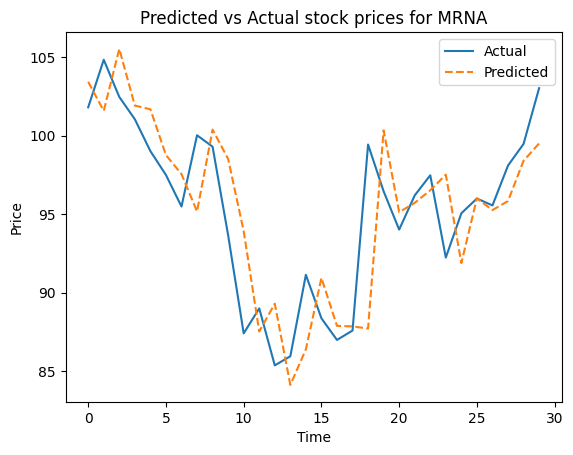

Best config for NWTN.csv: (3, 2, 3)


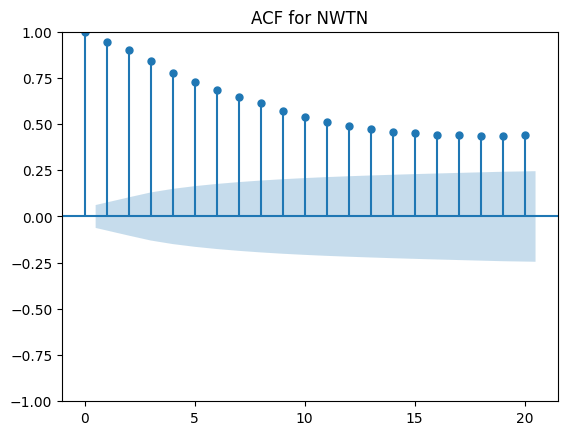

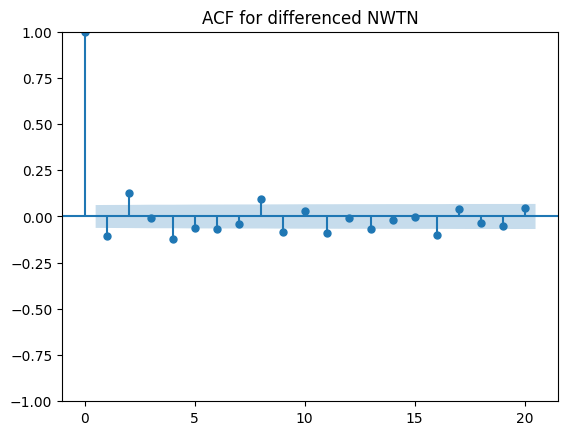

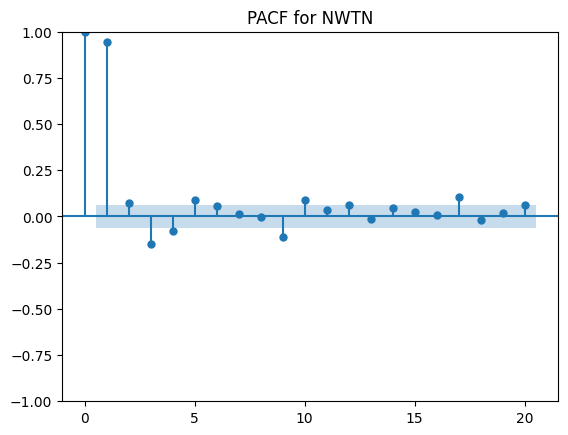

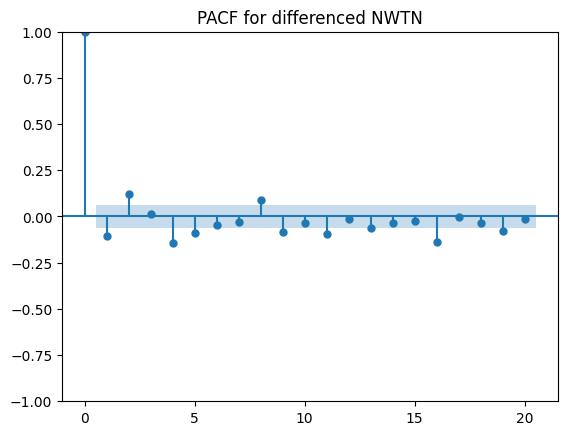

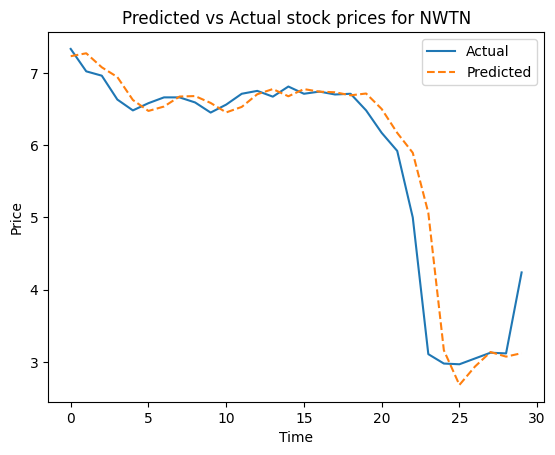

Best config for ADV.csv: (3, 2, 2)


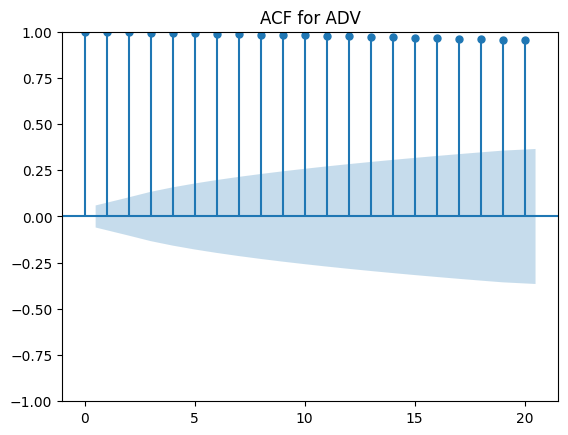

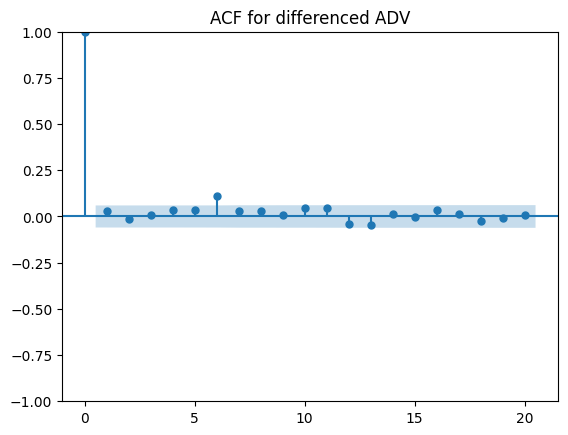

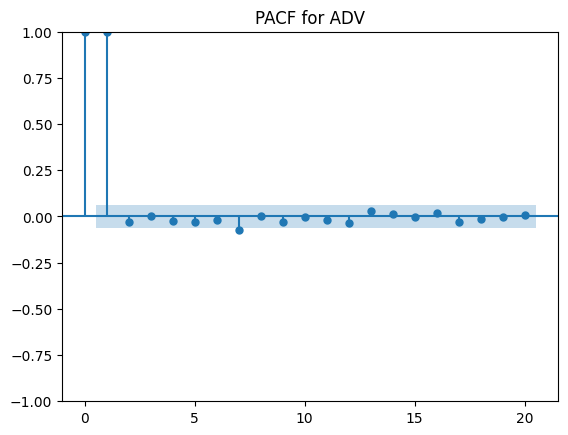

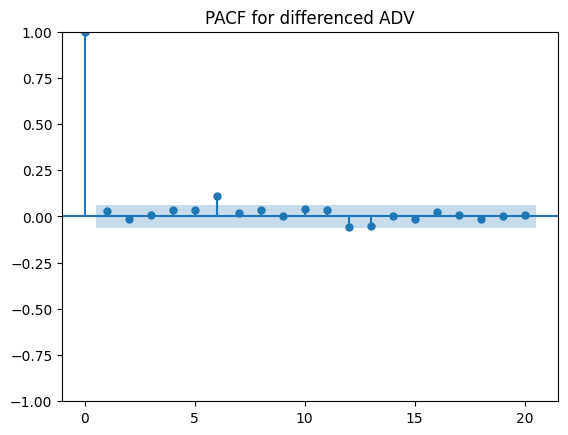

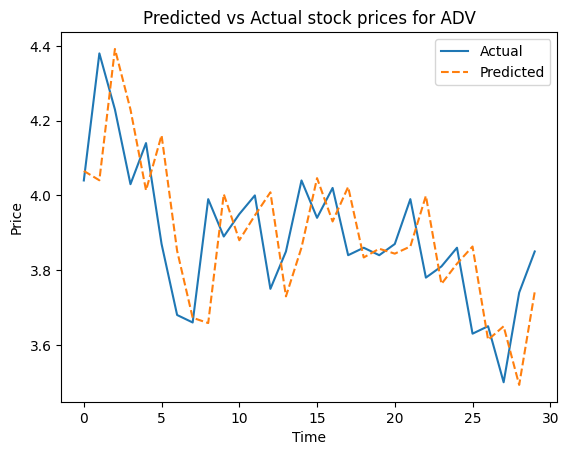

Best config for NKLA.csv: (3, 2, 4)


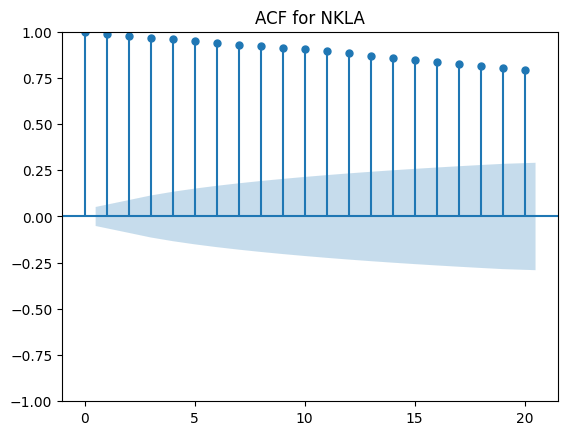

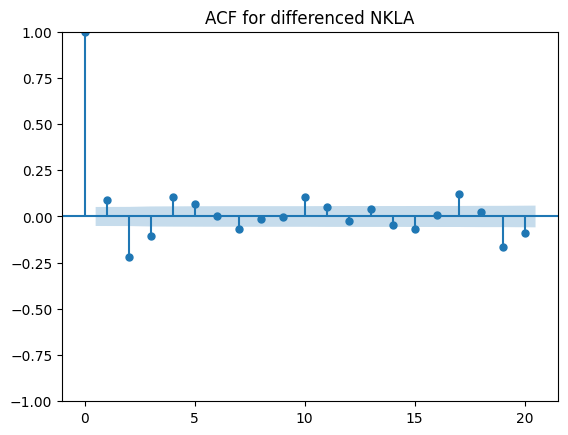

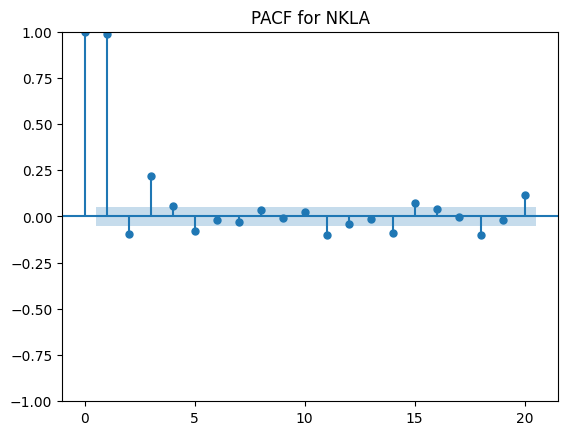

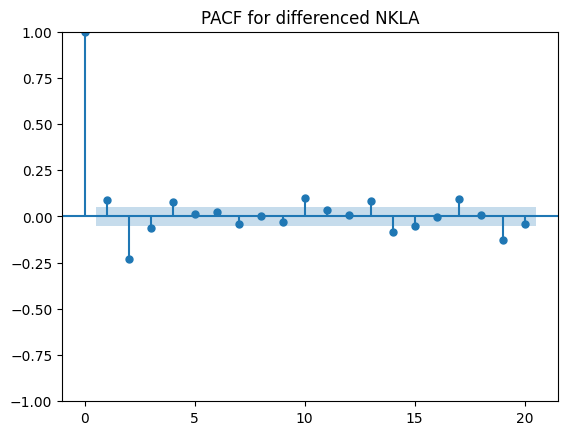

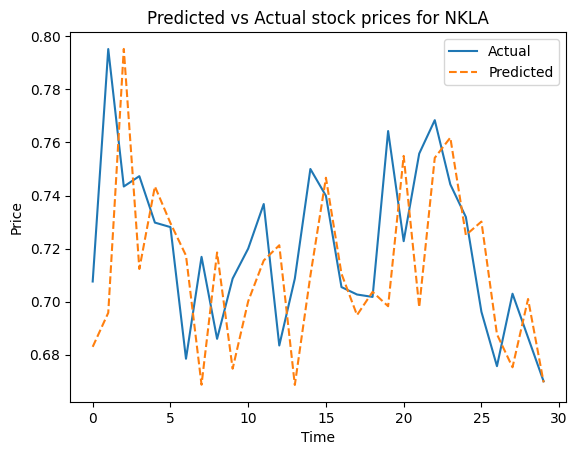

Best config for AGBA.csv: (2, 2, 3)


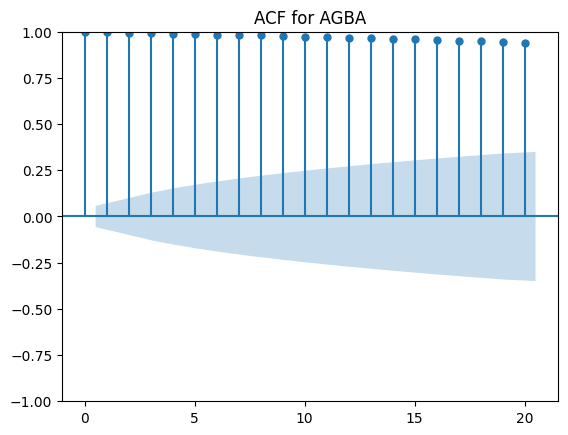

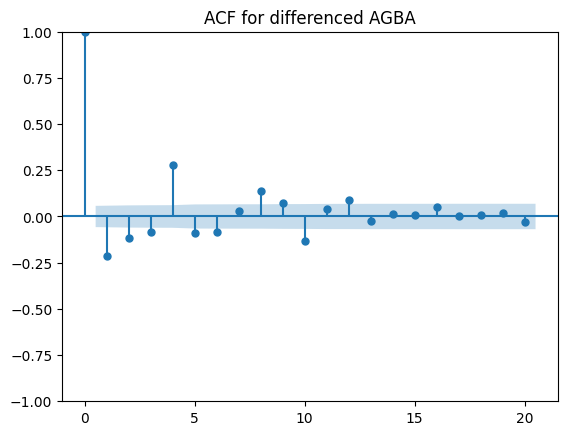

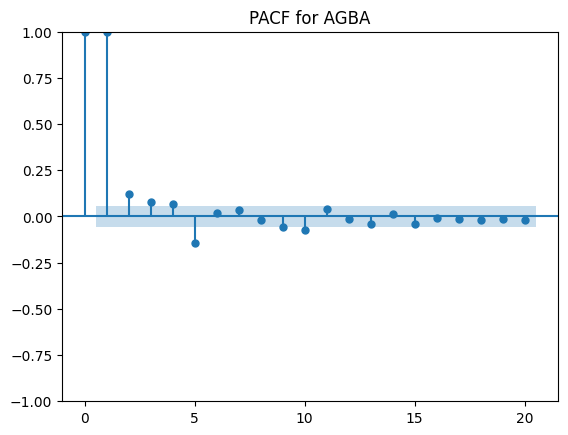

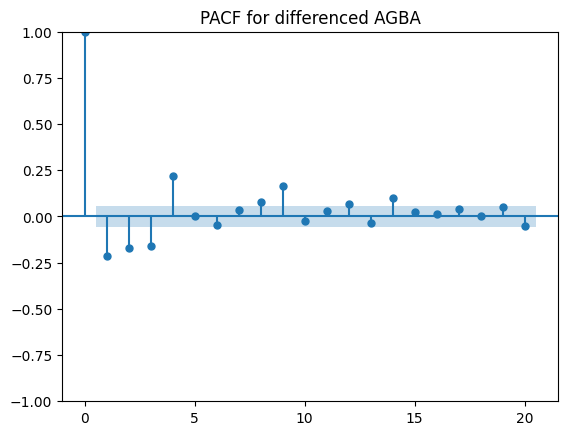

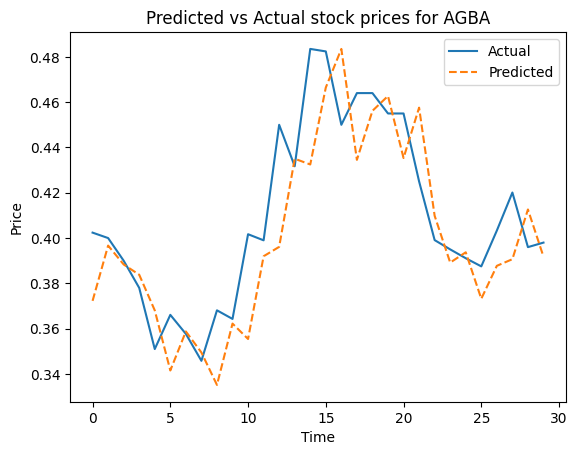

Best config for MSBI.csv: (0, 0, 4)


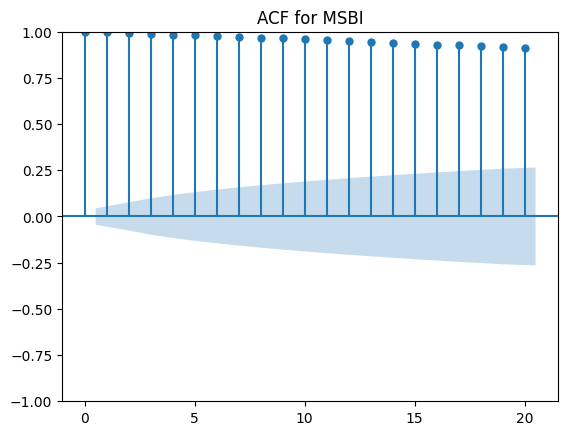

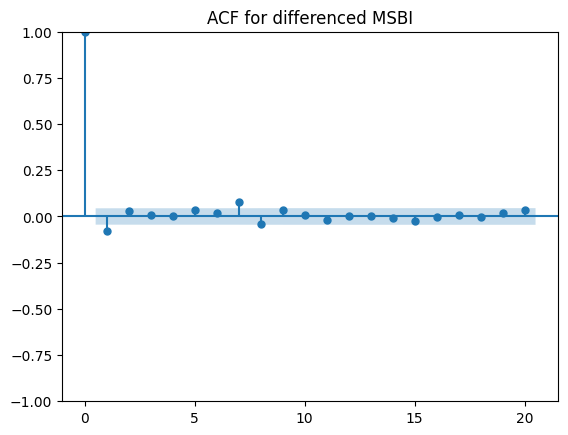

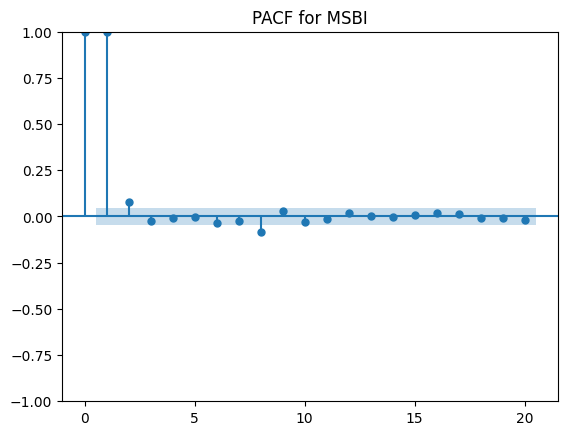

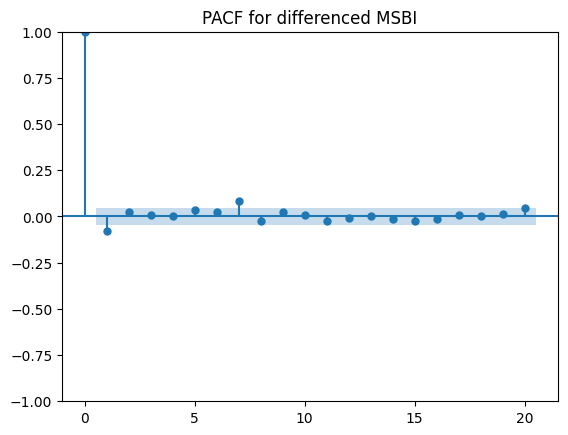

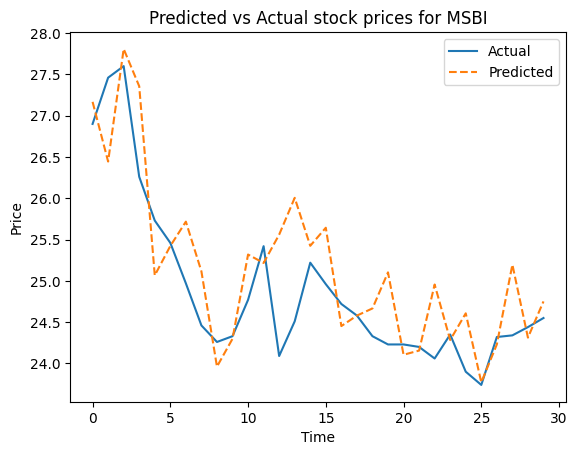

Best config for VRRM.csv: (2, 2, 4)


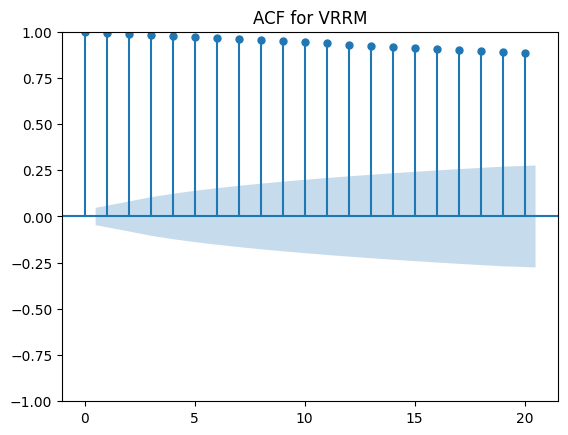

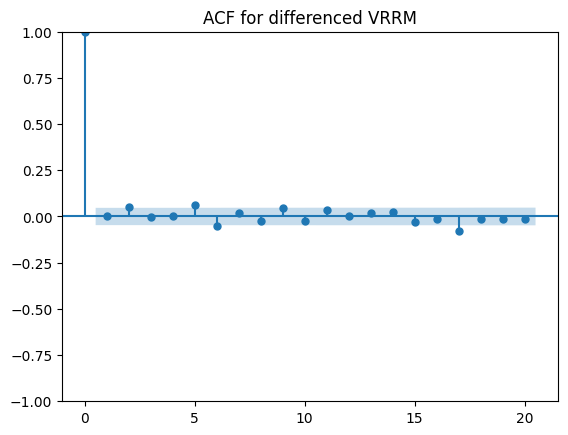

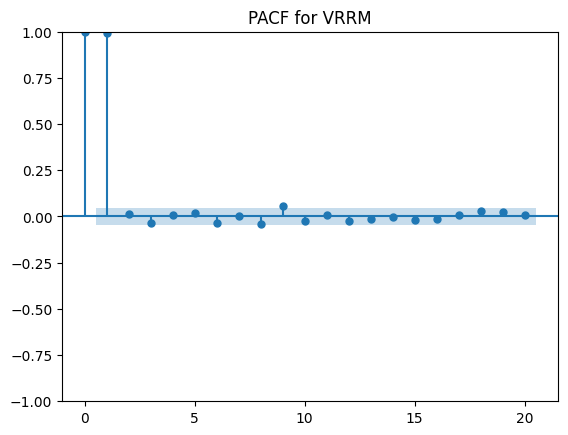

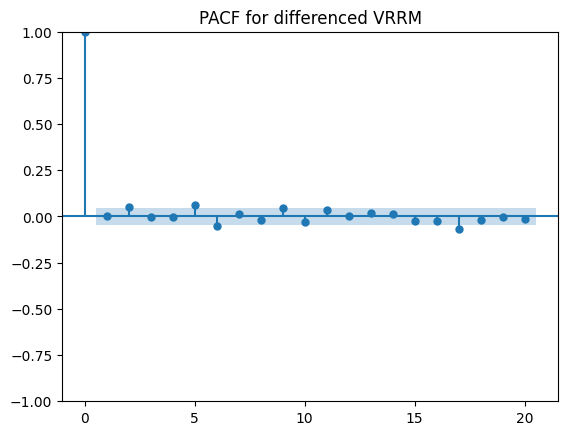

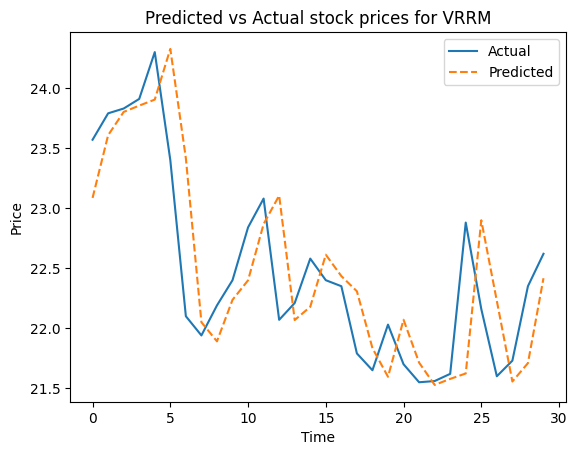

Best config for JFU.csv: (4, 1, 4)


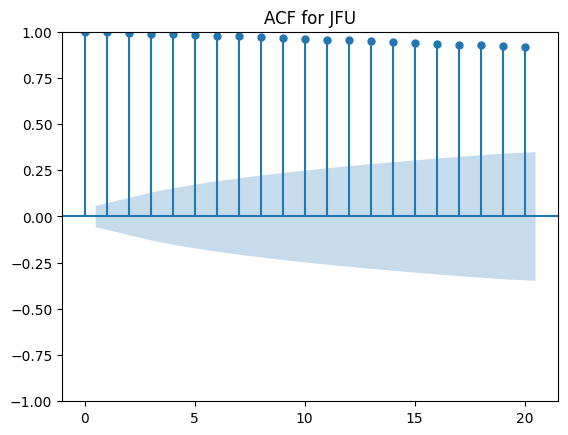

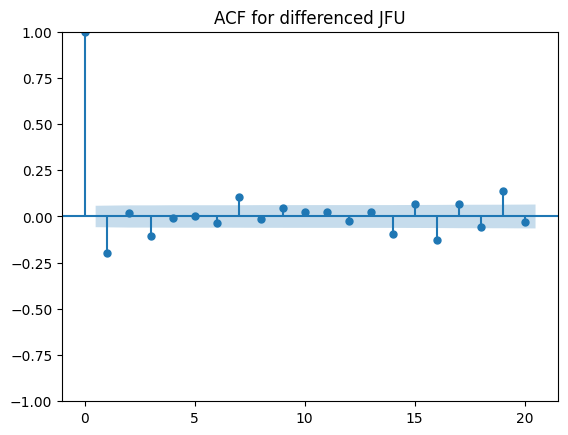

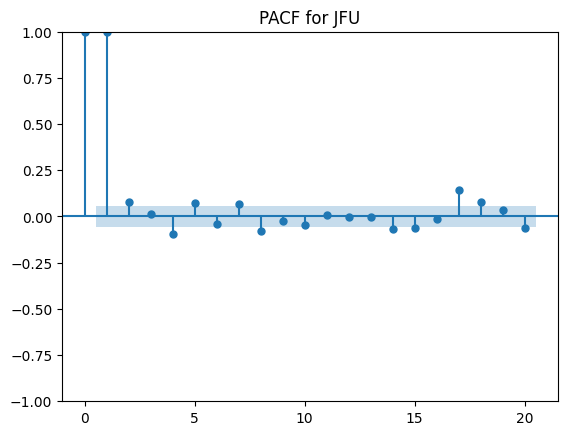

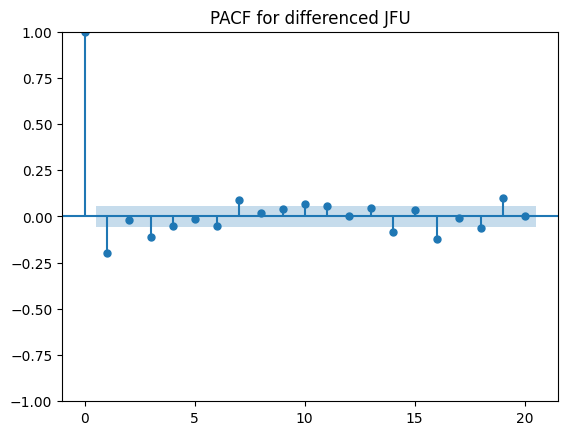

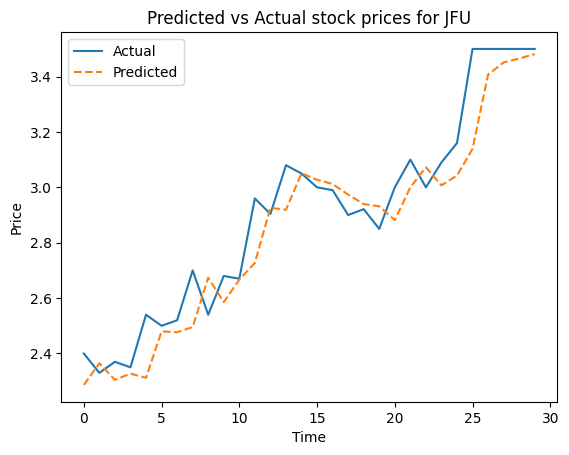

Best config for BAND.csv: (4, 1, 4)


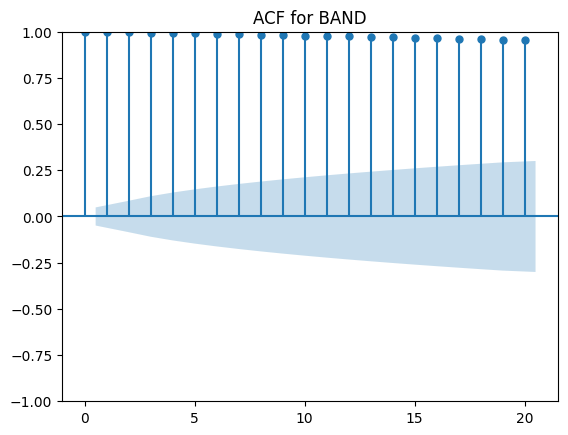

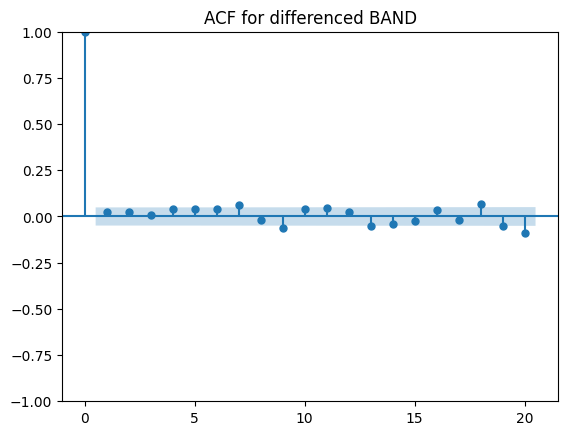

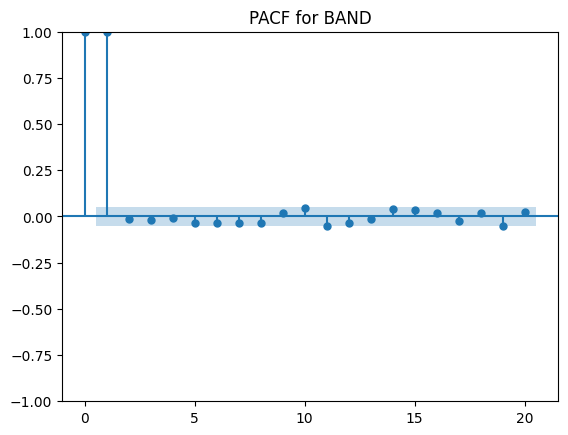

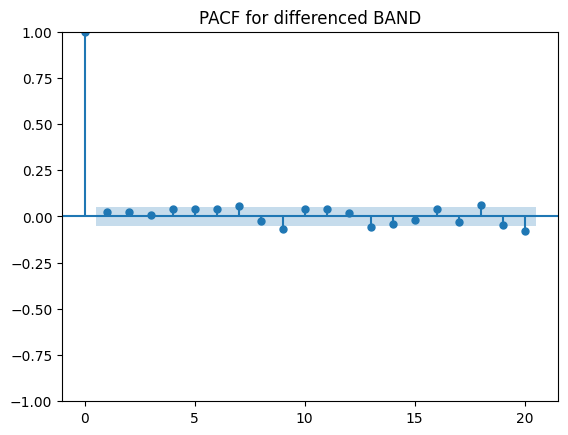

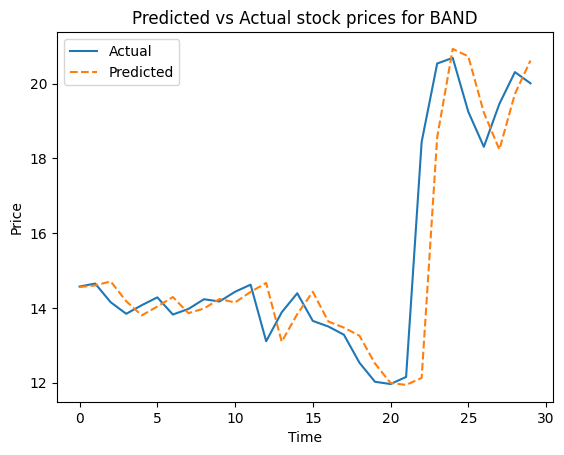

Best config for PTGX.csv: (4, 1, 4)


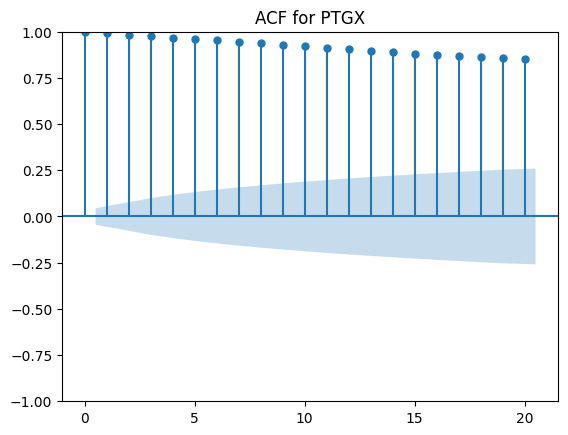

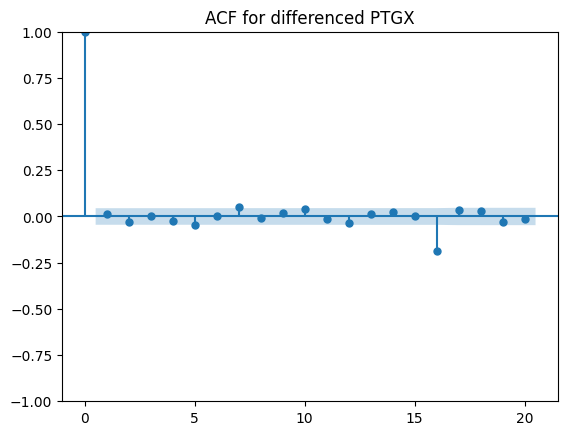

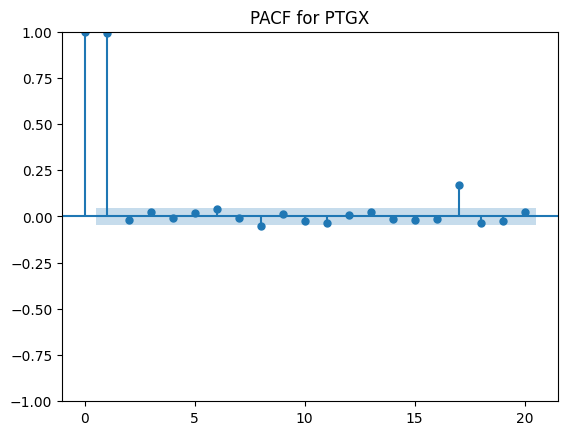

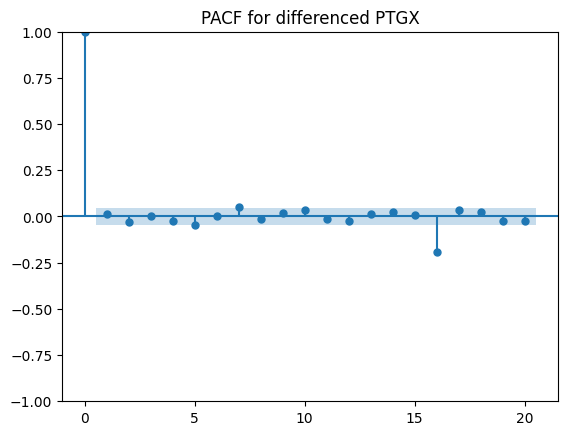

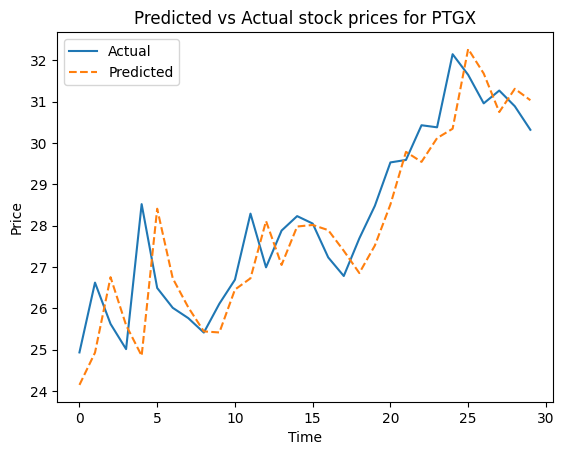

Best config for SCWX.csv: (3, 0, 4)


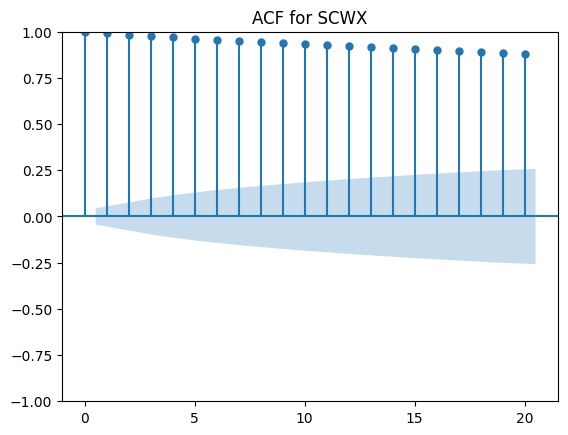

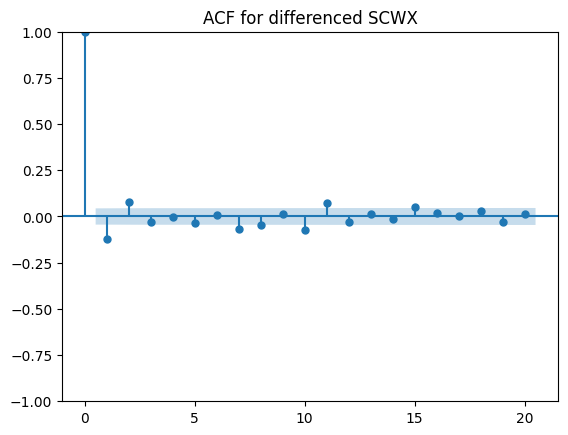

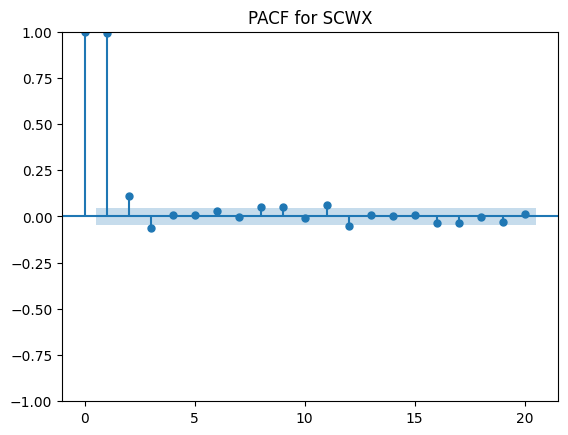

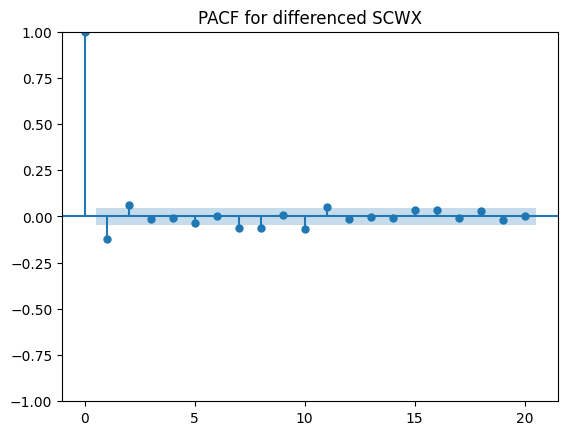

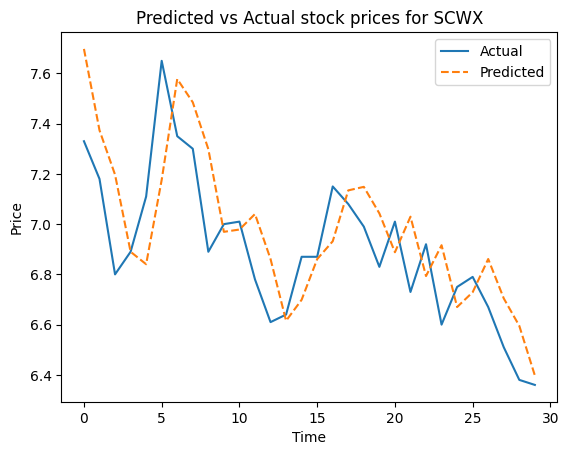

Best config for NODK.csv: (4, 0, 2)


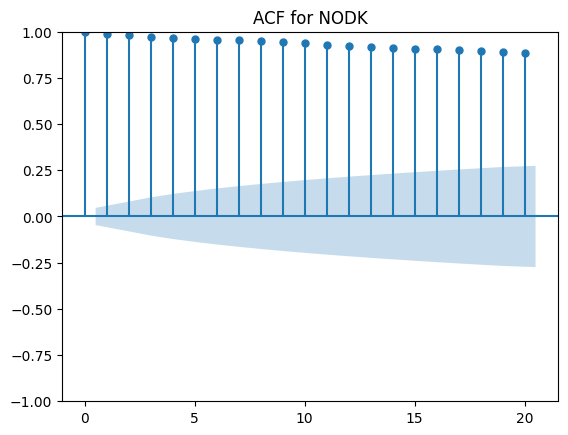

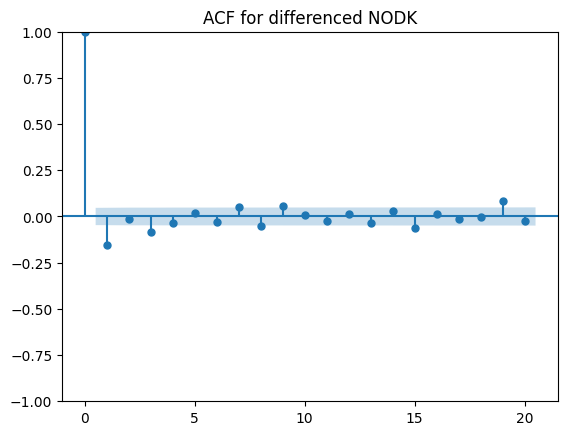

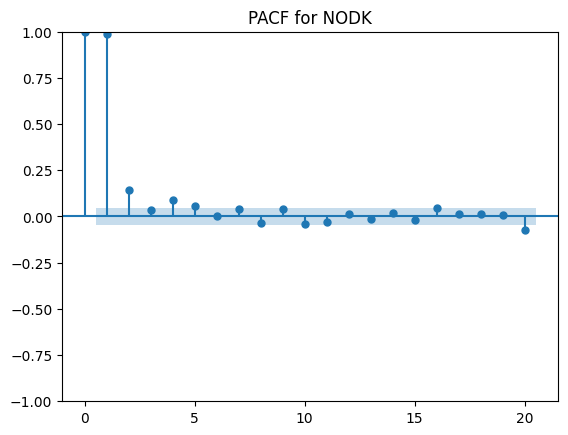

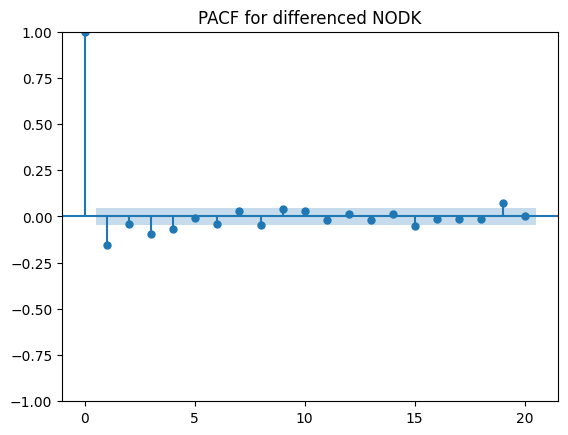

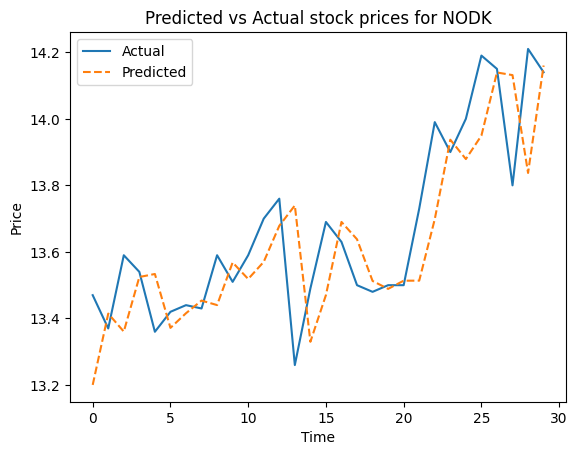

Best config for FSEA.csv: (4, 2, 4)


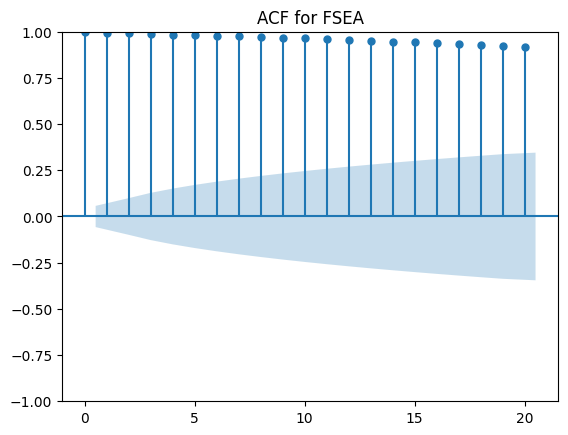

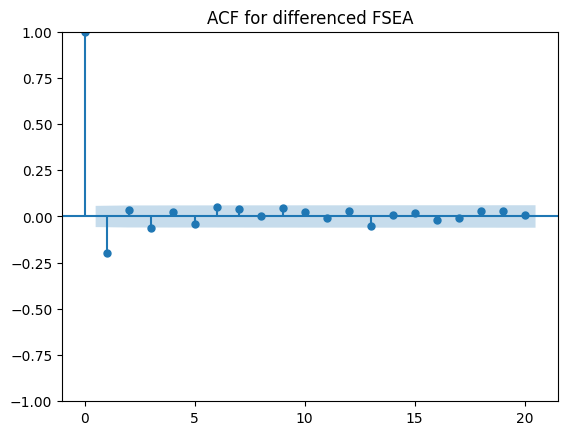

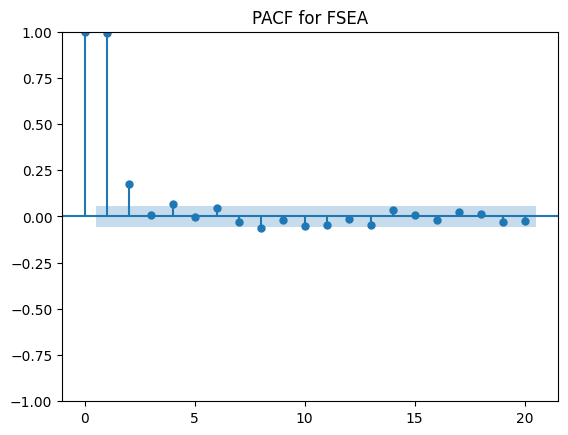

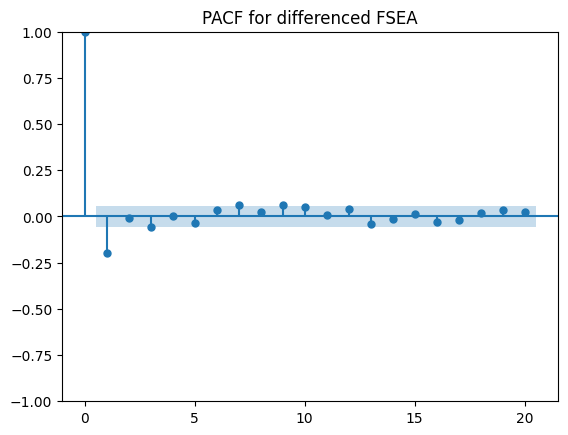

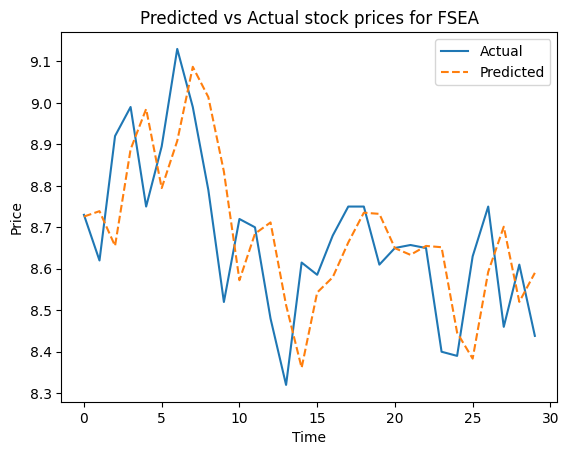

Best config for YTRA.csv: (4, 2, 4)


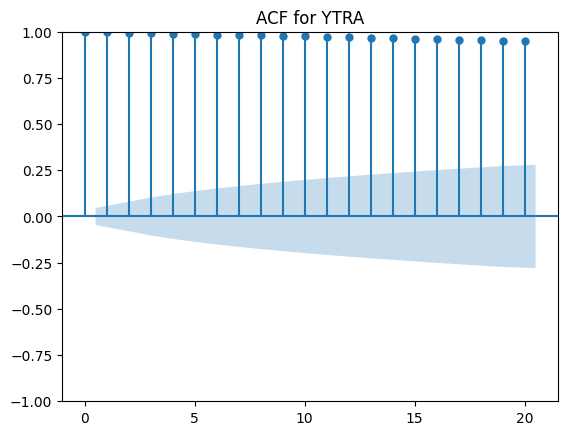

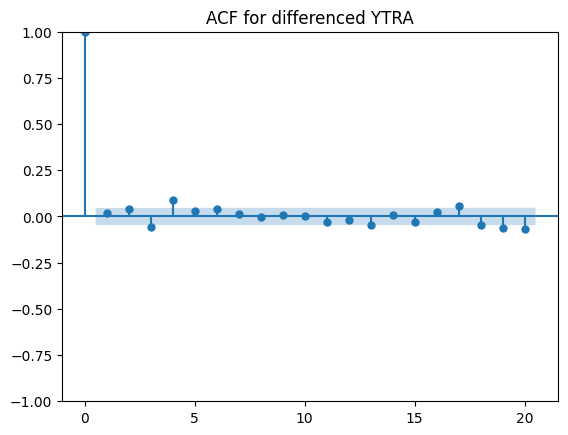

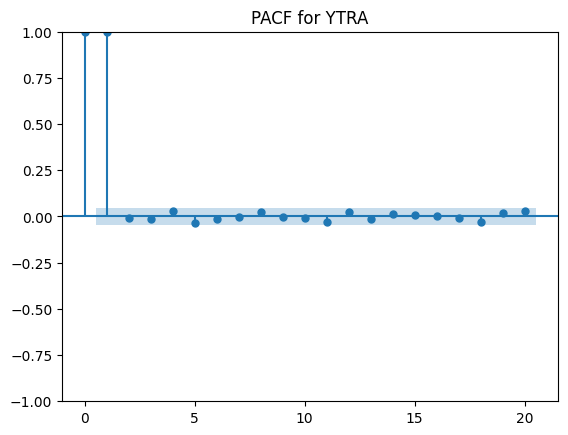

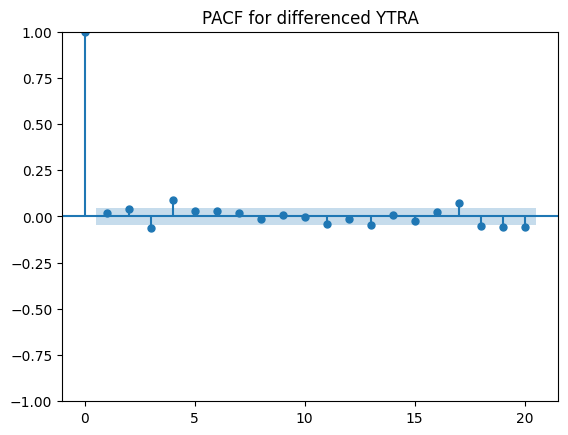

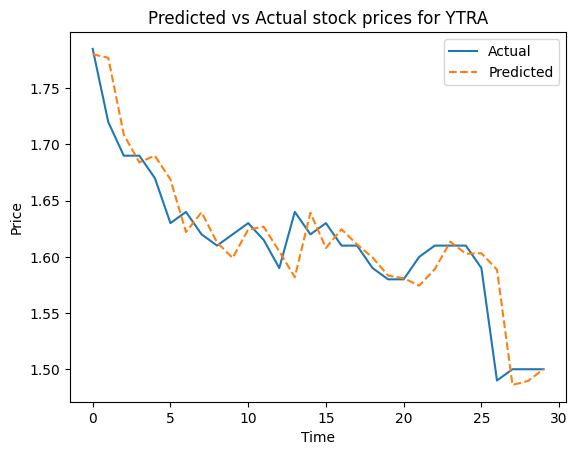

Best config for BTBT.csv: (0, 1, 4)


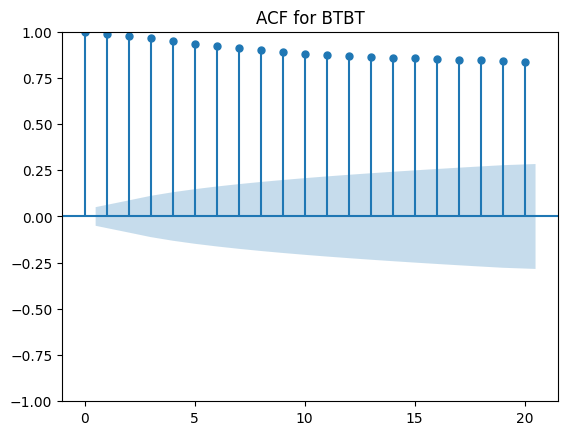

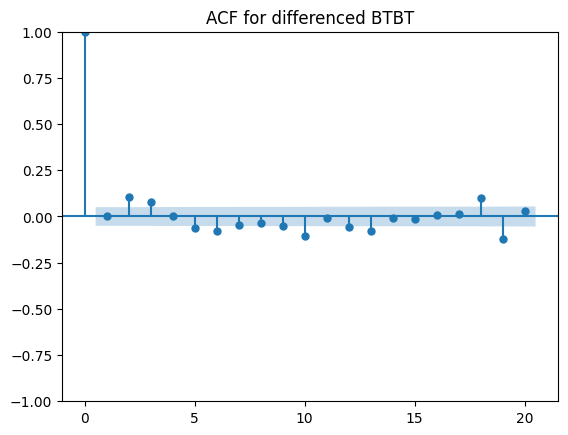

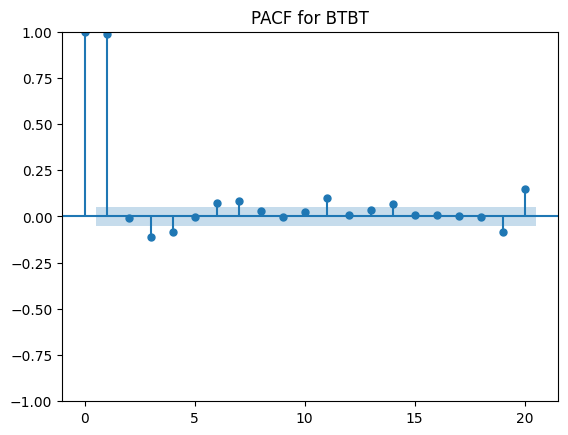

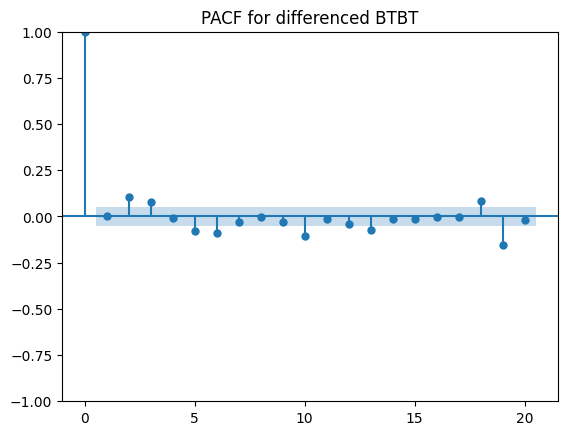

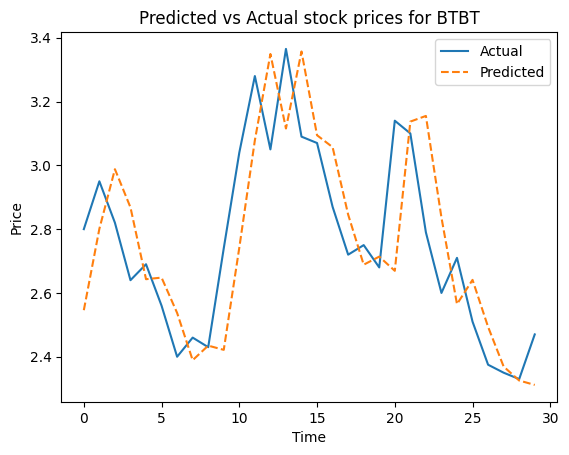

Best config for ATER.csv: (1, 2, 3)


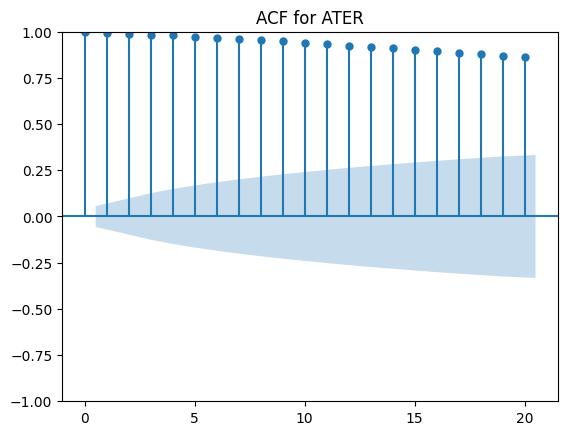

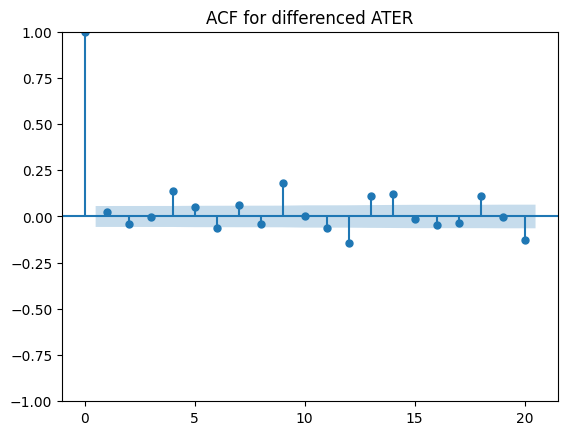

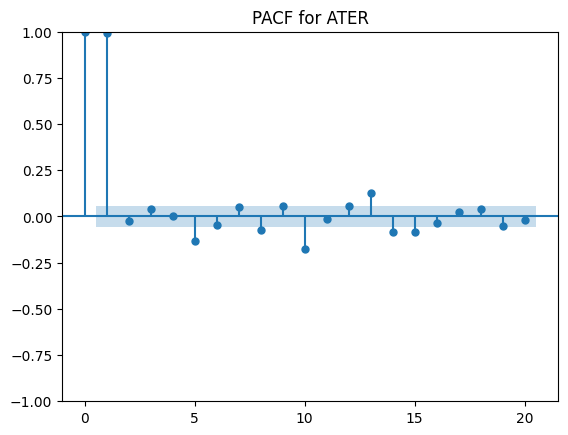

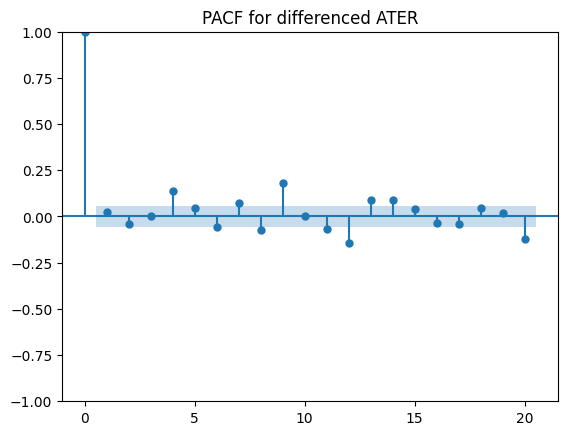

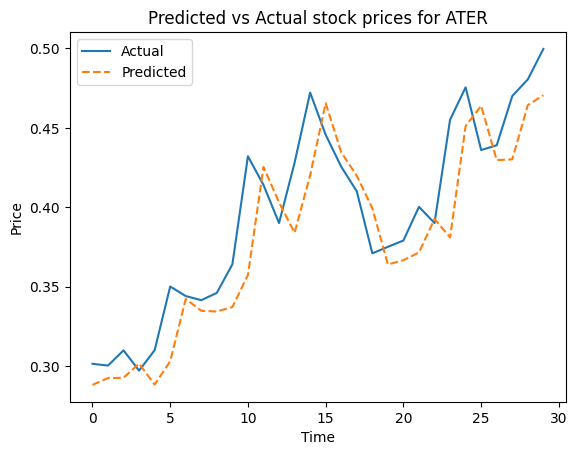

Best config for CMMB.csv: (4, 1, 2)


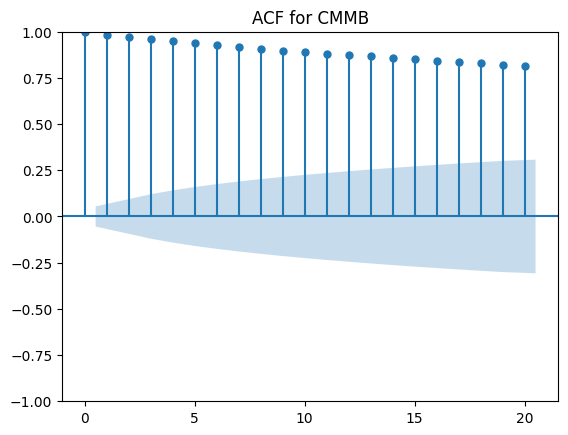

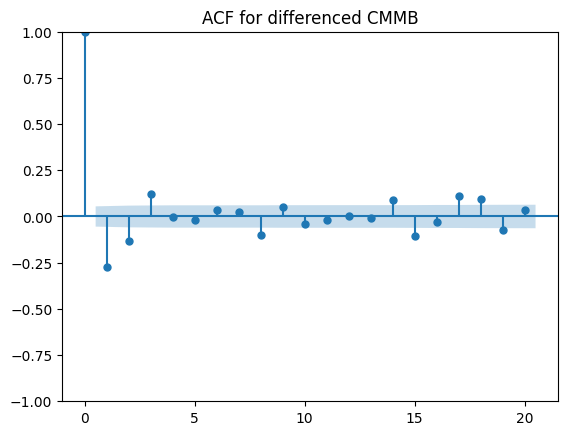

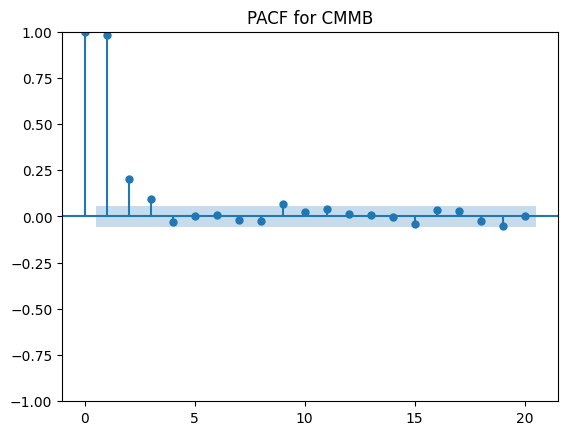

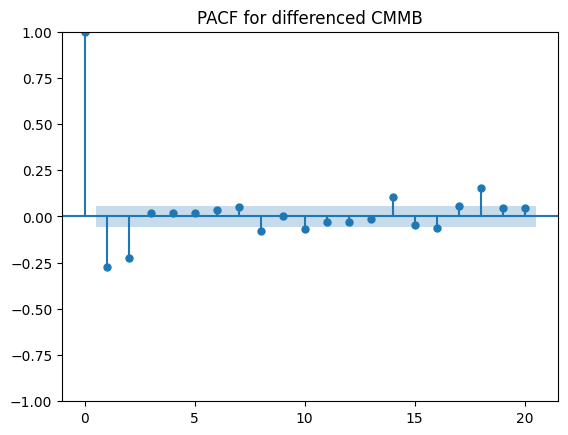

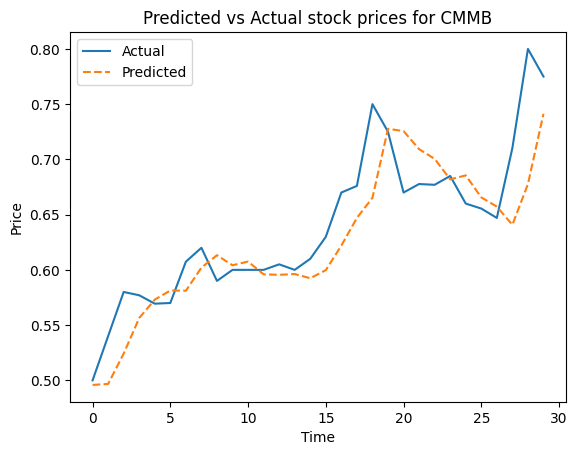

Best config for JRSH.csv: (1, 2, 3)


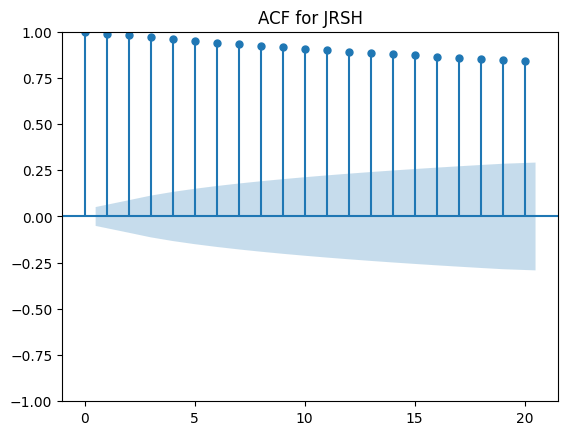

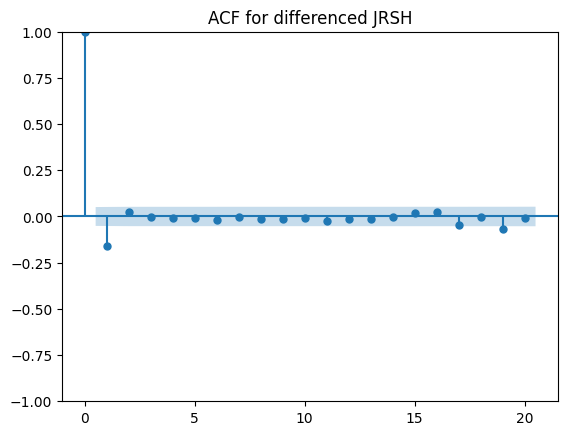

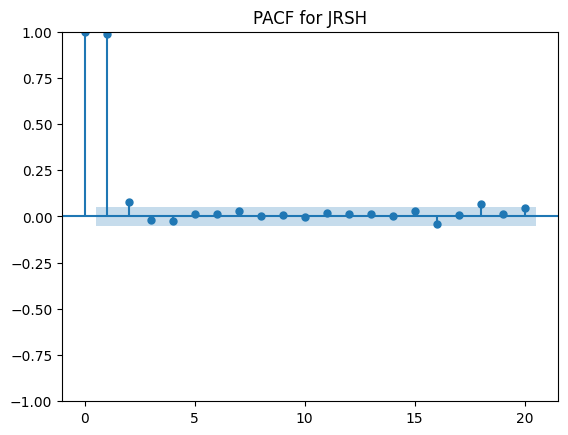

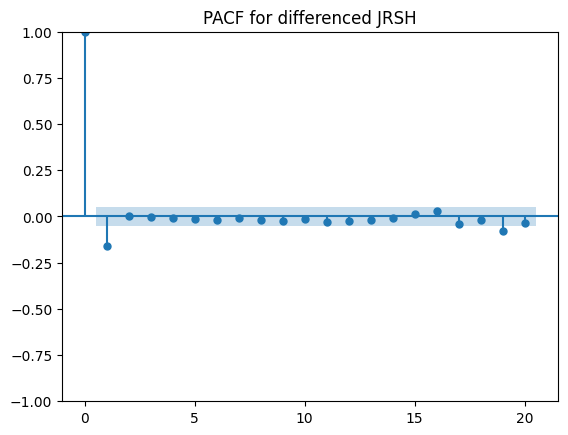

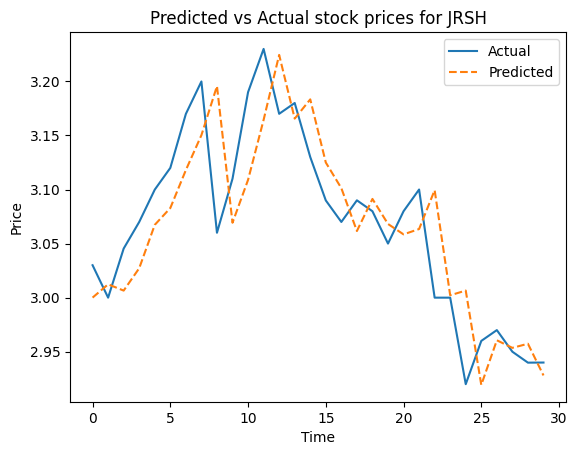

Best config for CLNN.csv: (3, 2, 4)


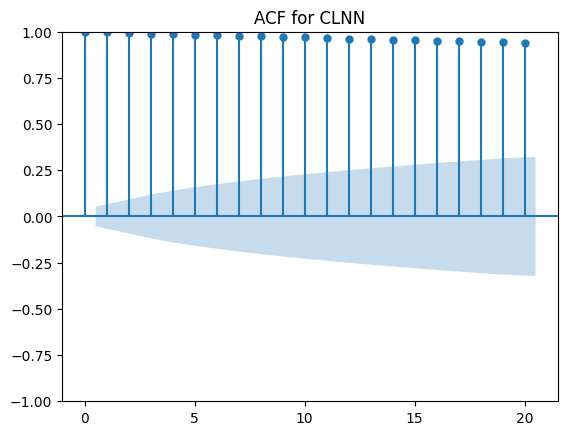

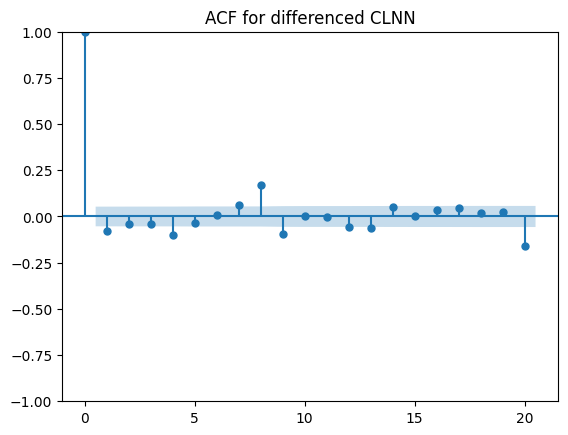

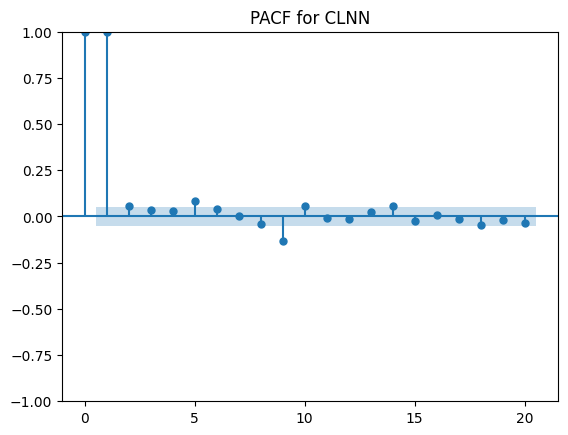

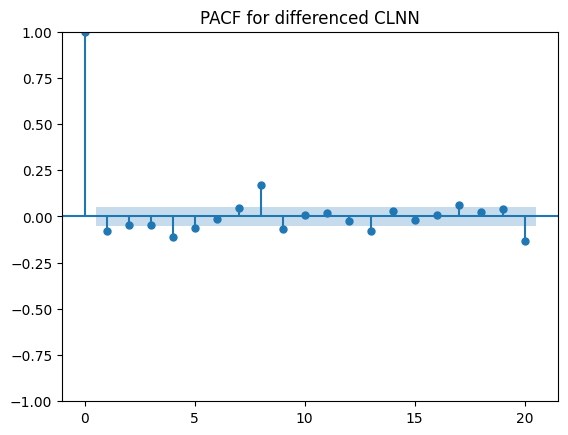

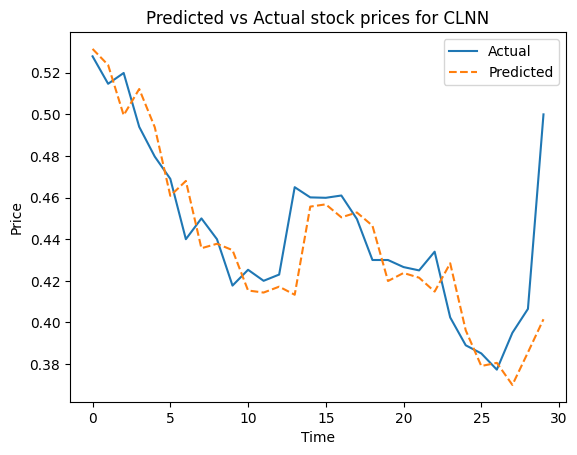

Best config for DMTK.csv: (3, 1, 4)


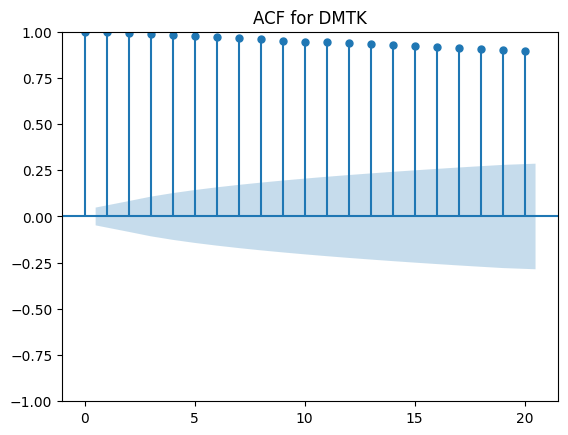

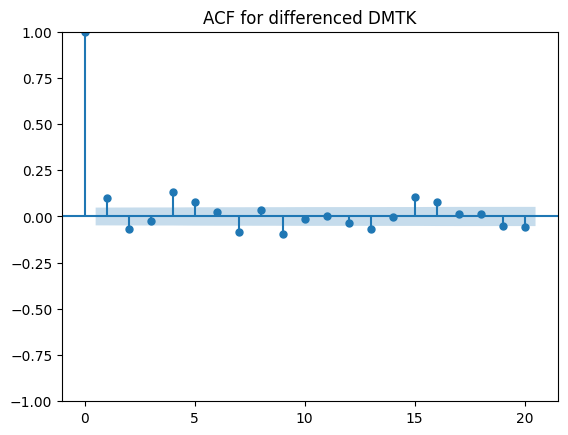

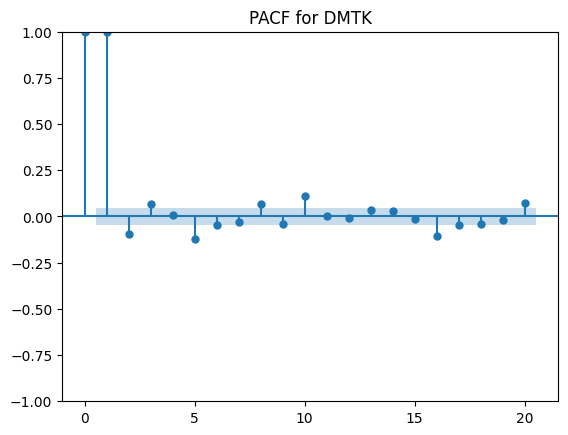

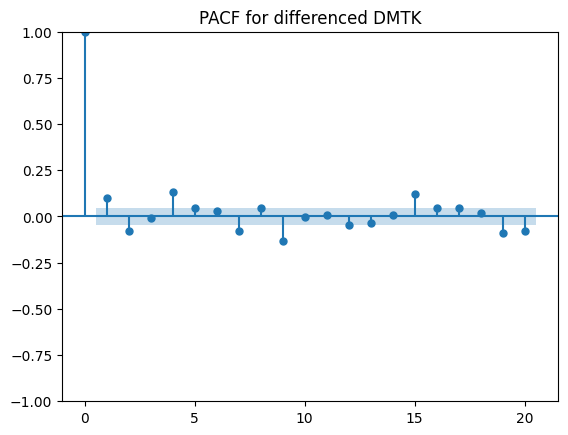

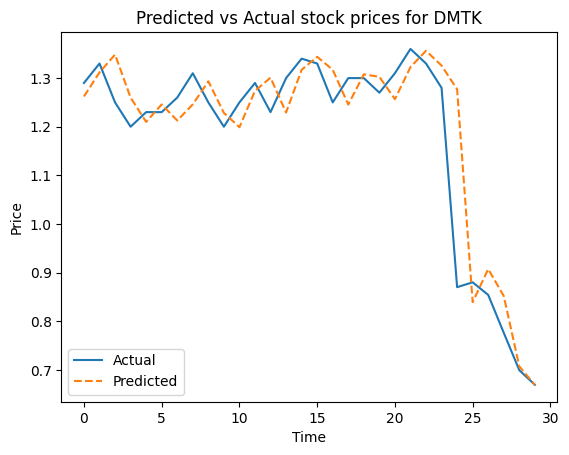

Best config for HUIZ.csv: (4, 1, 2)


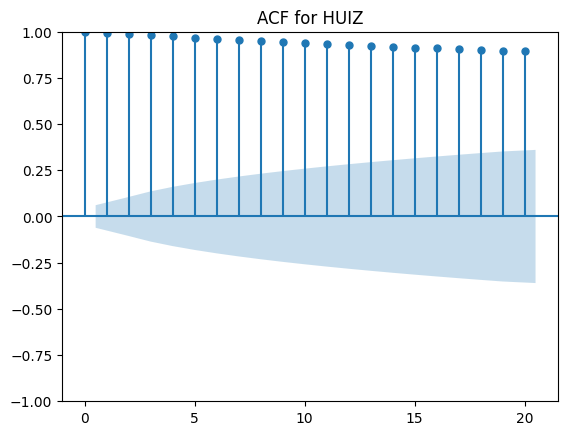

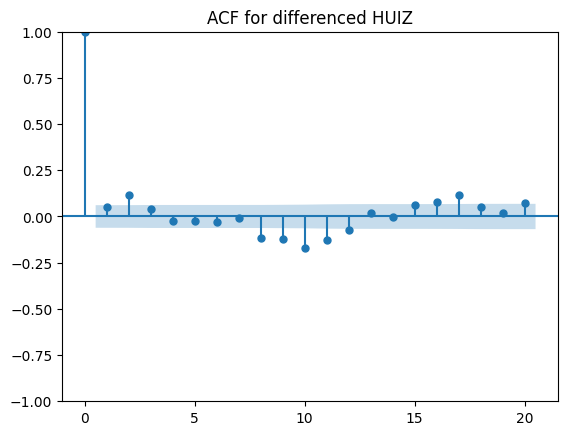

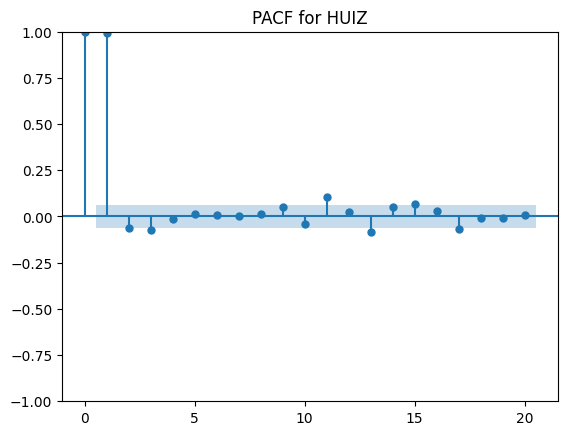

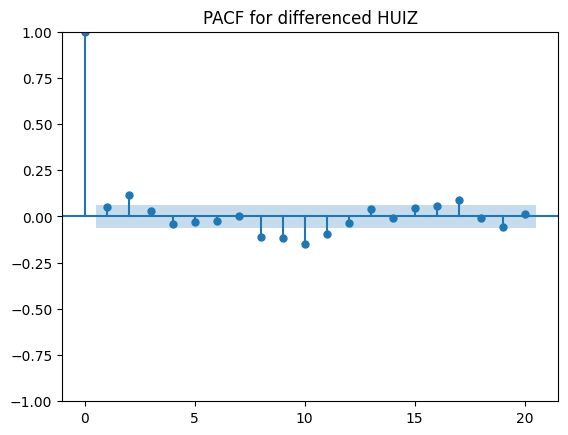

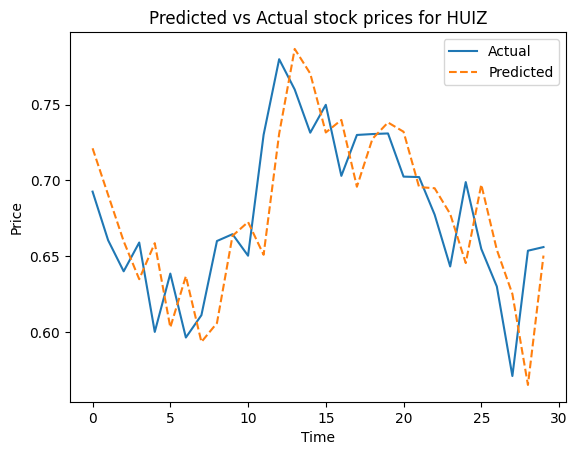

Best config for LSXMA.csv: (4, 0, 3)


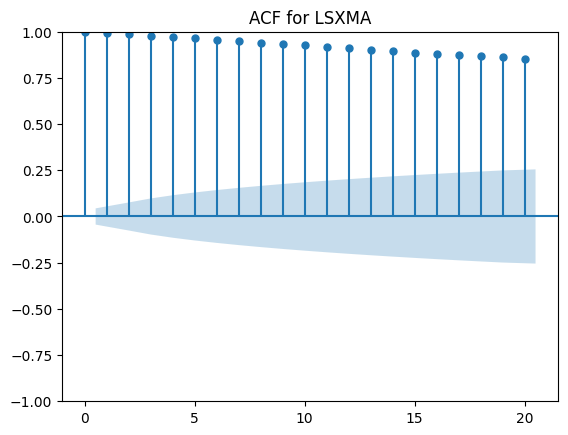

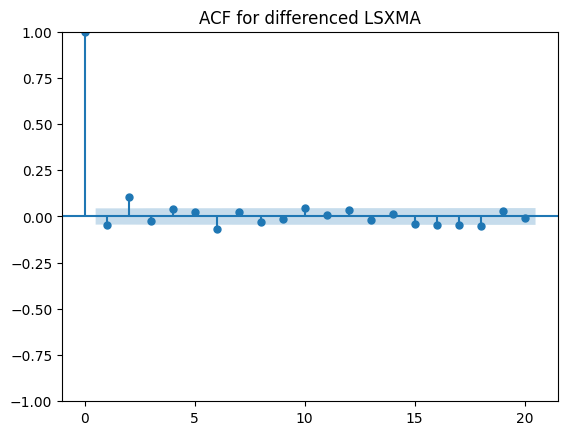

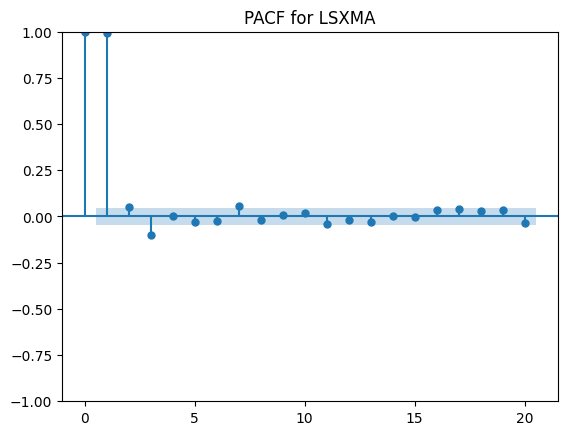

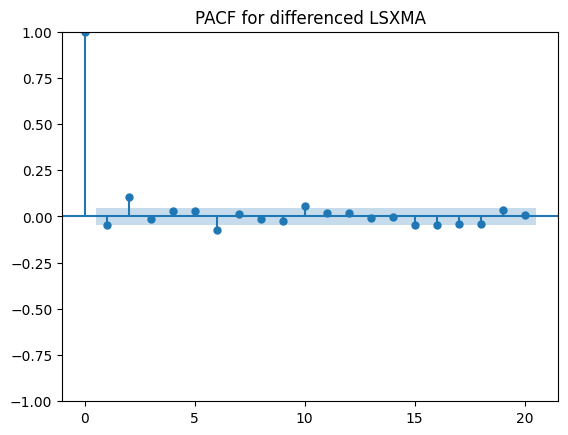

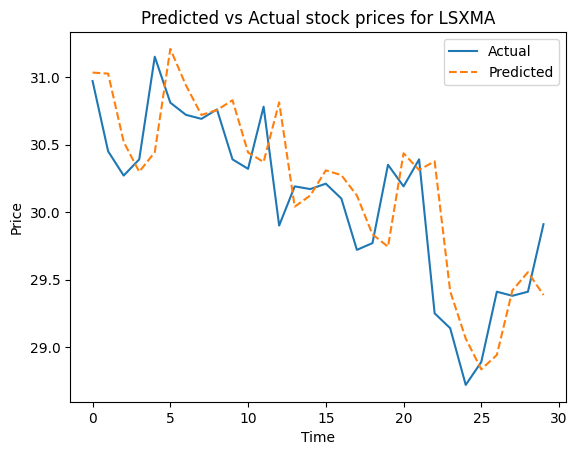

Best config for SND.csv: (2, 2, 2)


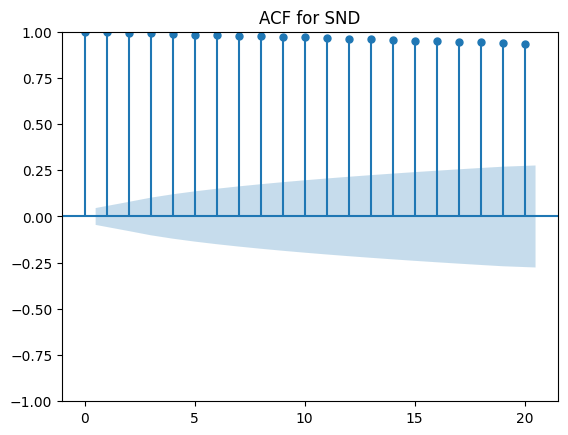

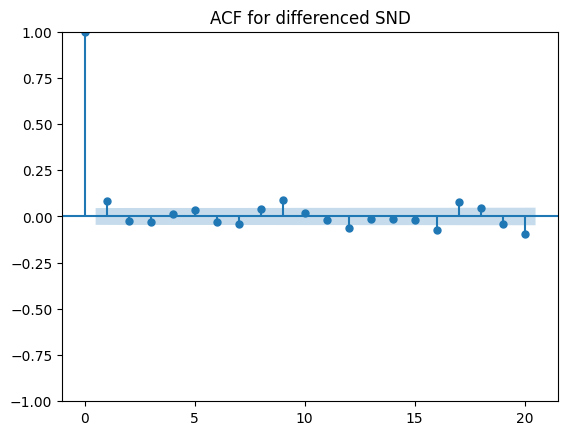

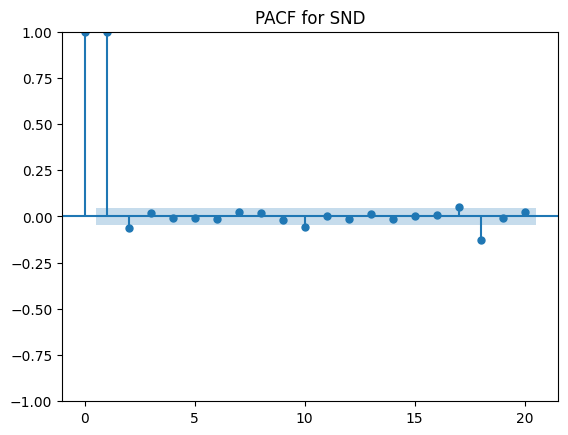

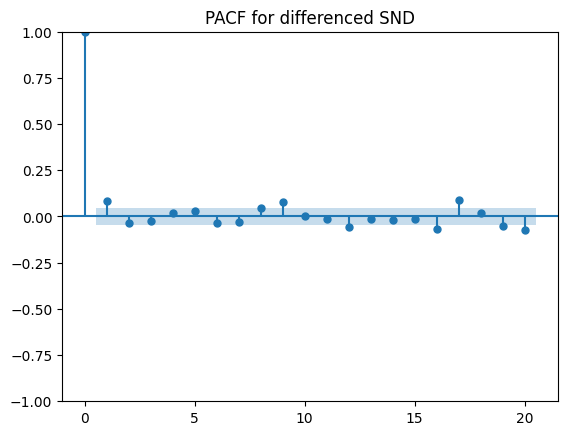

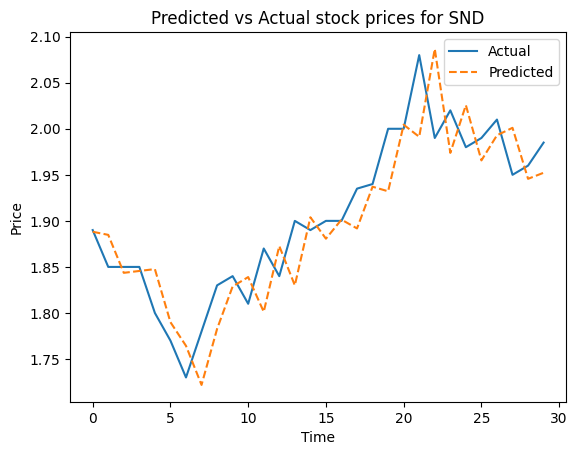

Best config for PLL.csv: (3, 1, 4)


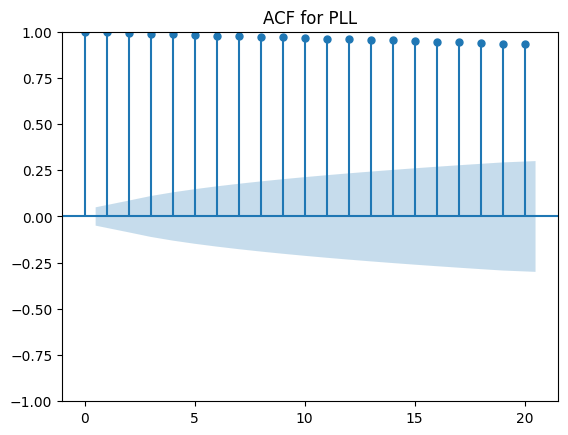

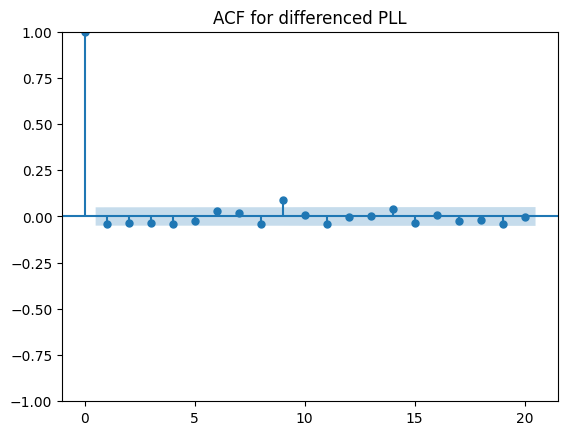

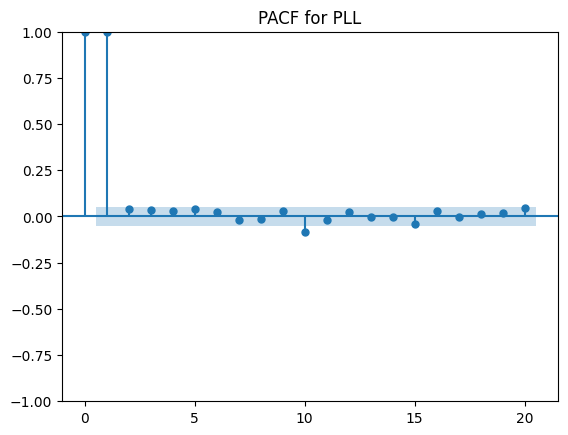

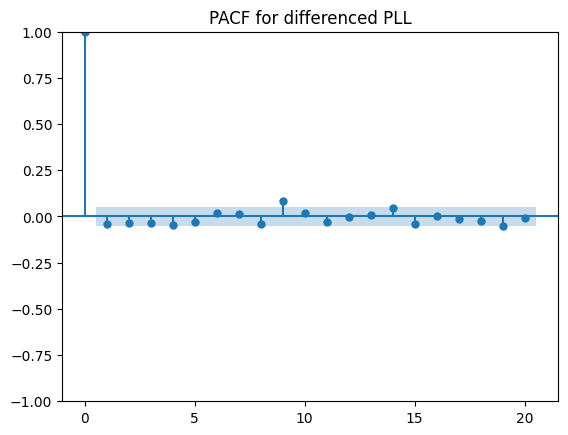

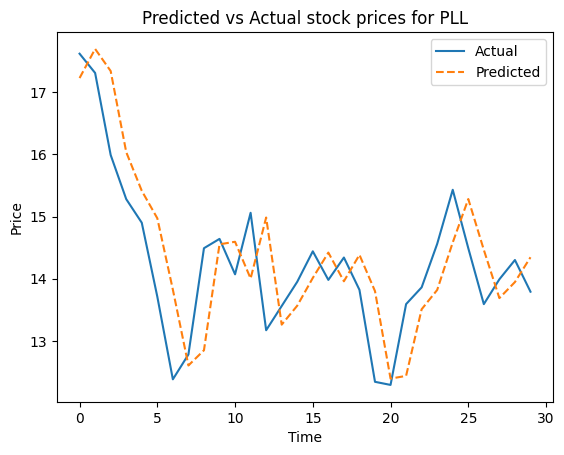

Best config for PRCH.csv: (4, 2, 4)


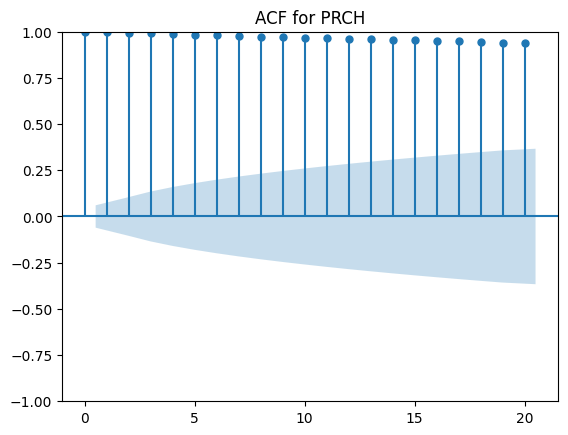

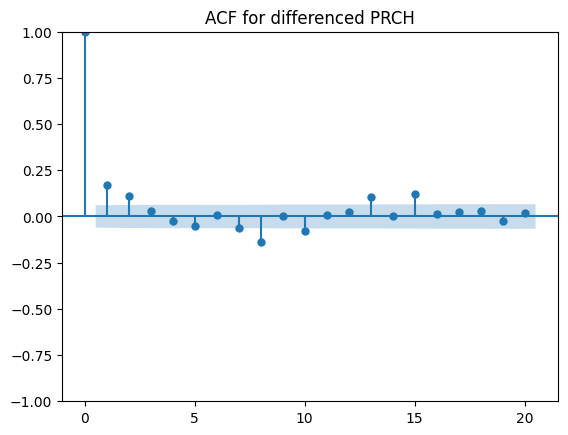

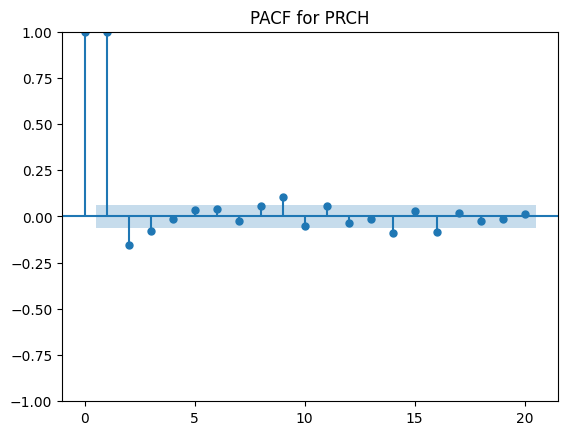

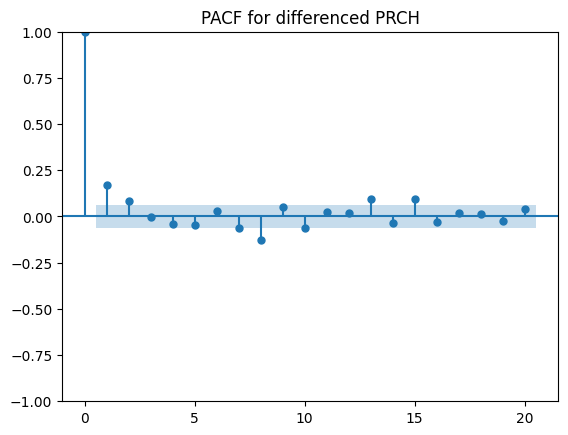

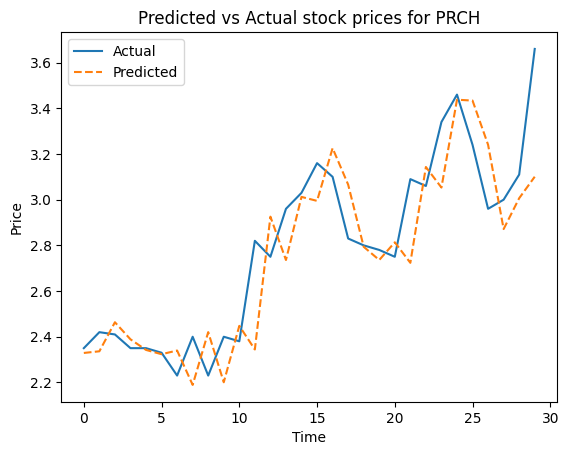

Best config for FHB.csv: (3, 0, 2)


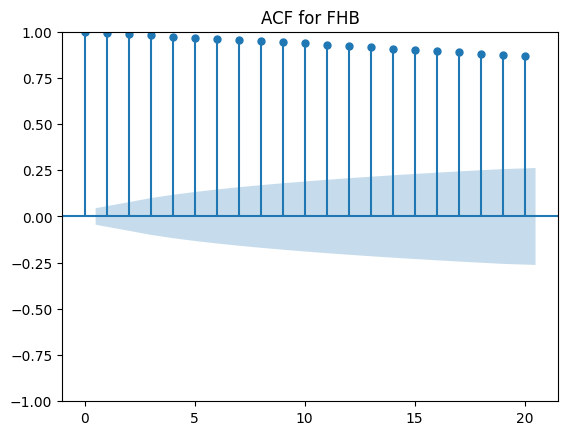

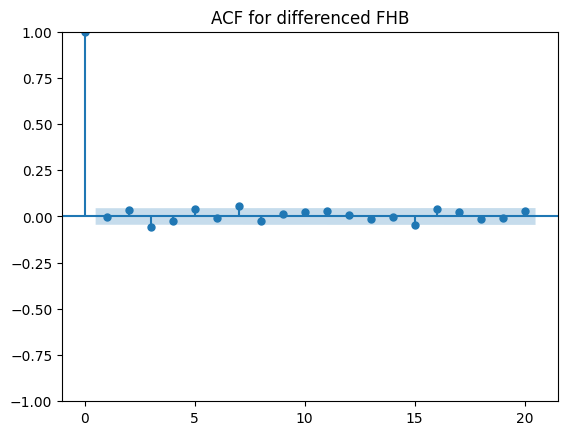

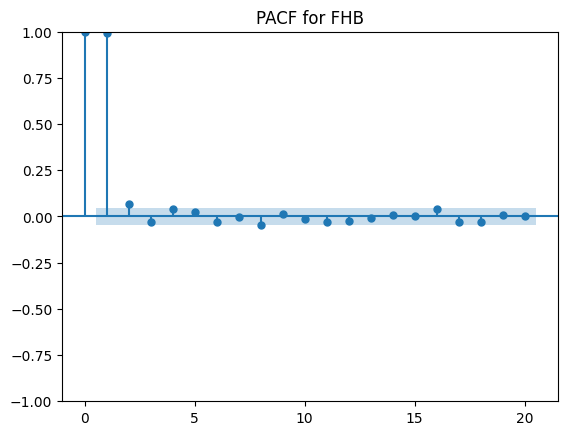

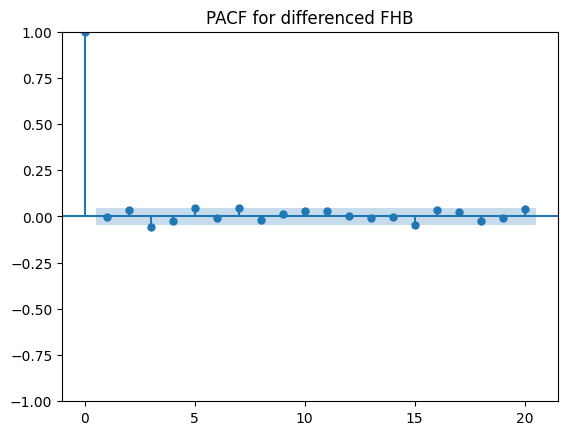

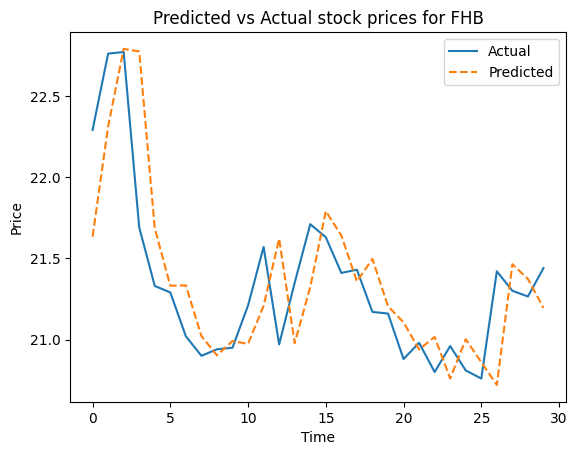

Best config for NVNO.csv: (3, 1, 3)


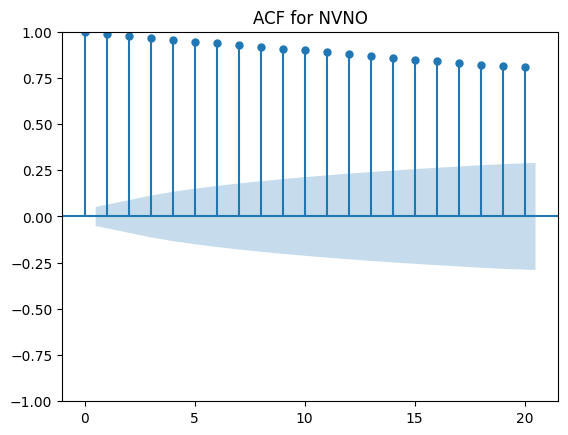

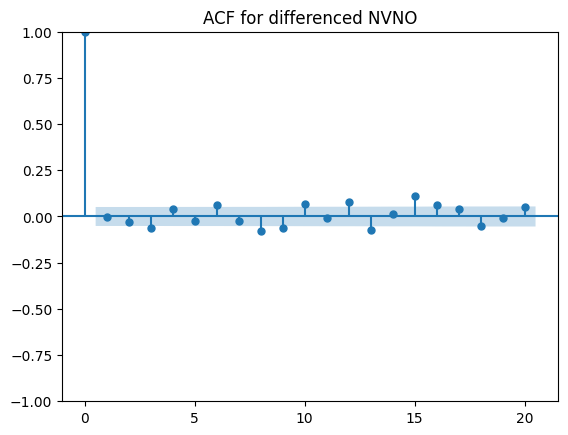

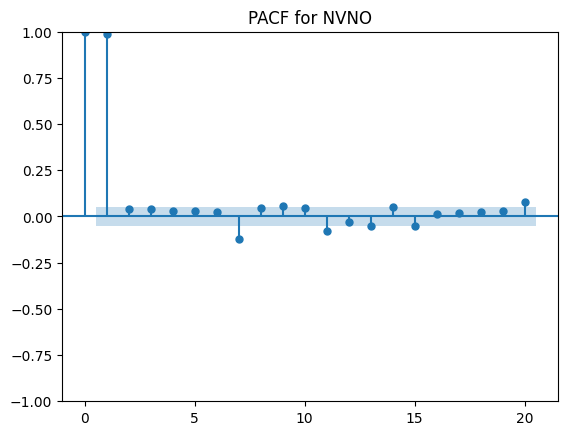

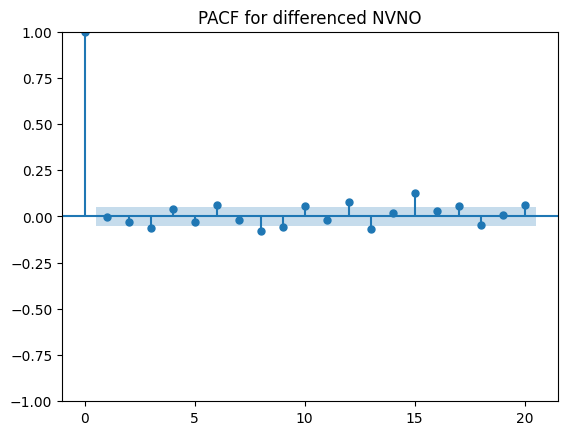

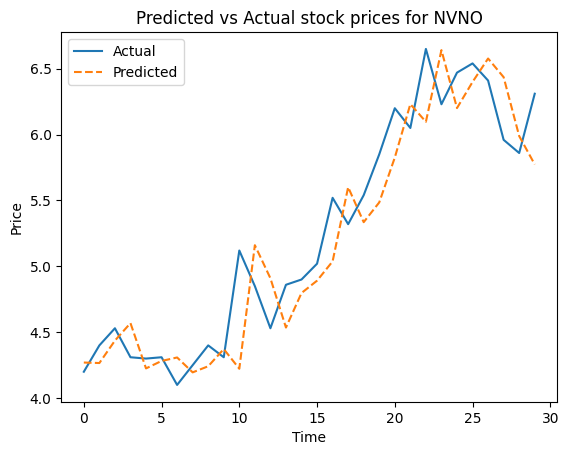

Best config for BATRK.csv: (3, 2, 3)


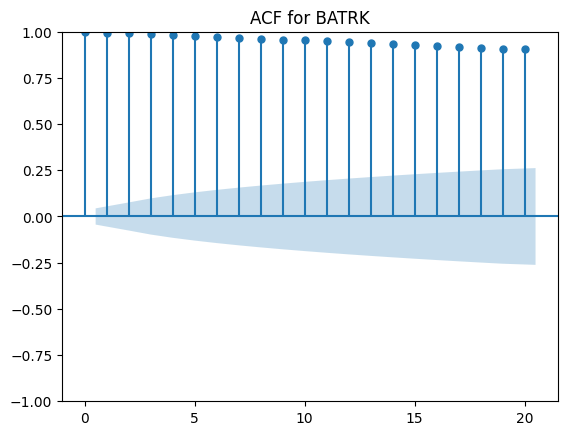

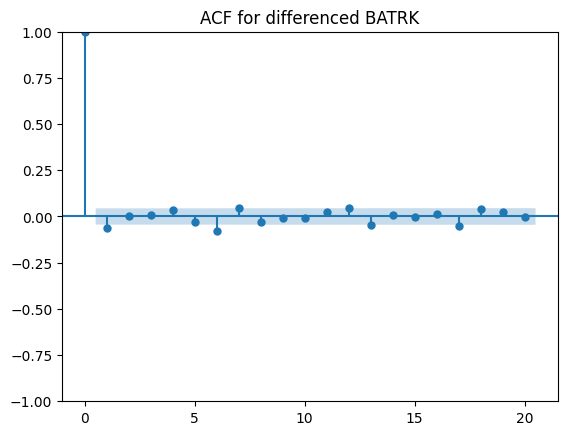

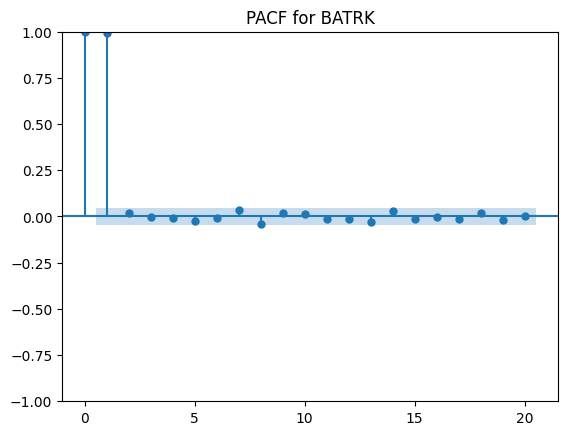

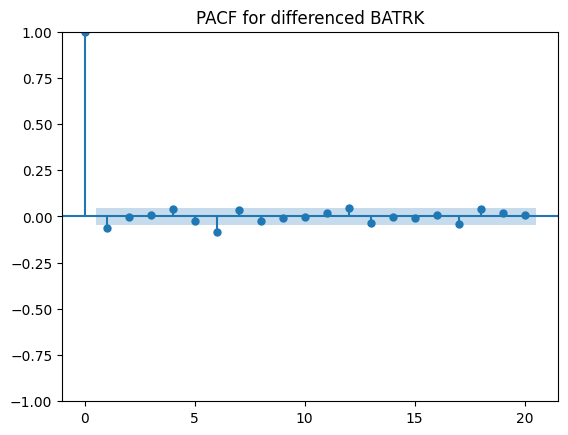

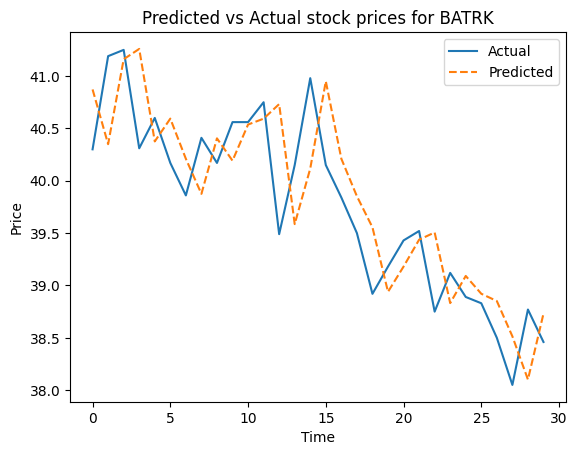

Best config for KOD.csv: (1, 1, 1)


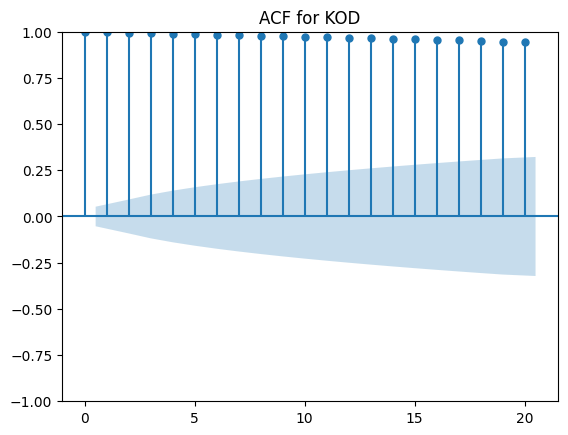

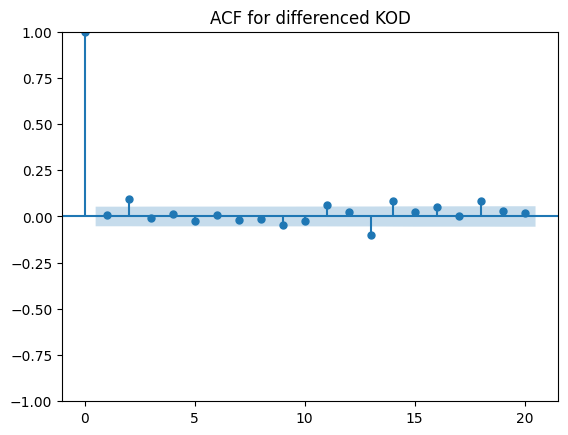

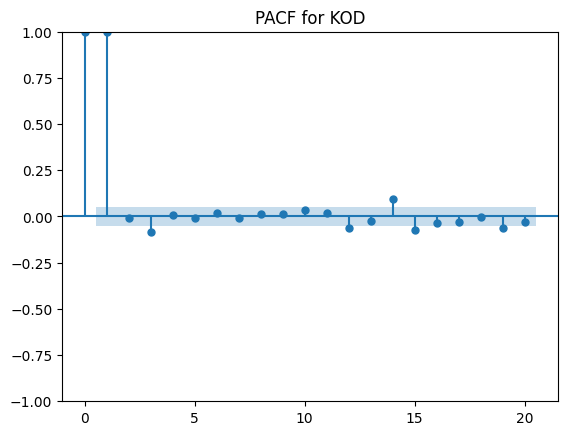

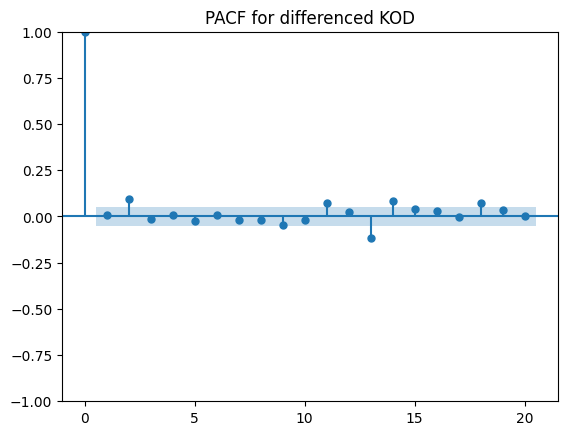

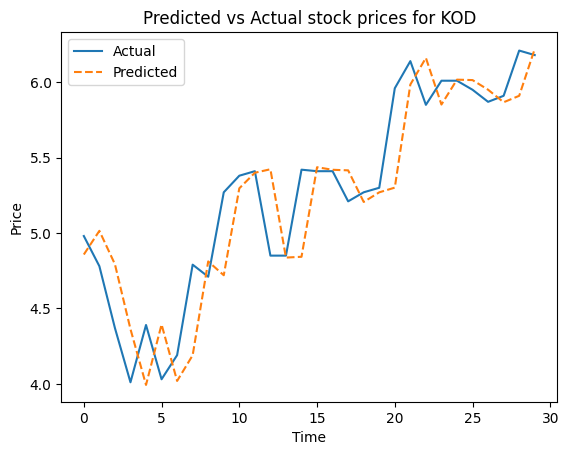

Best config for CPZ.csv: (0, 0, 4)


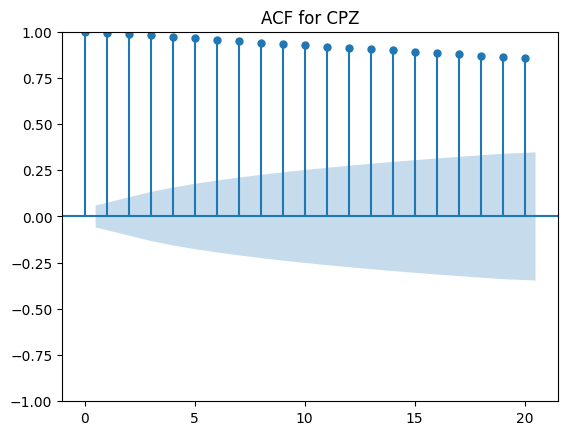

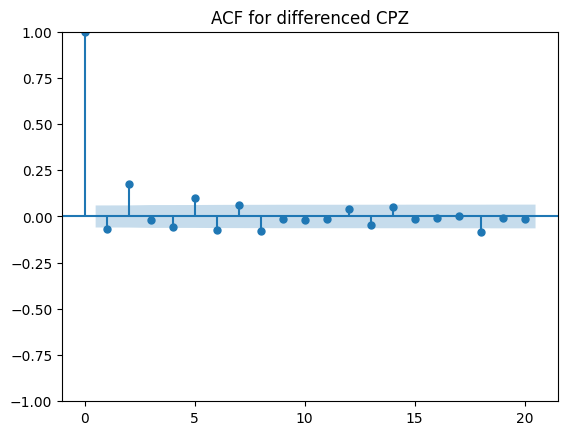

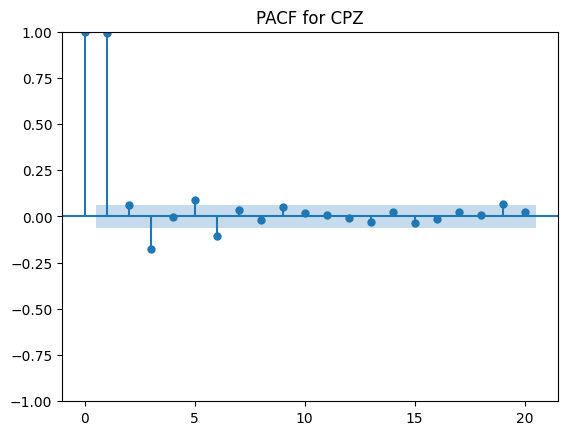

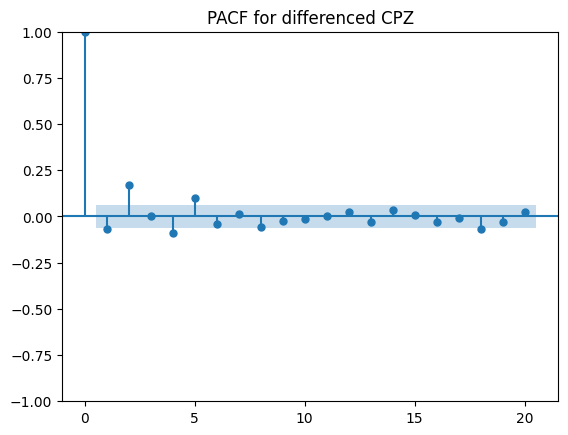

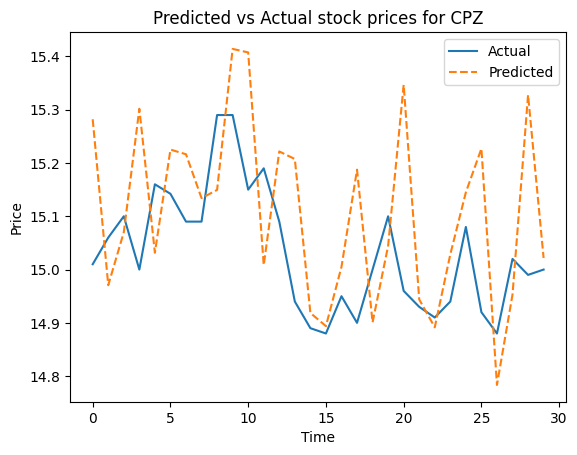

Best config for NDRA.csv: (3, 1, 4)


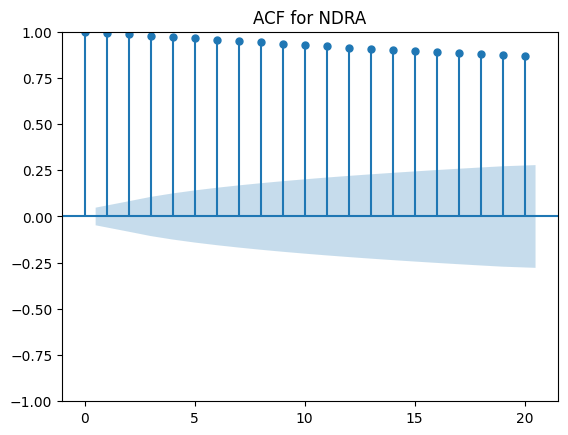

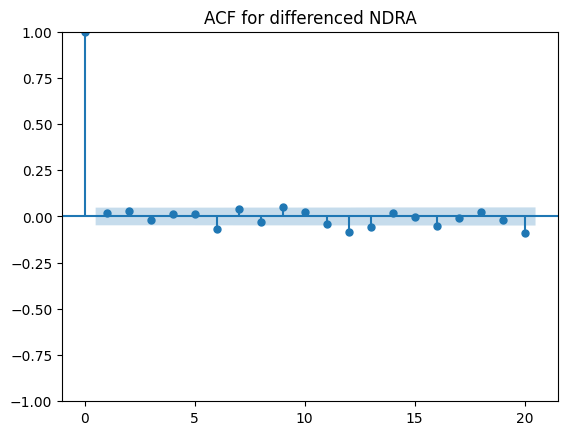

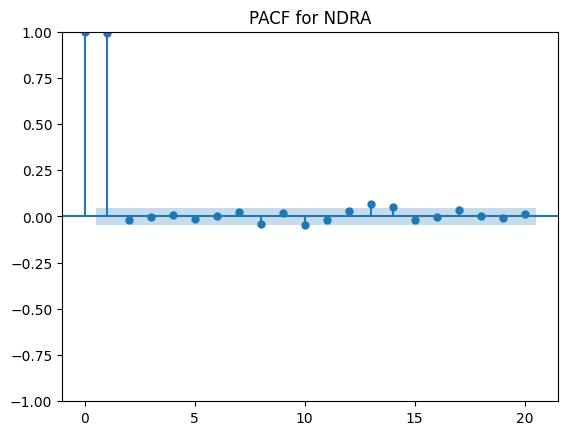

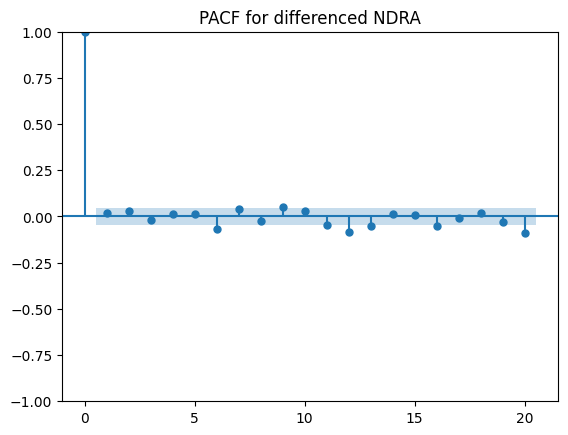

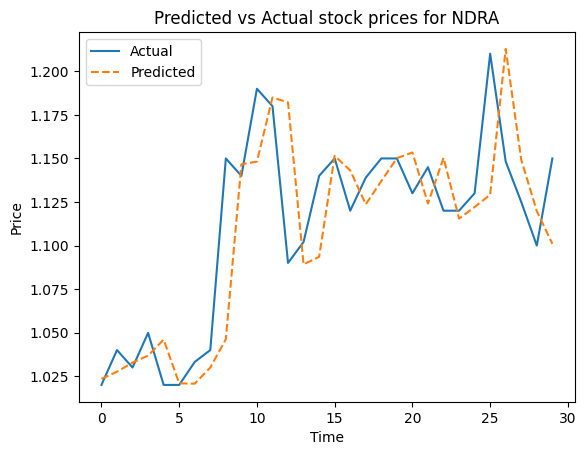

Best config for REKR.csv: (3, 0, 4)


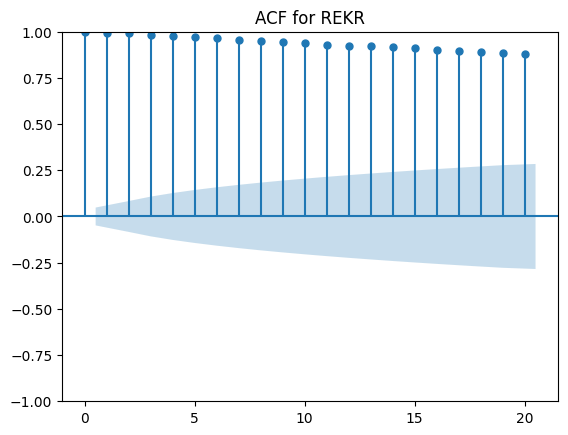

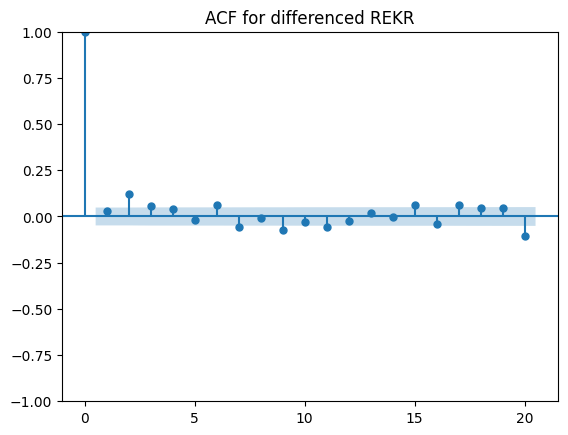

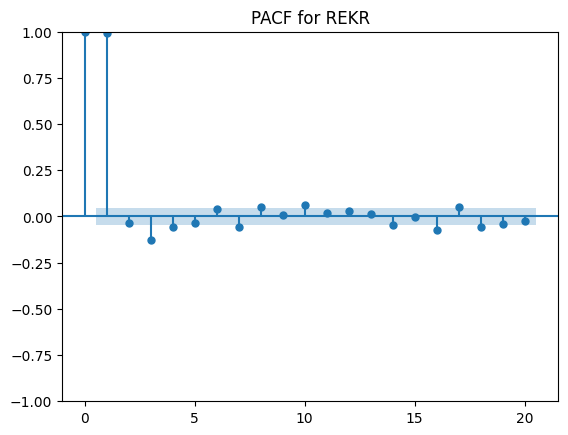

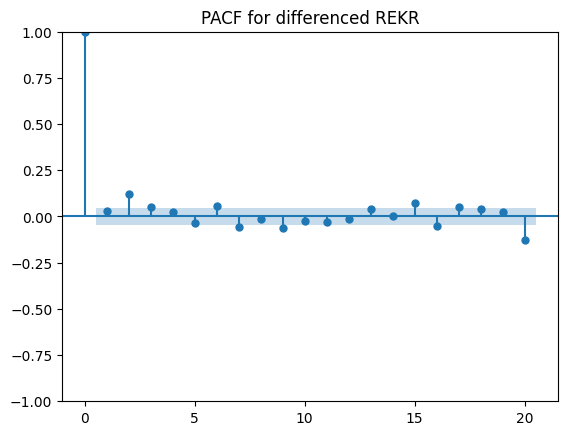

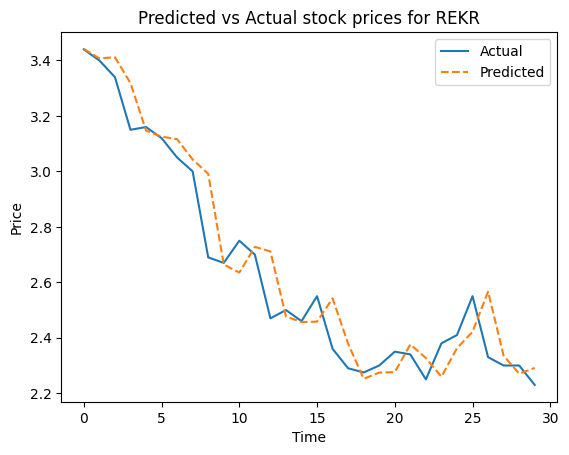

Best config for EH.csv: (3, 2, 4)


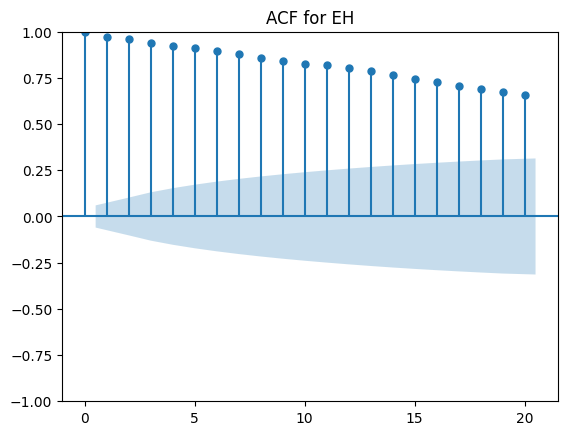

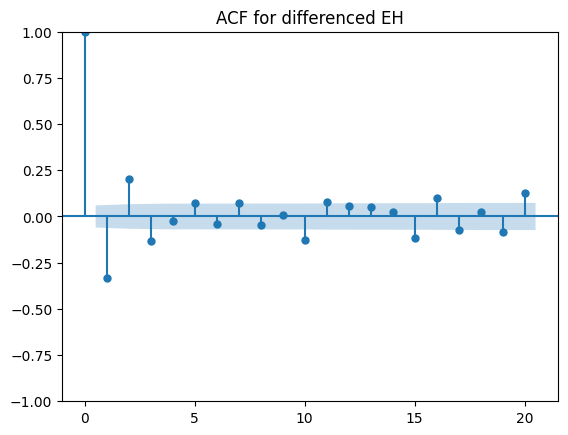

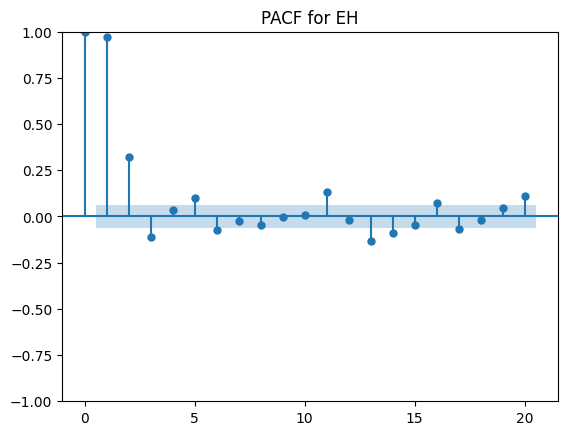

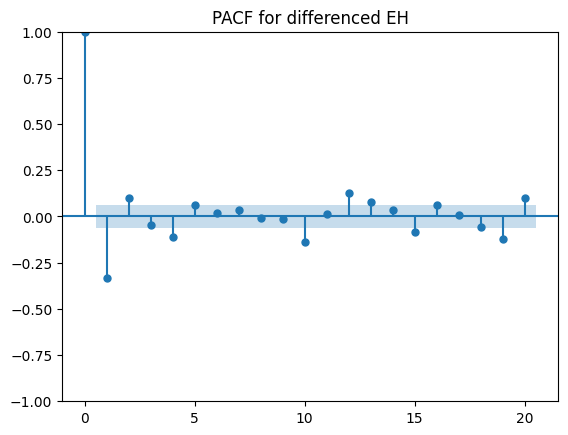

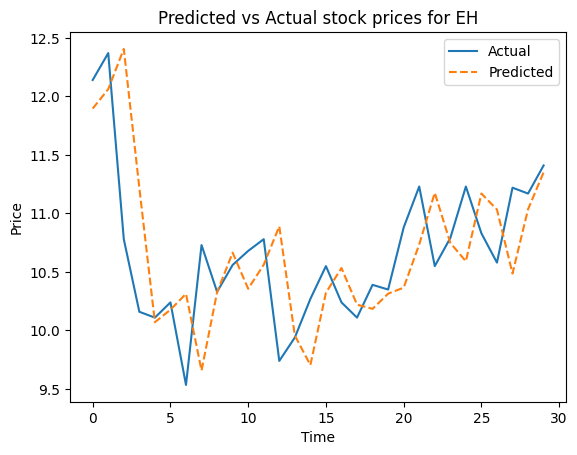

Best config for CBNK.csv: (1, 0, 0)


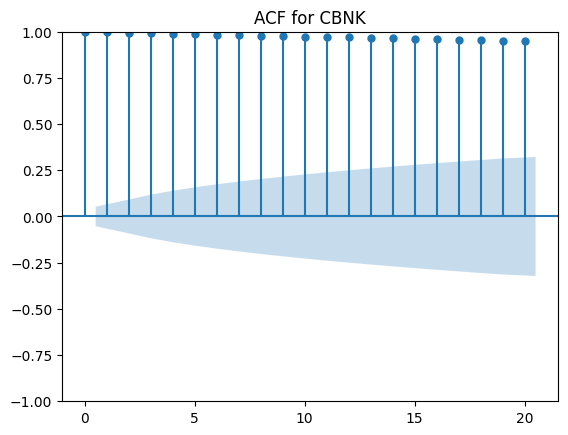

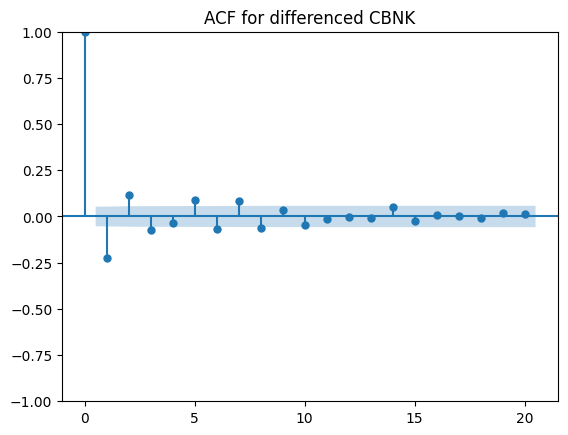

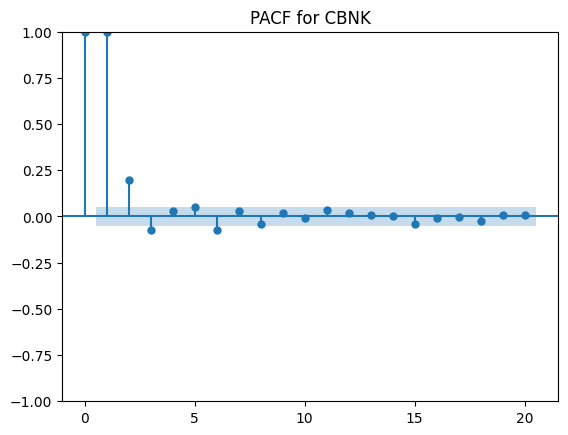

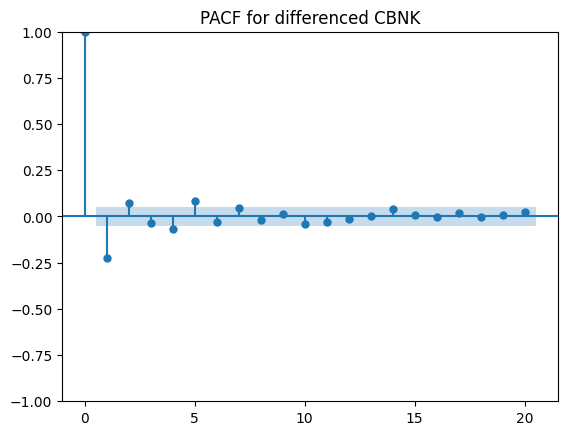

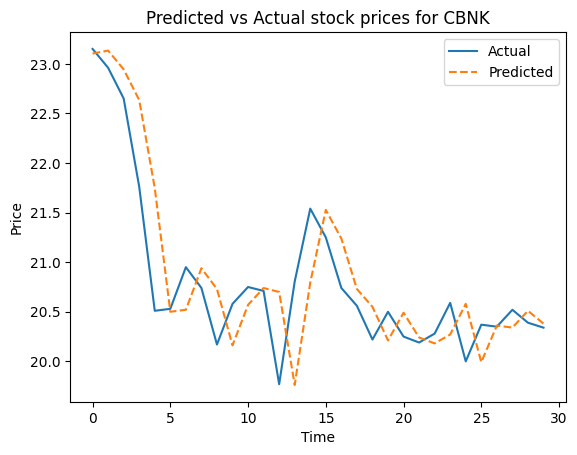

Best config for XP.csv: (3, 2, 4)


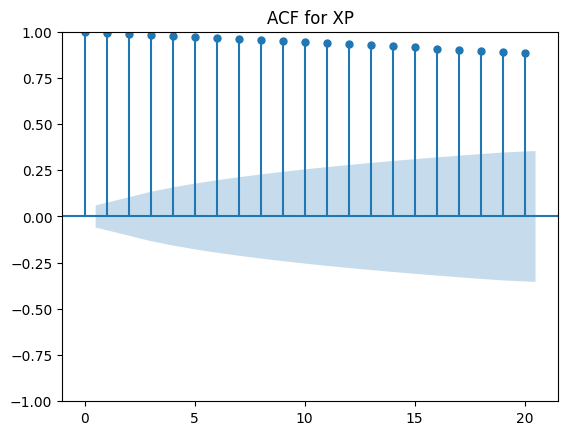

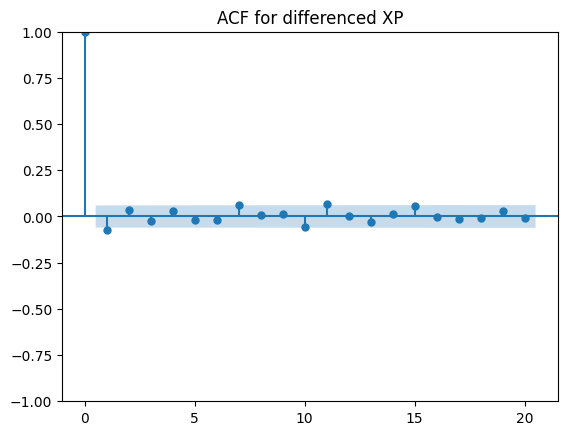

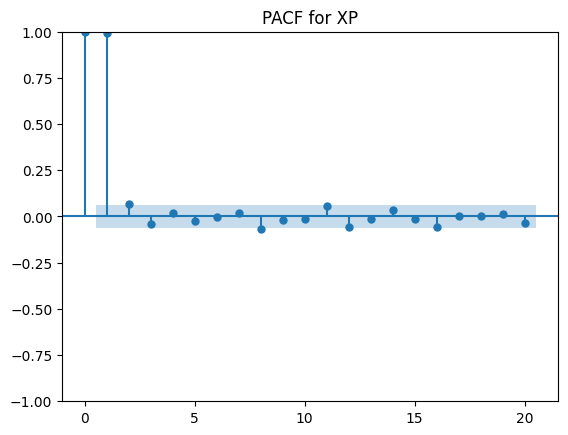

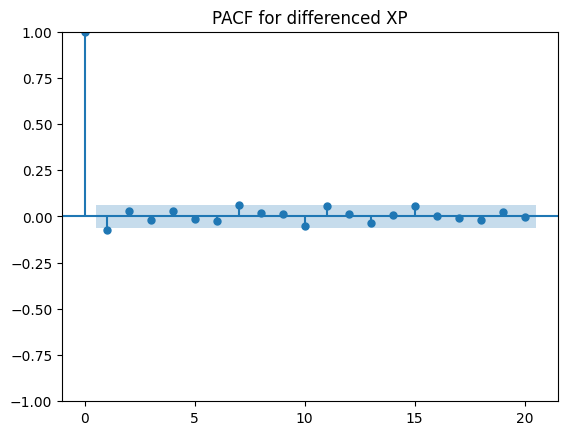

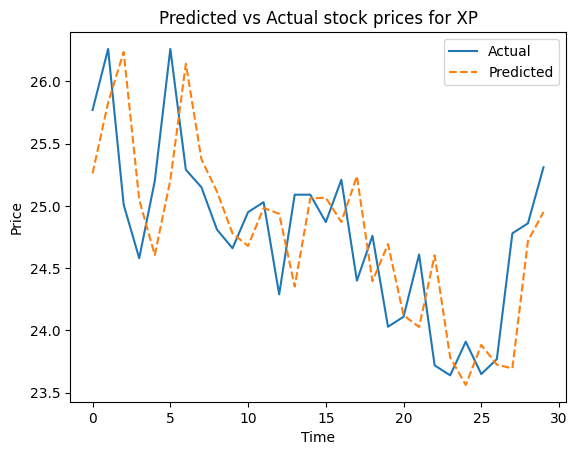

Best config for FNGR.csv: (1, 0, 0)


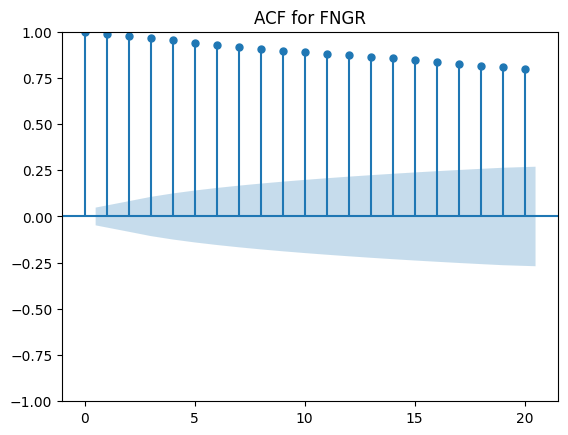

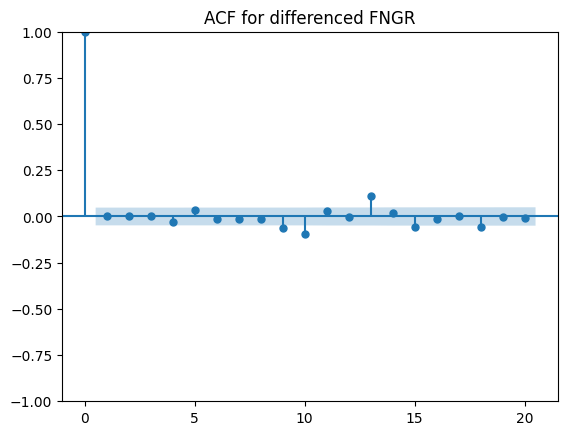

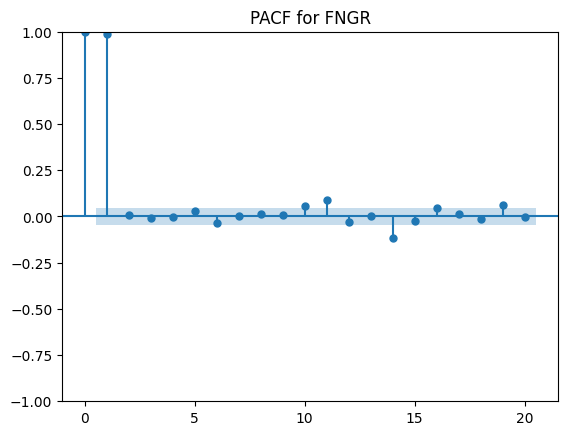

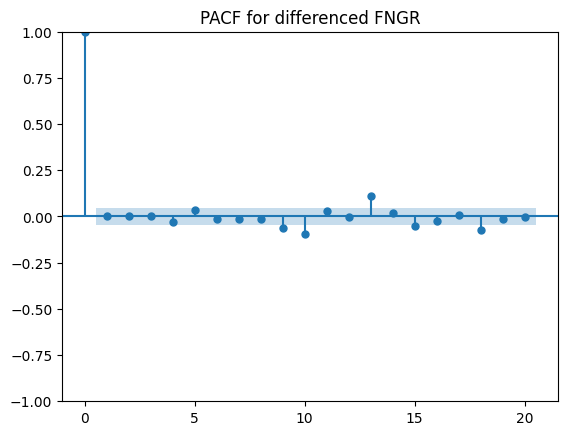

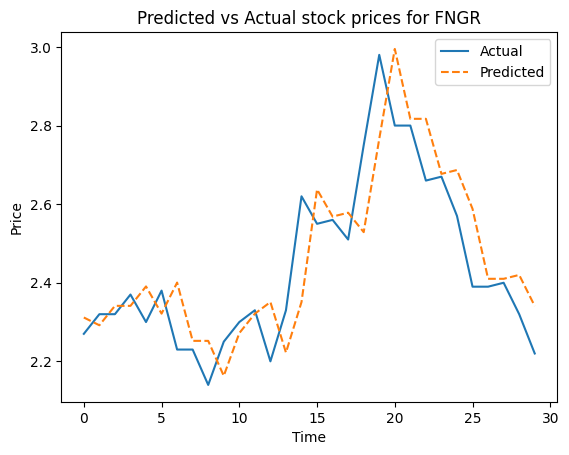

Best config for NAAS.csv: (0, 1, 0)


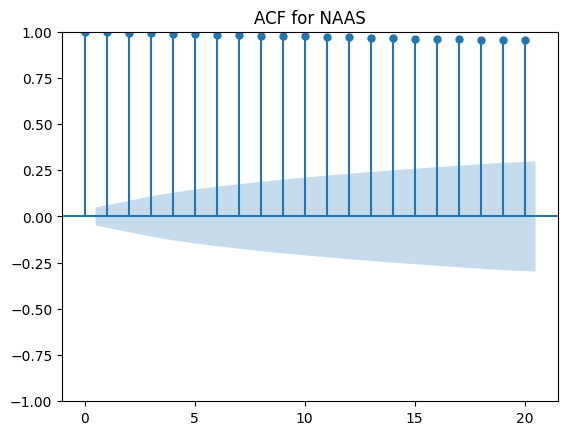

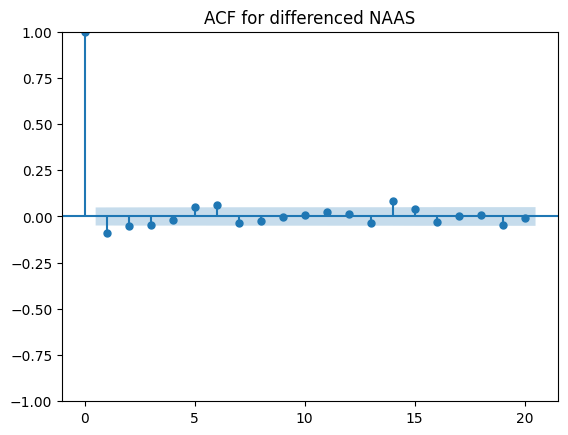

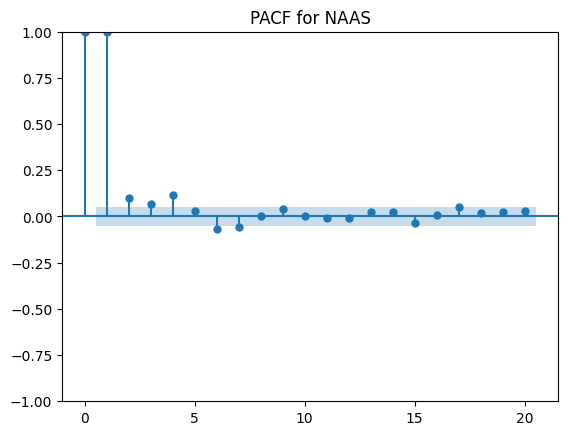

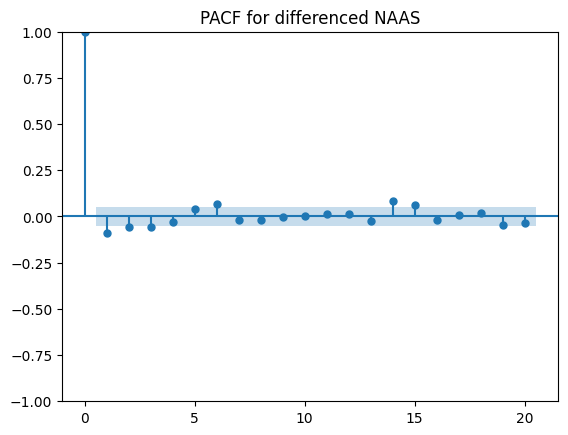

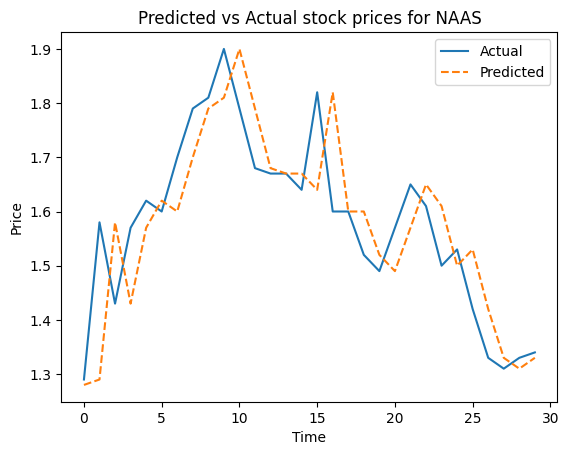

Best config for POLA.csv: (0, 2, 4)


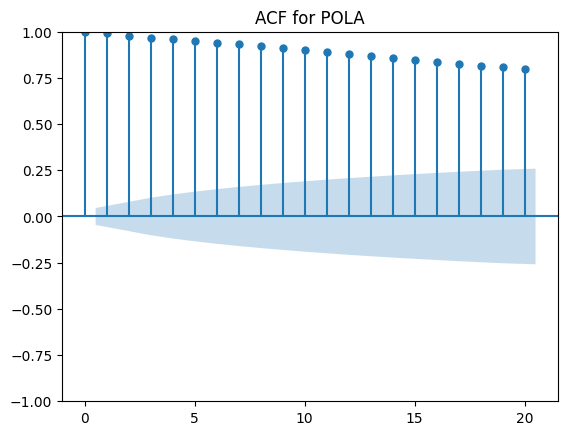

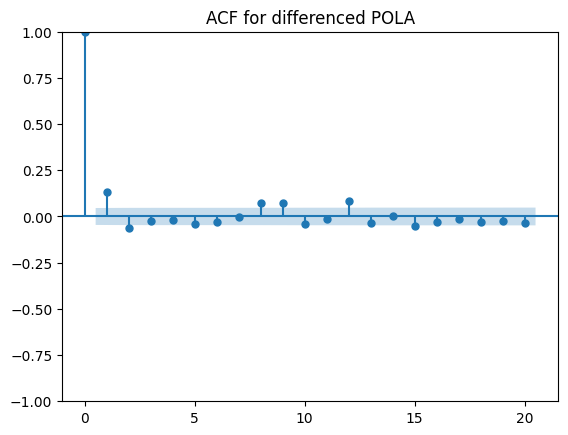

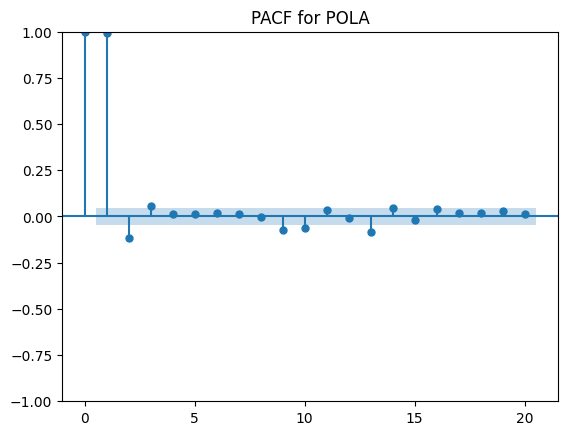

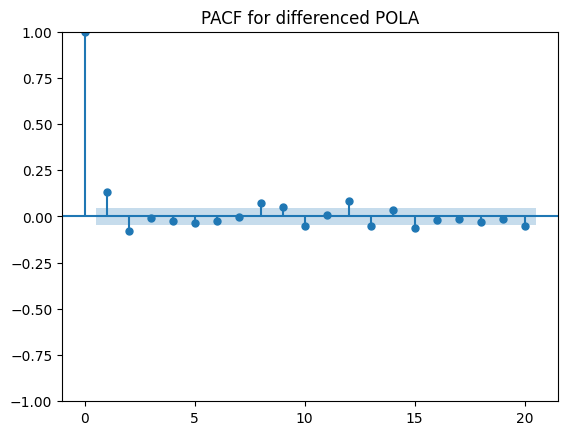

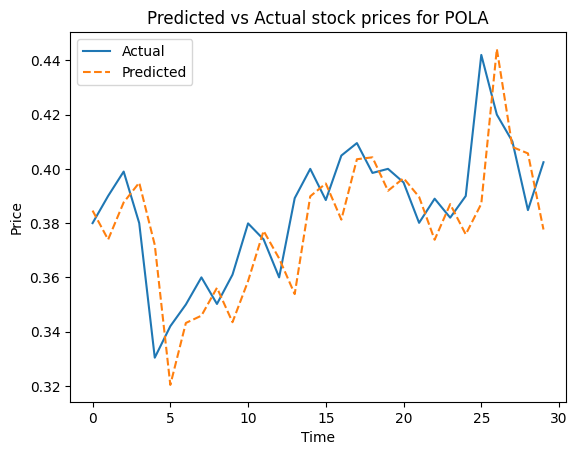

Best config for MVST.csv: (4, 2, 3)


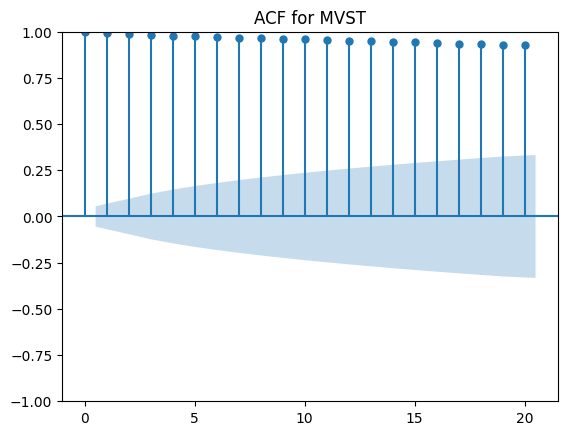

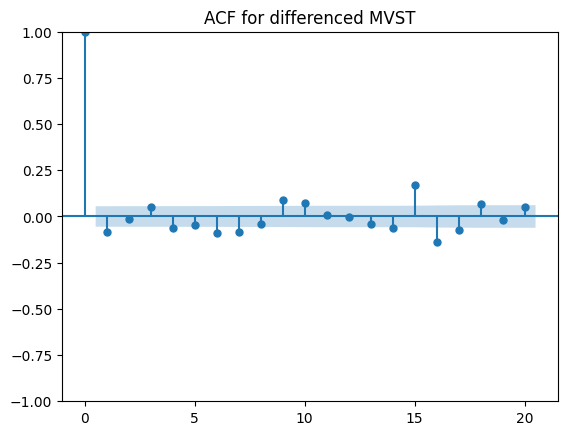

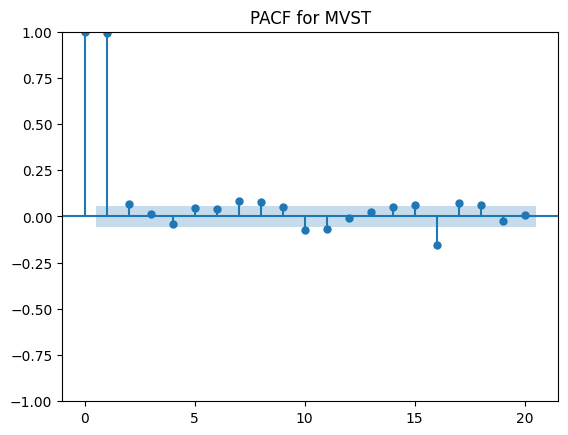

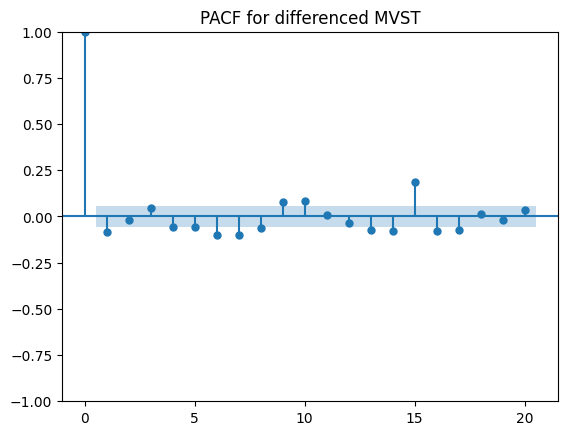

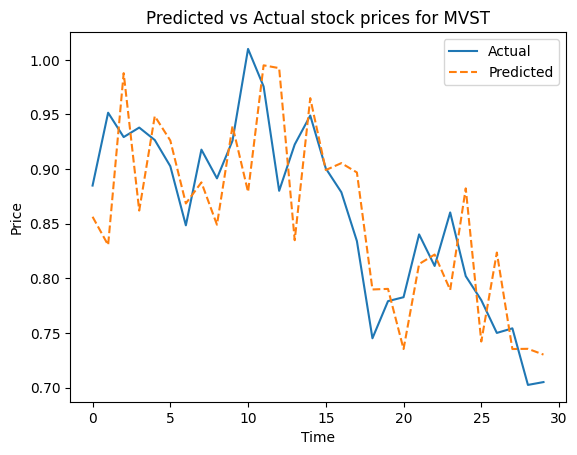

Best config for VRCA.csv: (4, 2, 1)


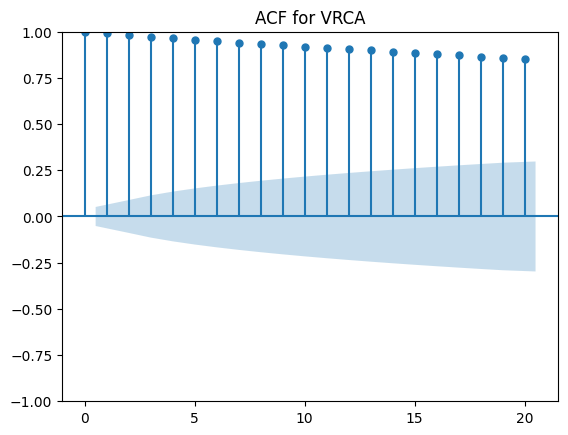

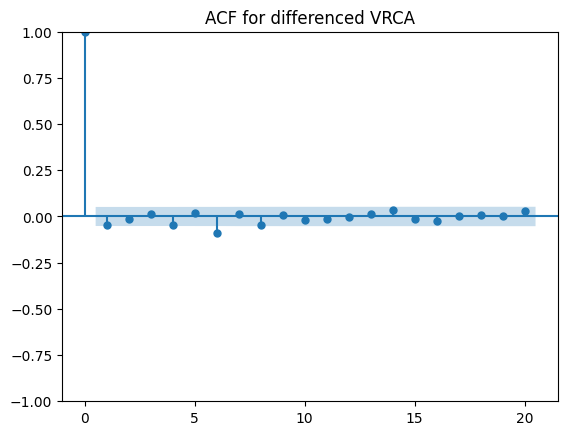

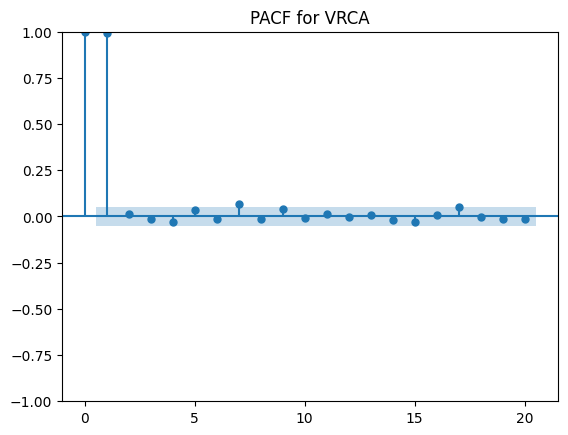

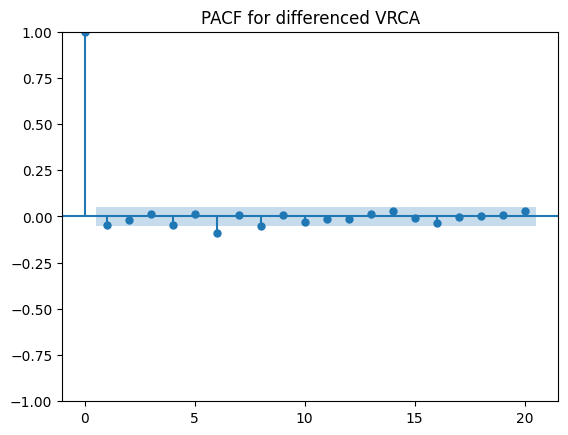

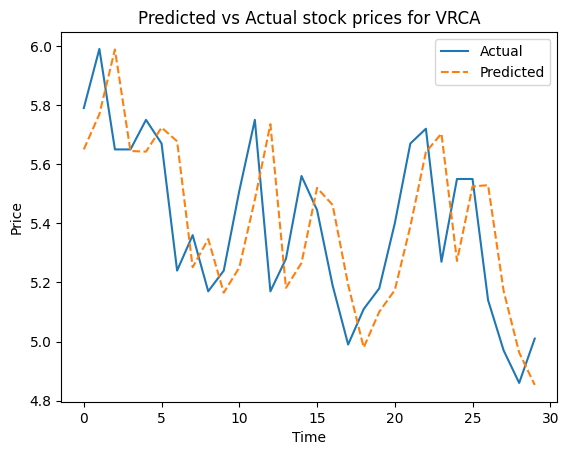

In [29]:
#plot predictions vs actual for every file in /data/predictions
for file in os.listdir('data/predictions/'):
    if file.endswith('.csv') and file.split('_')[1]+'.'+file.split('.')[1] in set(df_sample['file']):
        df = pd.read_csv(f'data/predictions/{file}', sep='|')
        filename = file.split('_')[1] + '.csv'
        df_temp = df_sample.query('file == @filename')
        if df_temp.iloc[0,4]:
            df_prices = pd.read_csv(f'data/cleaned/cleaned_{filename}')
            print(f'Best config for {filename}: {df_sample.loc[df_sample["file"] == filename, "best_cfg"].values[0]}')
            plot_acf(df_prices["close"], lags=20)
            plt.title(f'ACF for {filename.split(".")[0]}')
            plt.show()
            plot_acf(df_prices["close"].diff().dropna(), lags=20)
            plt.title(f'ACF for differenced {filename.split(".")[0]}')
            plt.show()
            plot_pacf(df_prices["close"], lags=20)
            plt.title(f'PACF for {filename.split(".")[0]}')
            plt.show()
            plot_pacf(df_prices["close"].diff().dropna(), lags=20)
            plt.title(f'PACF for differenced {filename.split(".")[0]}')
            plt.show()
            plt.plot(df["actual"], '-', label='Actual')
            plt.plot(df["pred"], '--', label='Predicted')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title(f'Predicted vs Actual stock prices for {filename.split(".")[0]}')
            plt.show()